In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

In [3]:
df_bank = pd.read_csv("Customer-Churn-Records.csv")
df_bank.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

# Data Exploration

In [4]:
df_bank.shape

(10000, 18)

In [5]:
df_bank.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df_bank.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
df_bank["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df_bank["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df_bank["Card Type"].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [11]:
df_bank["Exited"].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [12]:
df_bank["Complain"].value_counts()

0    7956
1    2044
Name: Complain, dtype: int64

In [13]:
df_bank["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [14]:
df_bank["Satisfaction Score"].value_counts()

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: int64

In [145]:
df_bank.corr().style.background_gradient(cmap="summer")

In [144]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.heatmap(df_bank.corr(), annot=True, cmap='Accent')

<Axes: xlabel='Exited', ylabel='Balance'>

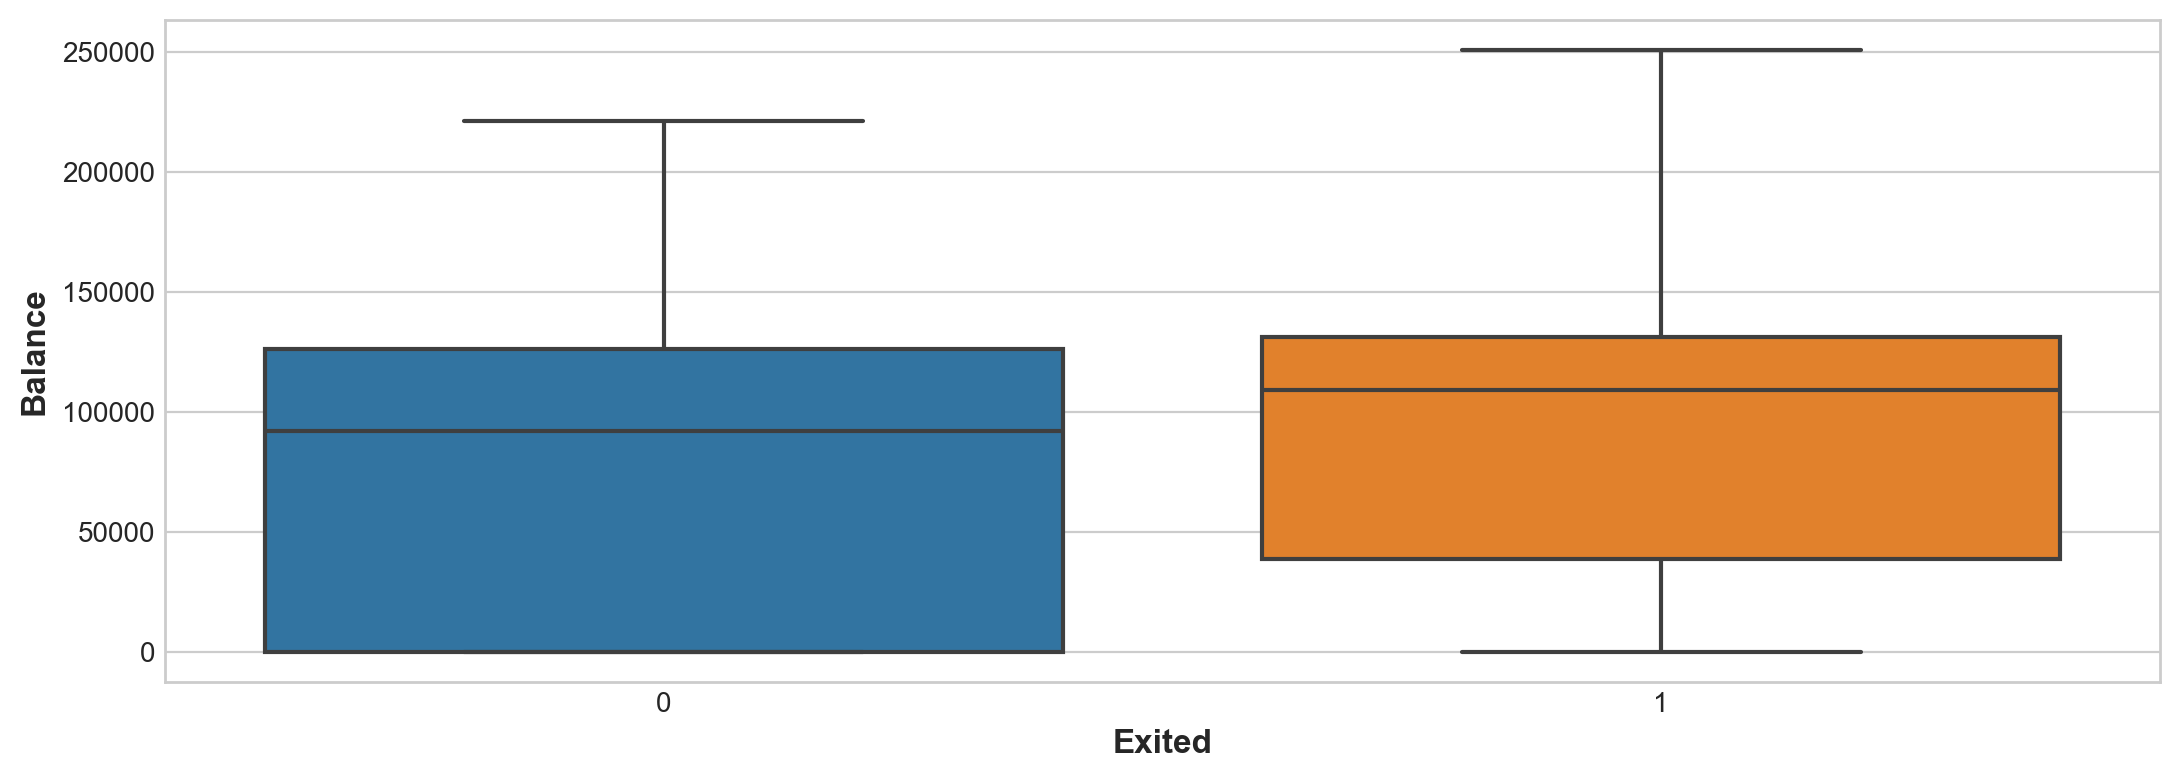

In [17]:
sns.boxplot(df_bank, x="Exited", y="Balance")

<Axes: xlabel='Complain', ylabel='Balance'>

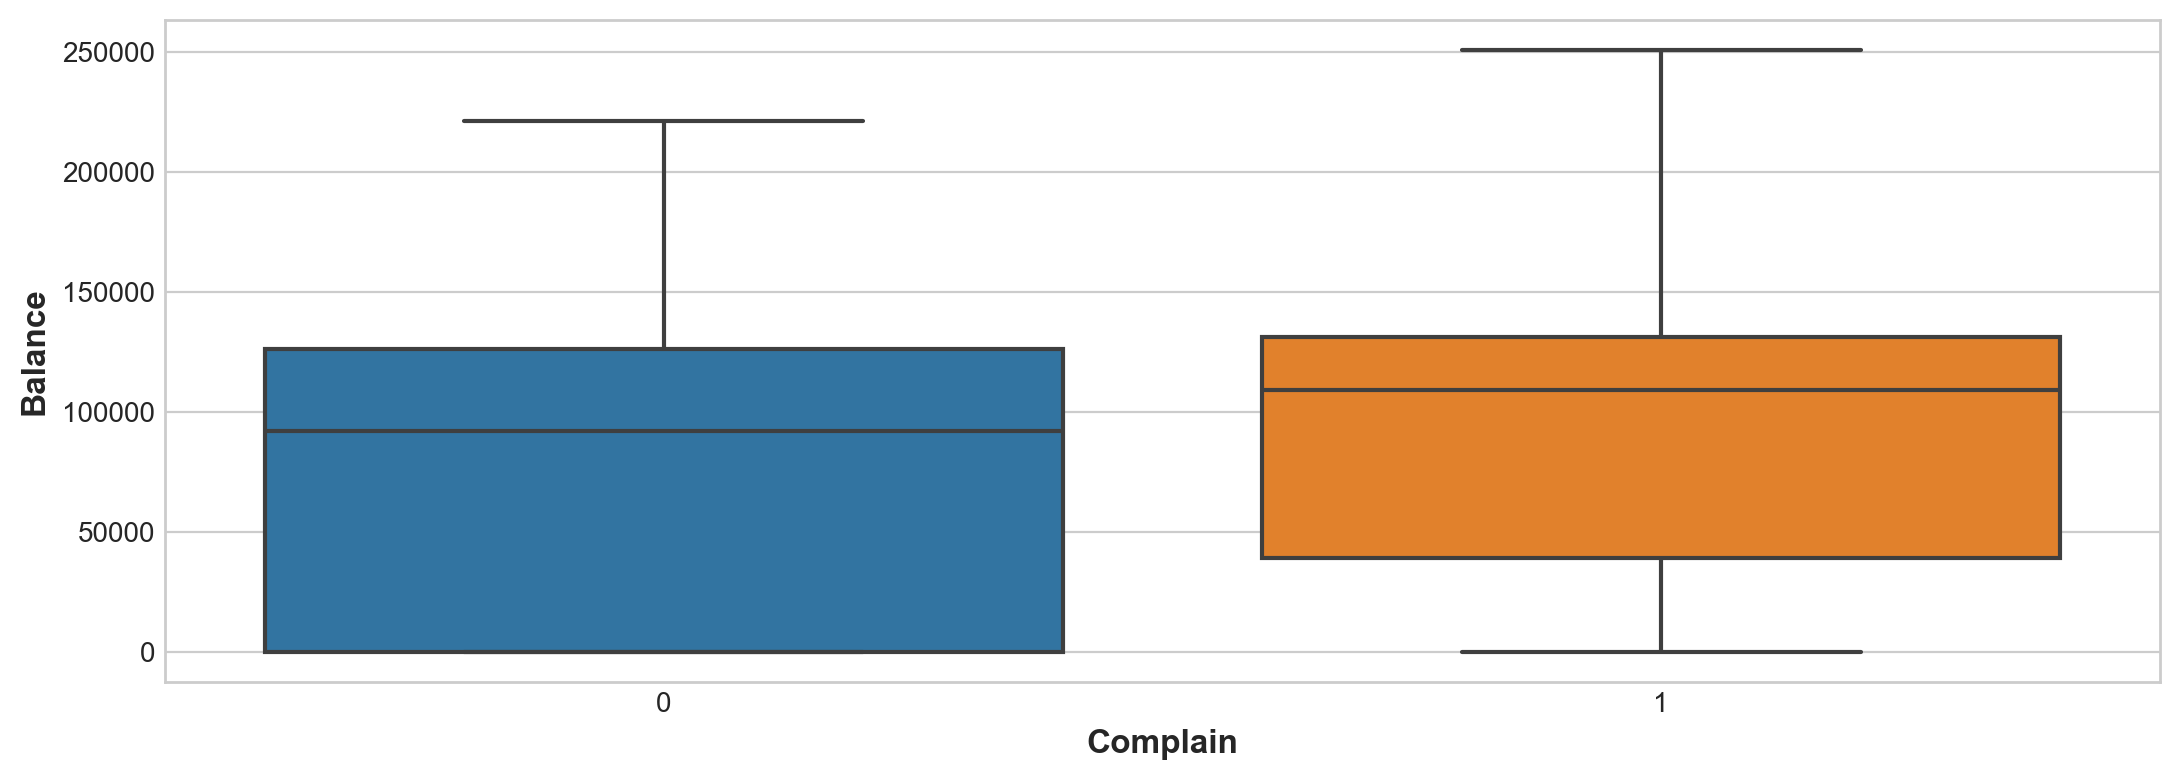

In [18]:
sns.boxplot(df_bank, x="Complain", y="Balance")

<Axes: xlabel='Exited', ylabel='Age'>

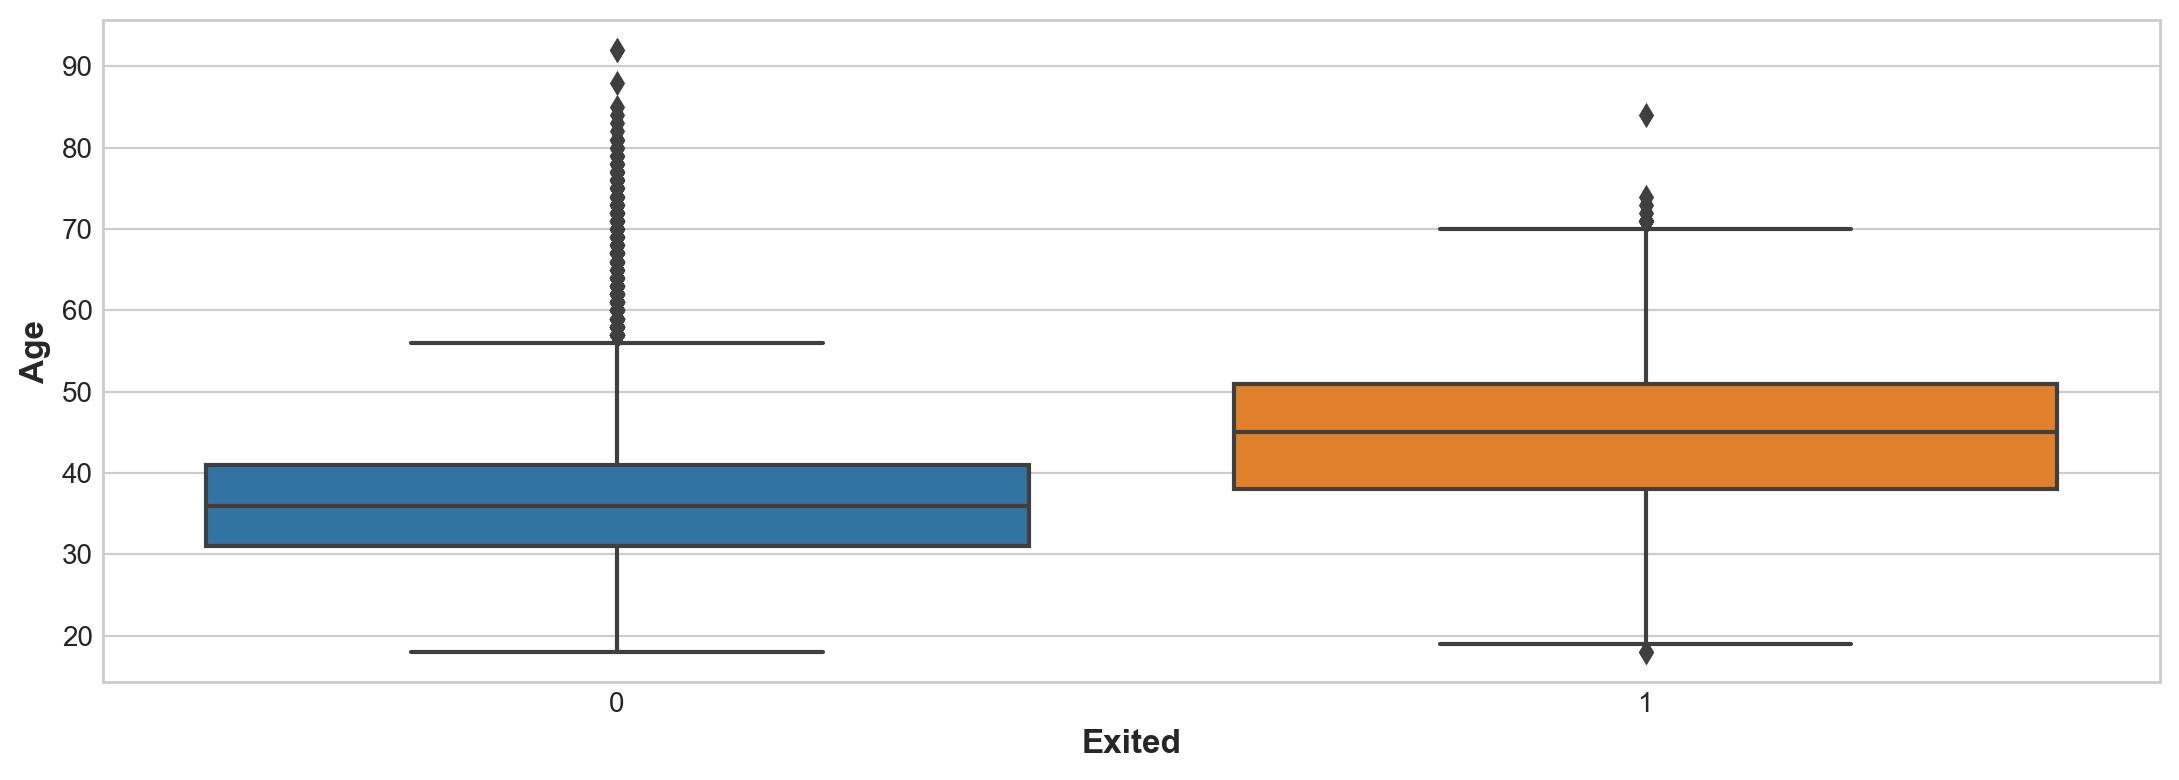

In [19]:
sns.boxplot(df_bank, y="Age", x="Exited")

<Axes: xlabel='Complain', ylabel='Age'>

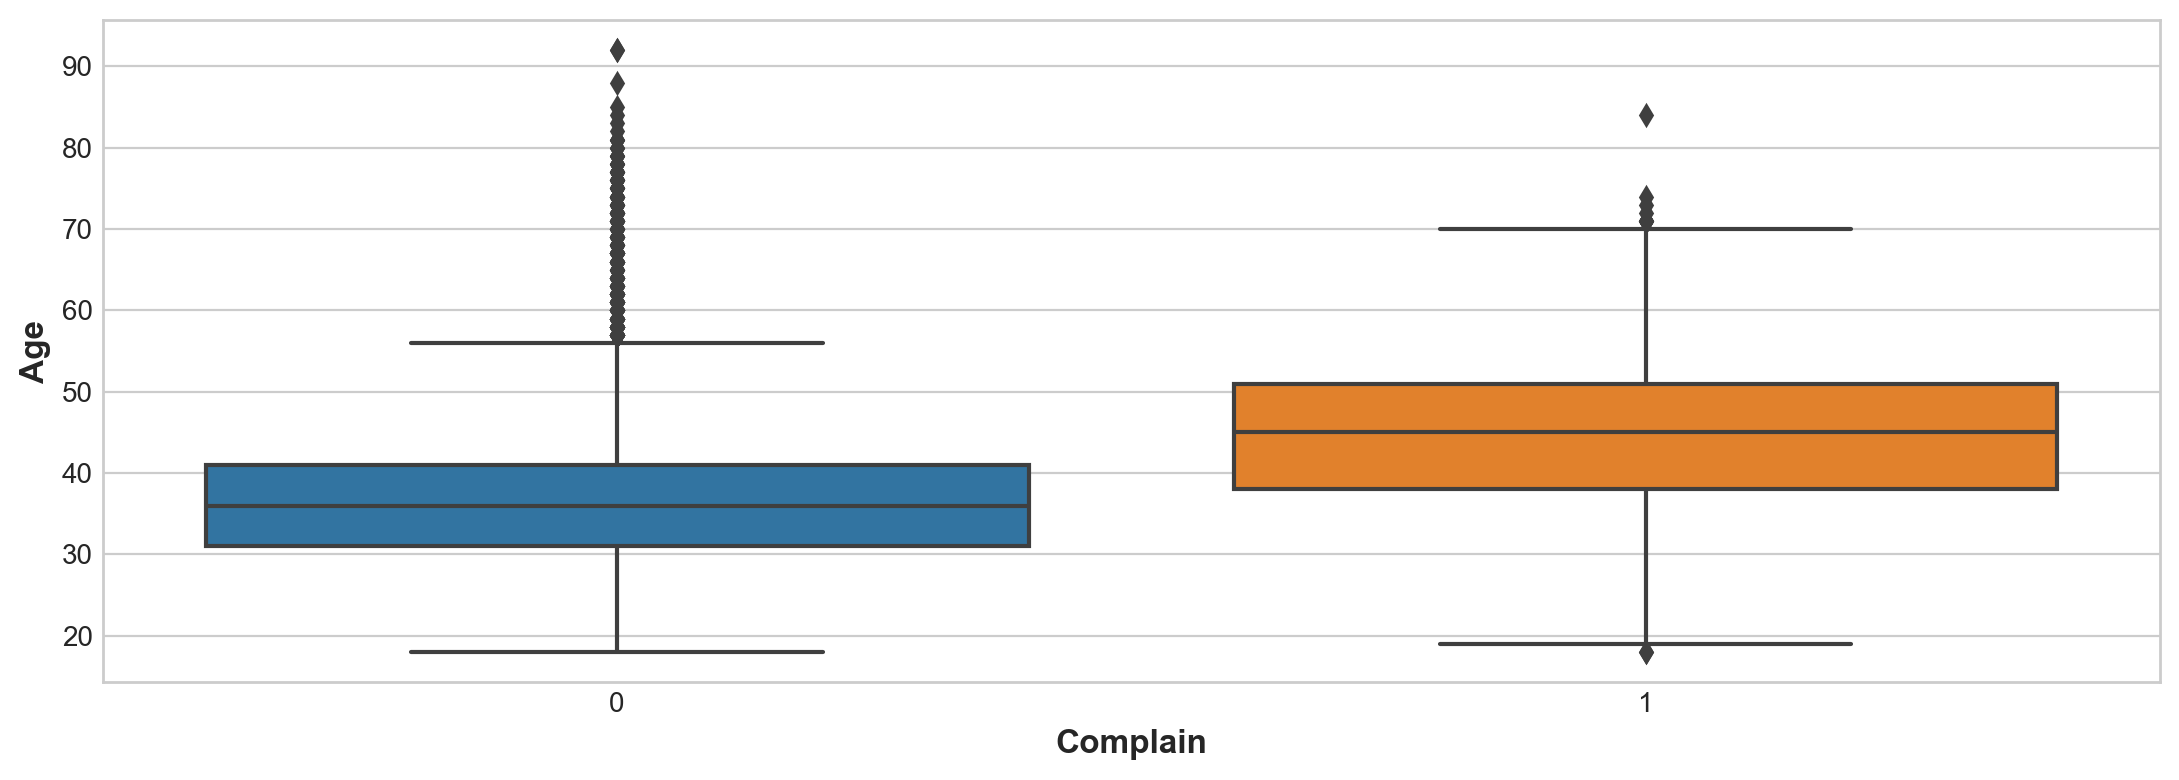

In [20]:
sns.boxplot(df_bank, y="Age", x="Complain")

# Customer Segmentation

In [21]:
df_bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [22]:
df_bank["CreditScore"].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

In [23]:
# Segment Customers based on their geography, gender and age group
df_bank.groupby(['Geography',
       'Gender'])['Age'].mean()

Geography  Gender
France     Female    38.773994
           Male      38.296404
Germany    Female    40.154233
           Male      39.424772
Spain      Female    39.199265
           Male      38.649135
Name: Age, dtype: float64

In [24]:
# Average Credit Score, balance and estimated Salary for each segment
df_bank.groupby(['Geography','Gender'])[['Balance','CreditScore']].mean()

Balance  CreditScore
Geography Gender                            
France    Female   60322.670159   649.185759
          Male     63546.284875   650.064657
Germany   Female  119145.966471   653.093881
          Male    120259.668222   649.966565
Spain     Female   59862.092534   651.769513
          Male     63352.833746   650.992075

In [25]:
# Churn rate for different segment
df_bank.groupby(['Exited','Geography','Gender'])['Age'].mean()

Exited  Geography  Gender
0       France     Female    37.098834
                   Male      37.337635
        Germany    Female    37.343624
                   Male      37.286316
        Spain      Female    38.011655
                   Male      37.716418
1       France     Female    45.332609
                   Male      44.857550
        Germany    Female    44.828125
                   Male      44.975410
        Spain      Female    43.610390
                   Male      44.829670
Name: Age, dtype: float64

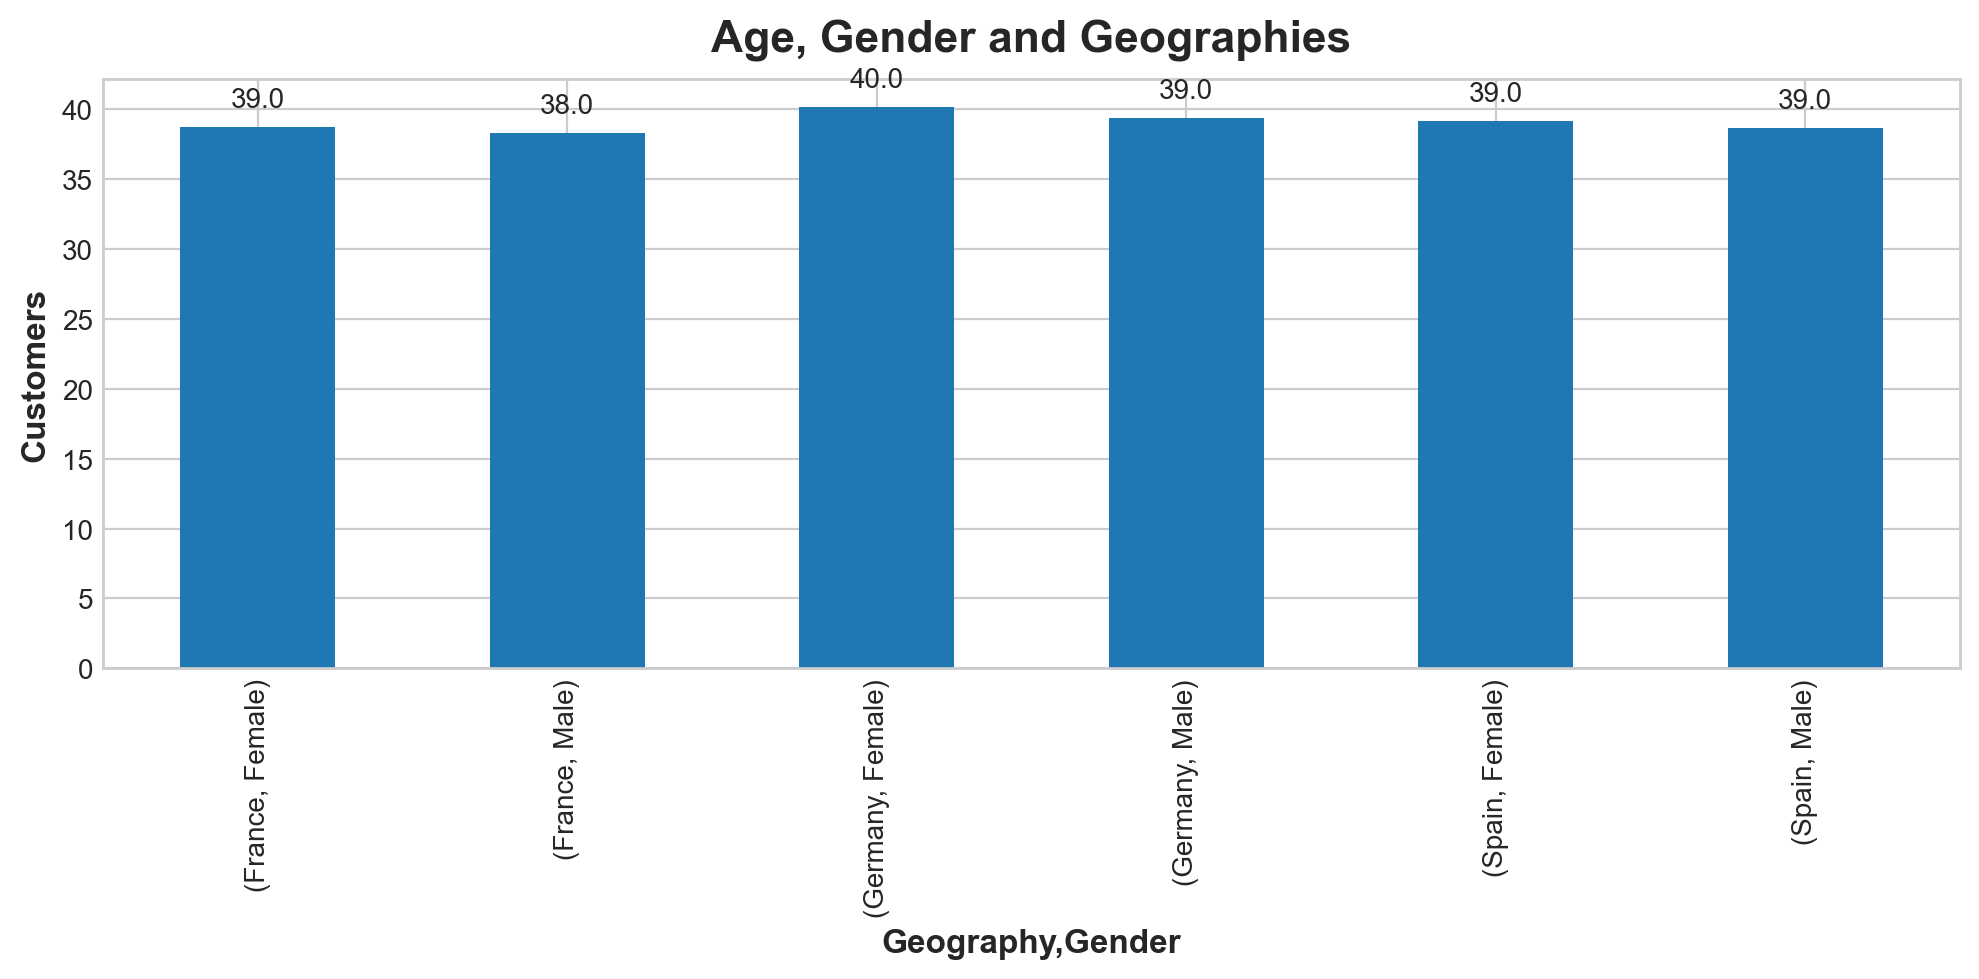

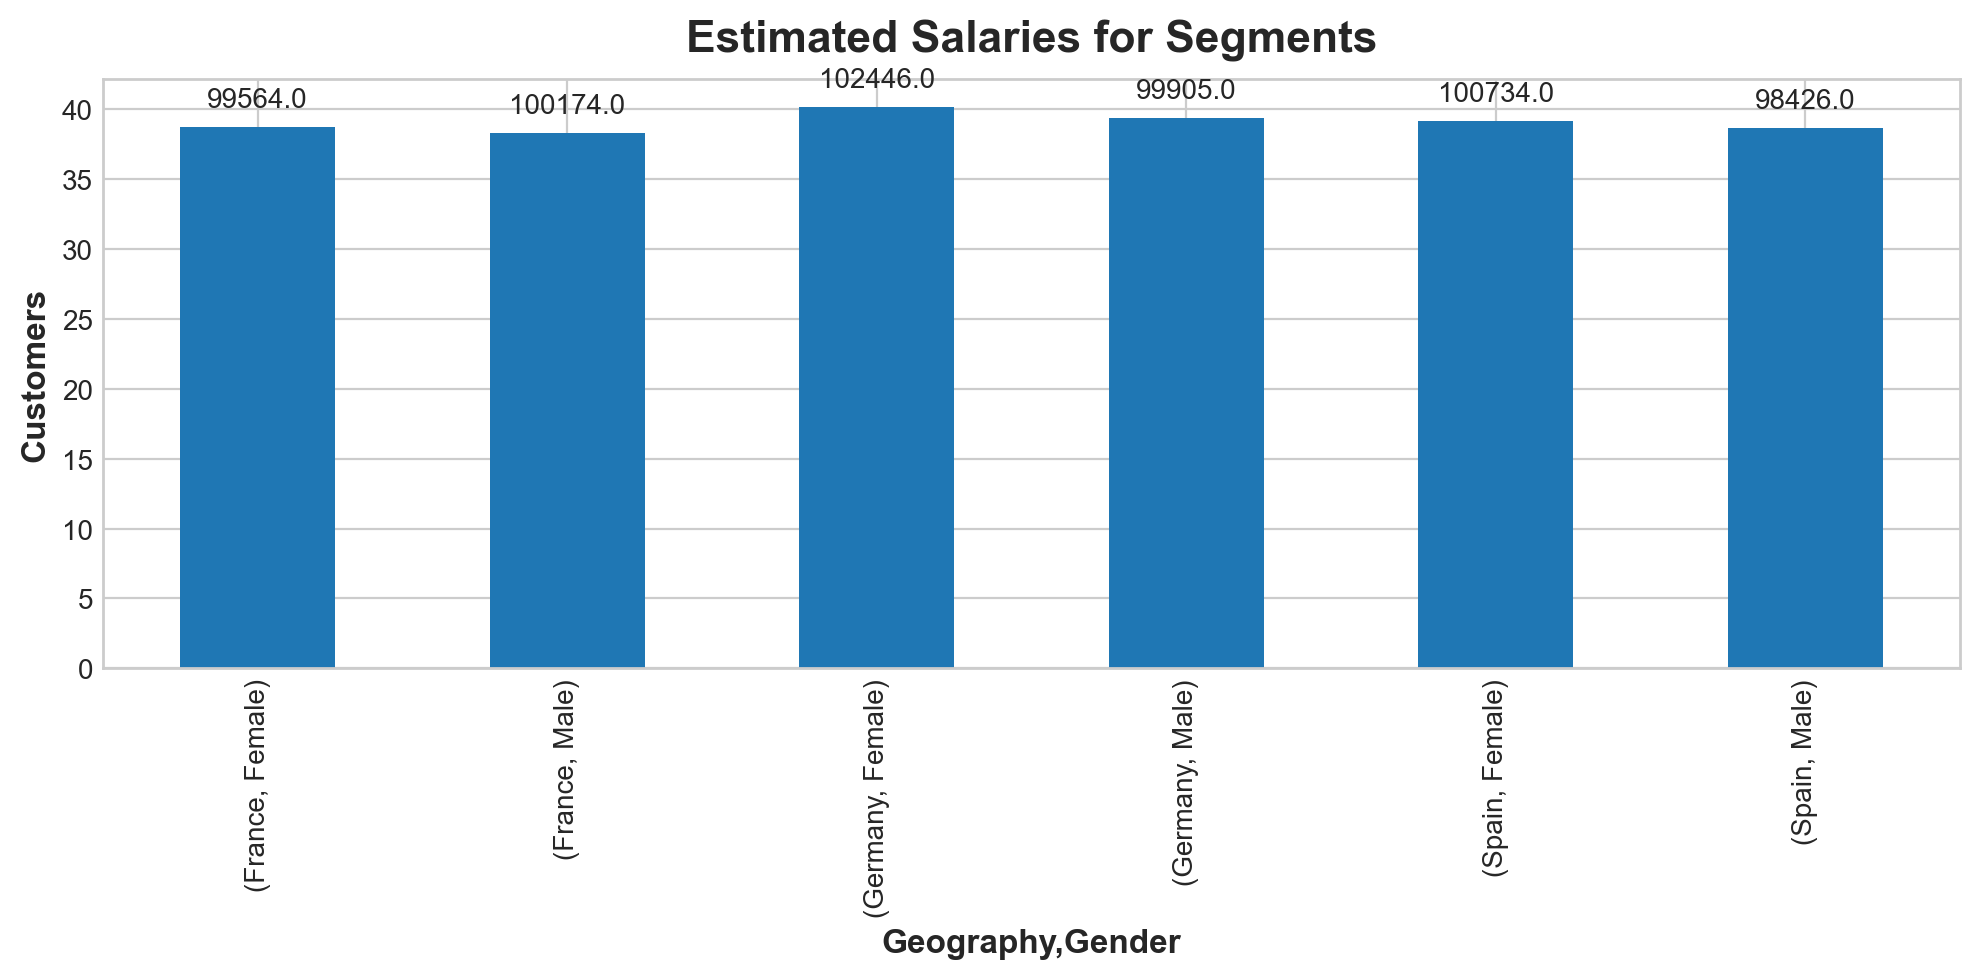

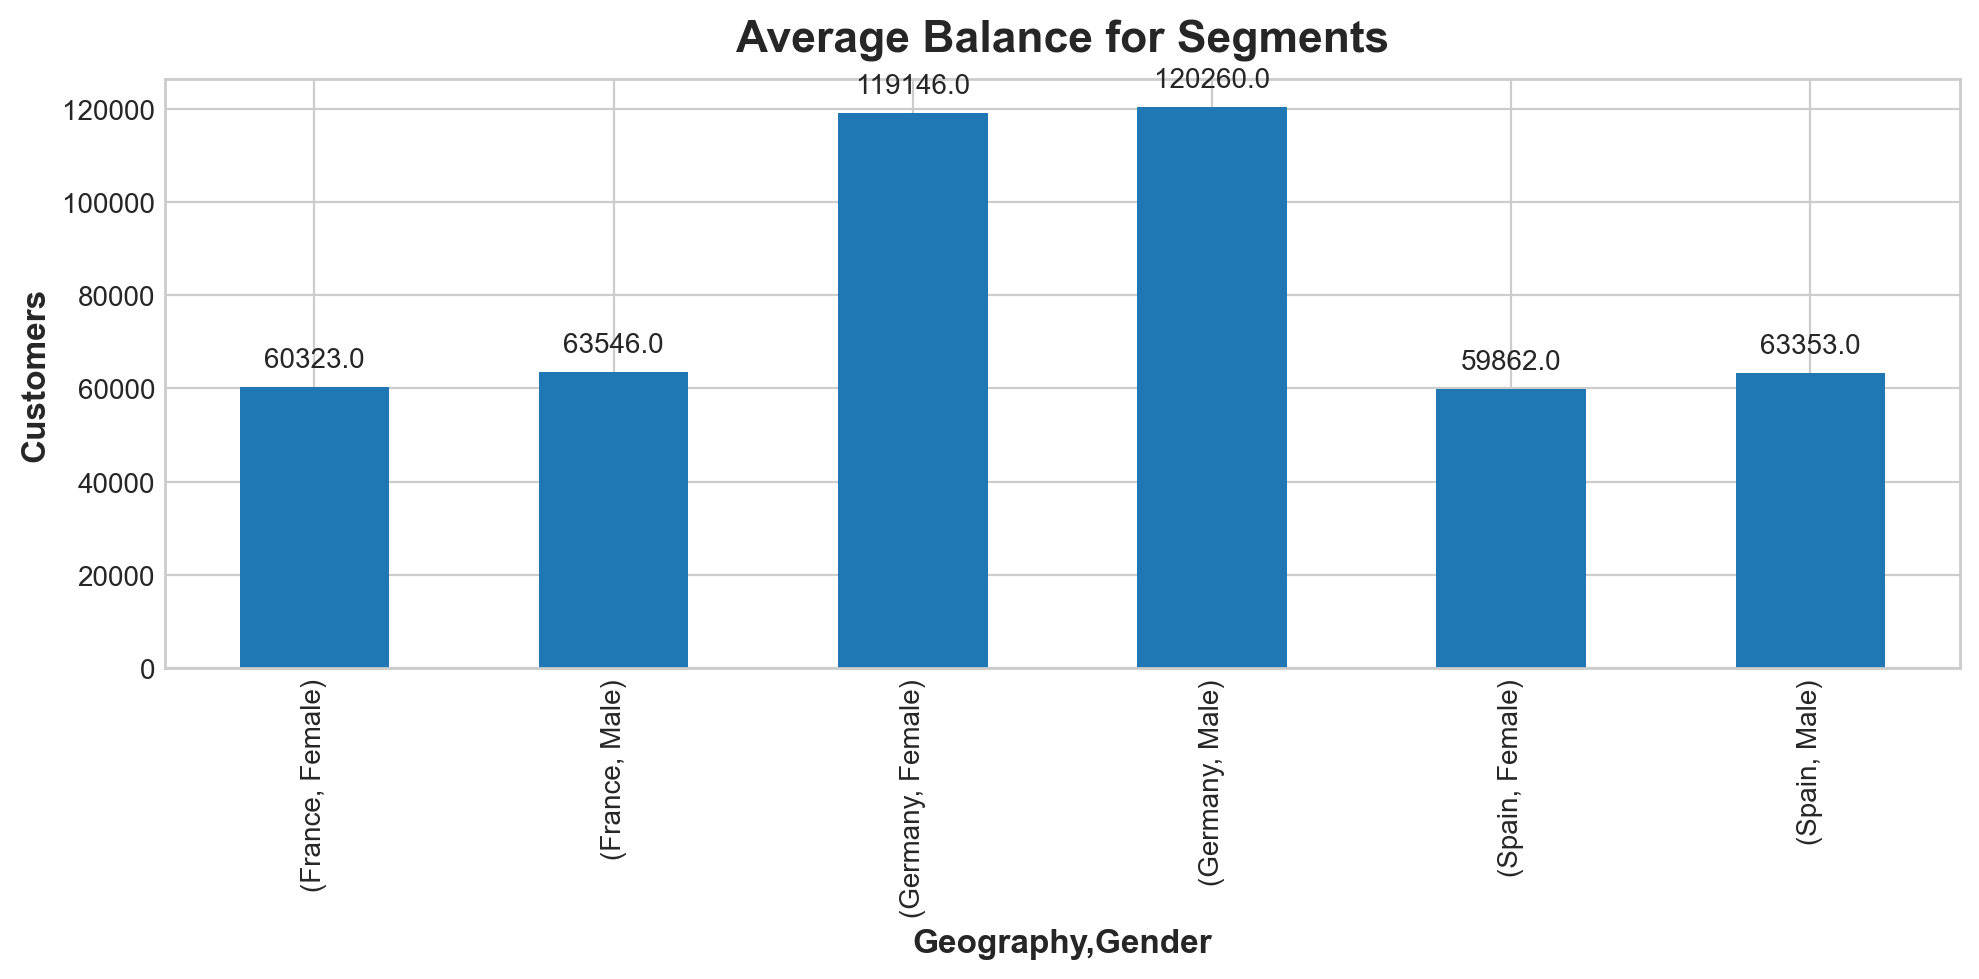

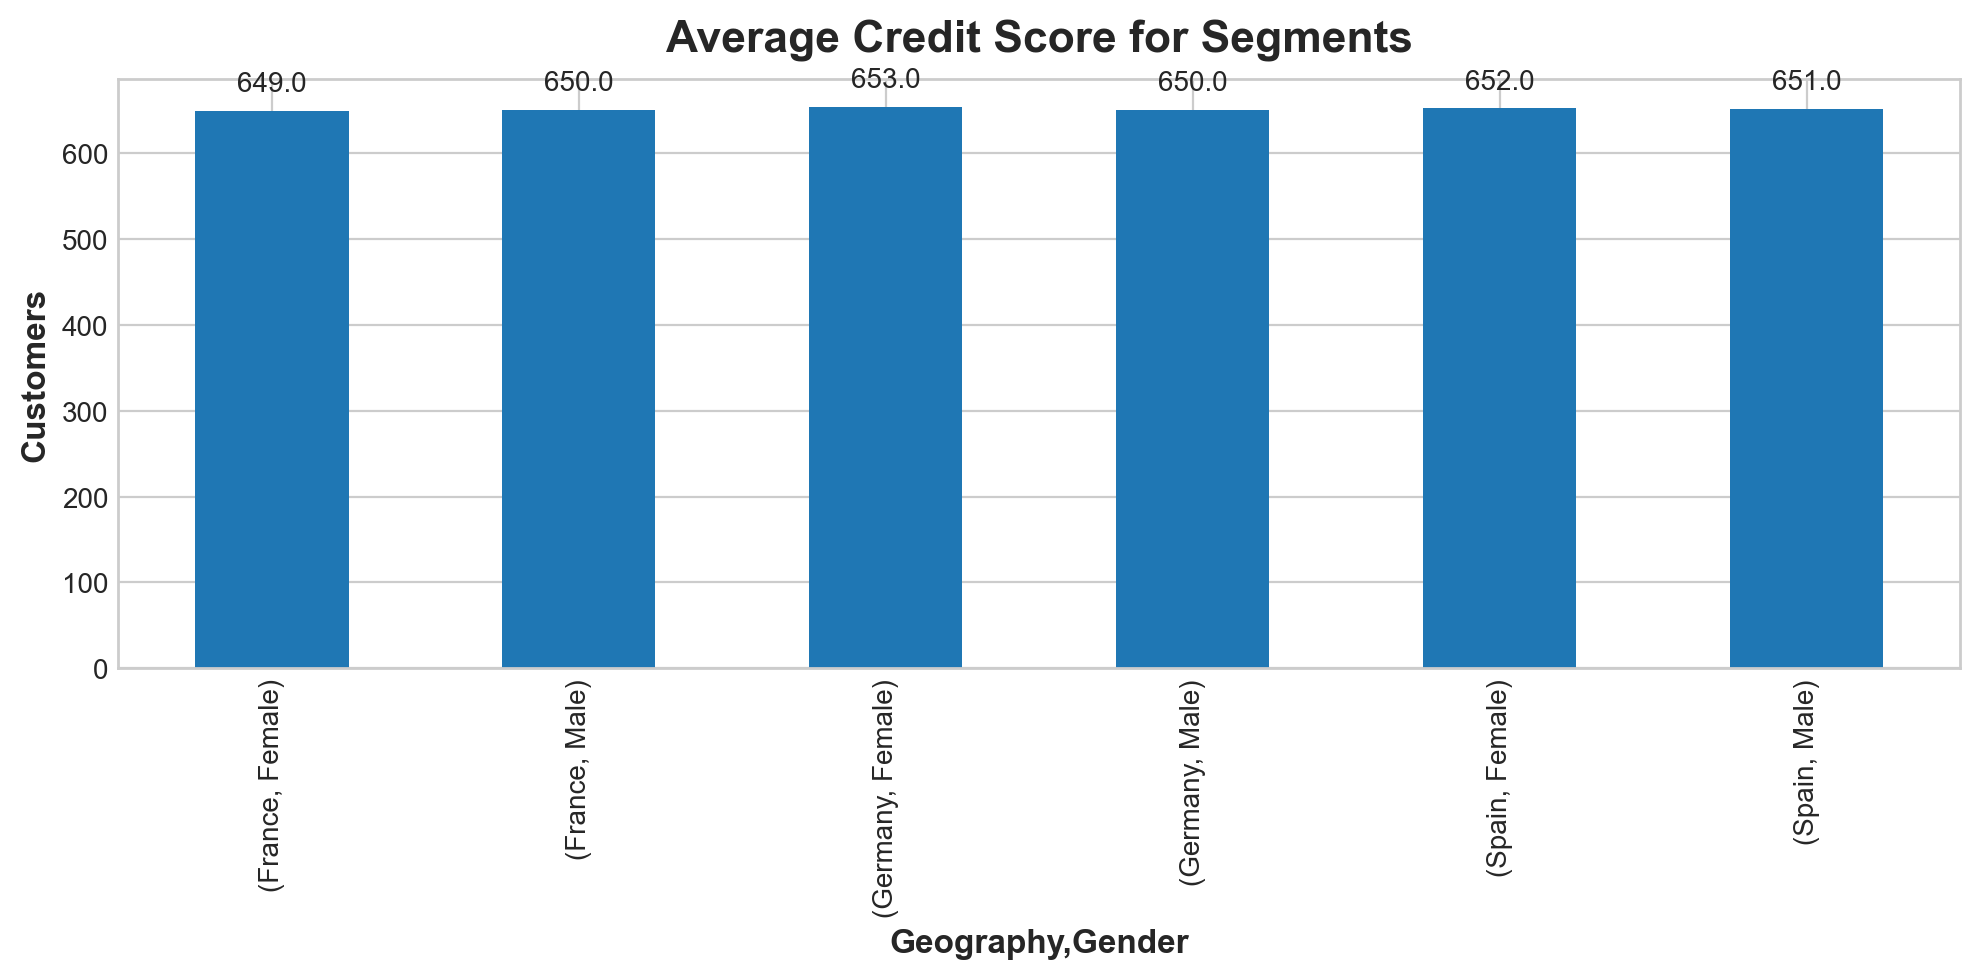

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Geography','Gender'])['Age'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(['Geography','Gender'])['Age'].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Age, Gender and Geographies")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Geography',
       'Gender'])['Age'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(["Geography",'Gender'])["EstimatedSalary"].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Estimated Salaries for Segments")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Geography','Gender'])['Balance'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(['Geography','Gender'])['Balance'].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Average Balance for Segments")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Geography','Gender'])['CreditScore'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(['Geography','Gender'])['CreditScore'].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Average Credit Score for Segments")
plt.show()


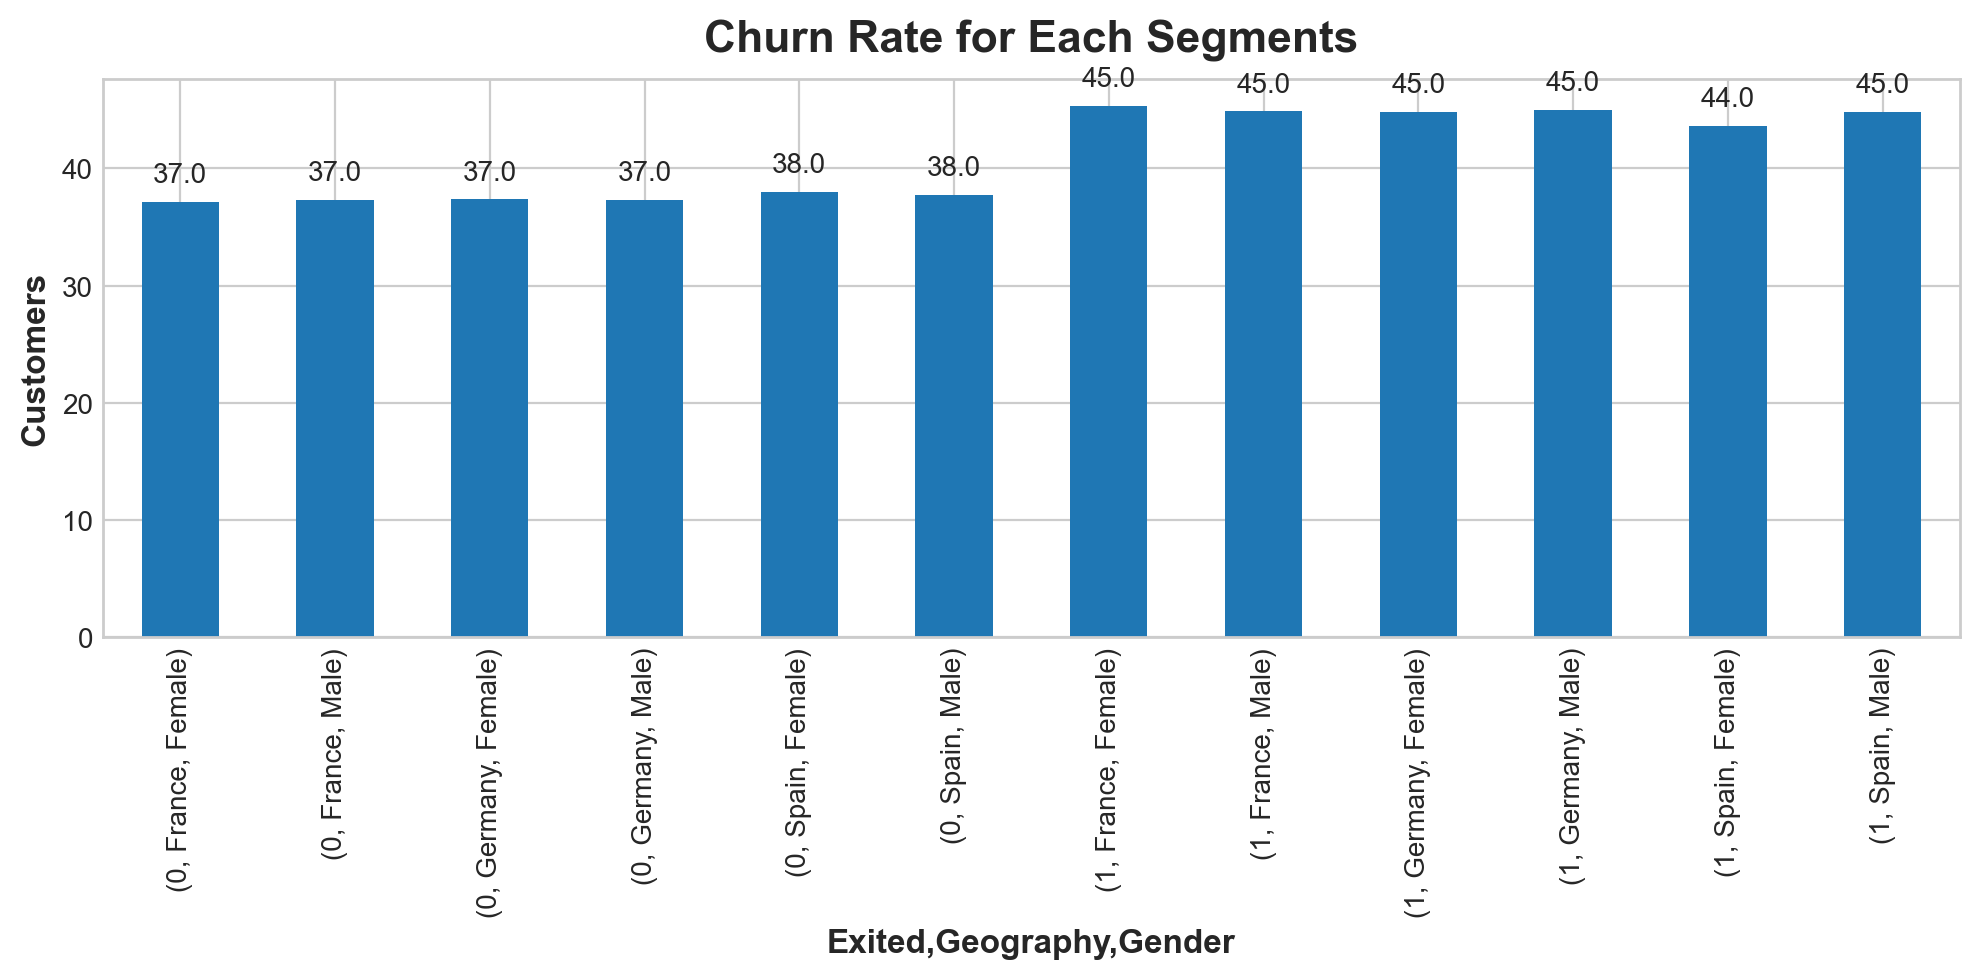

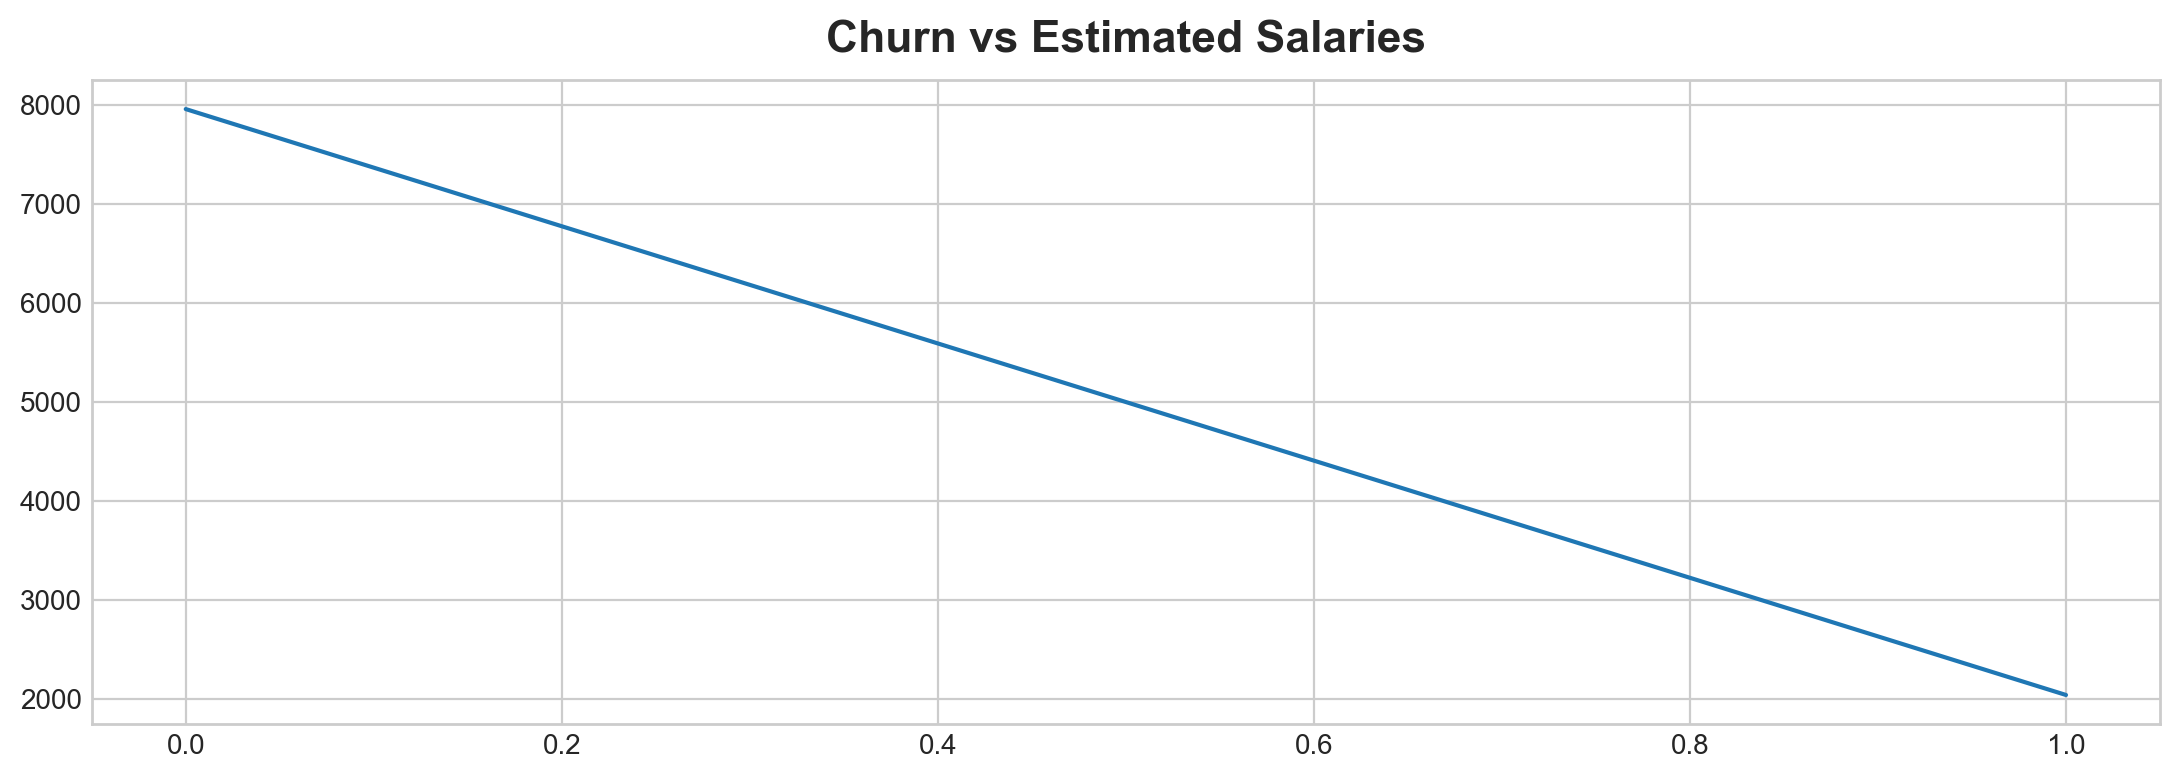

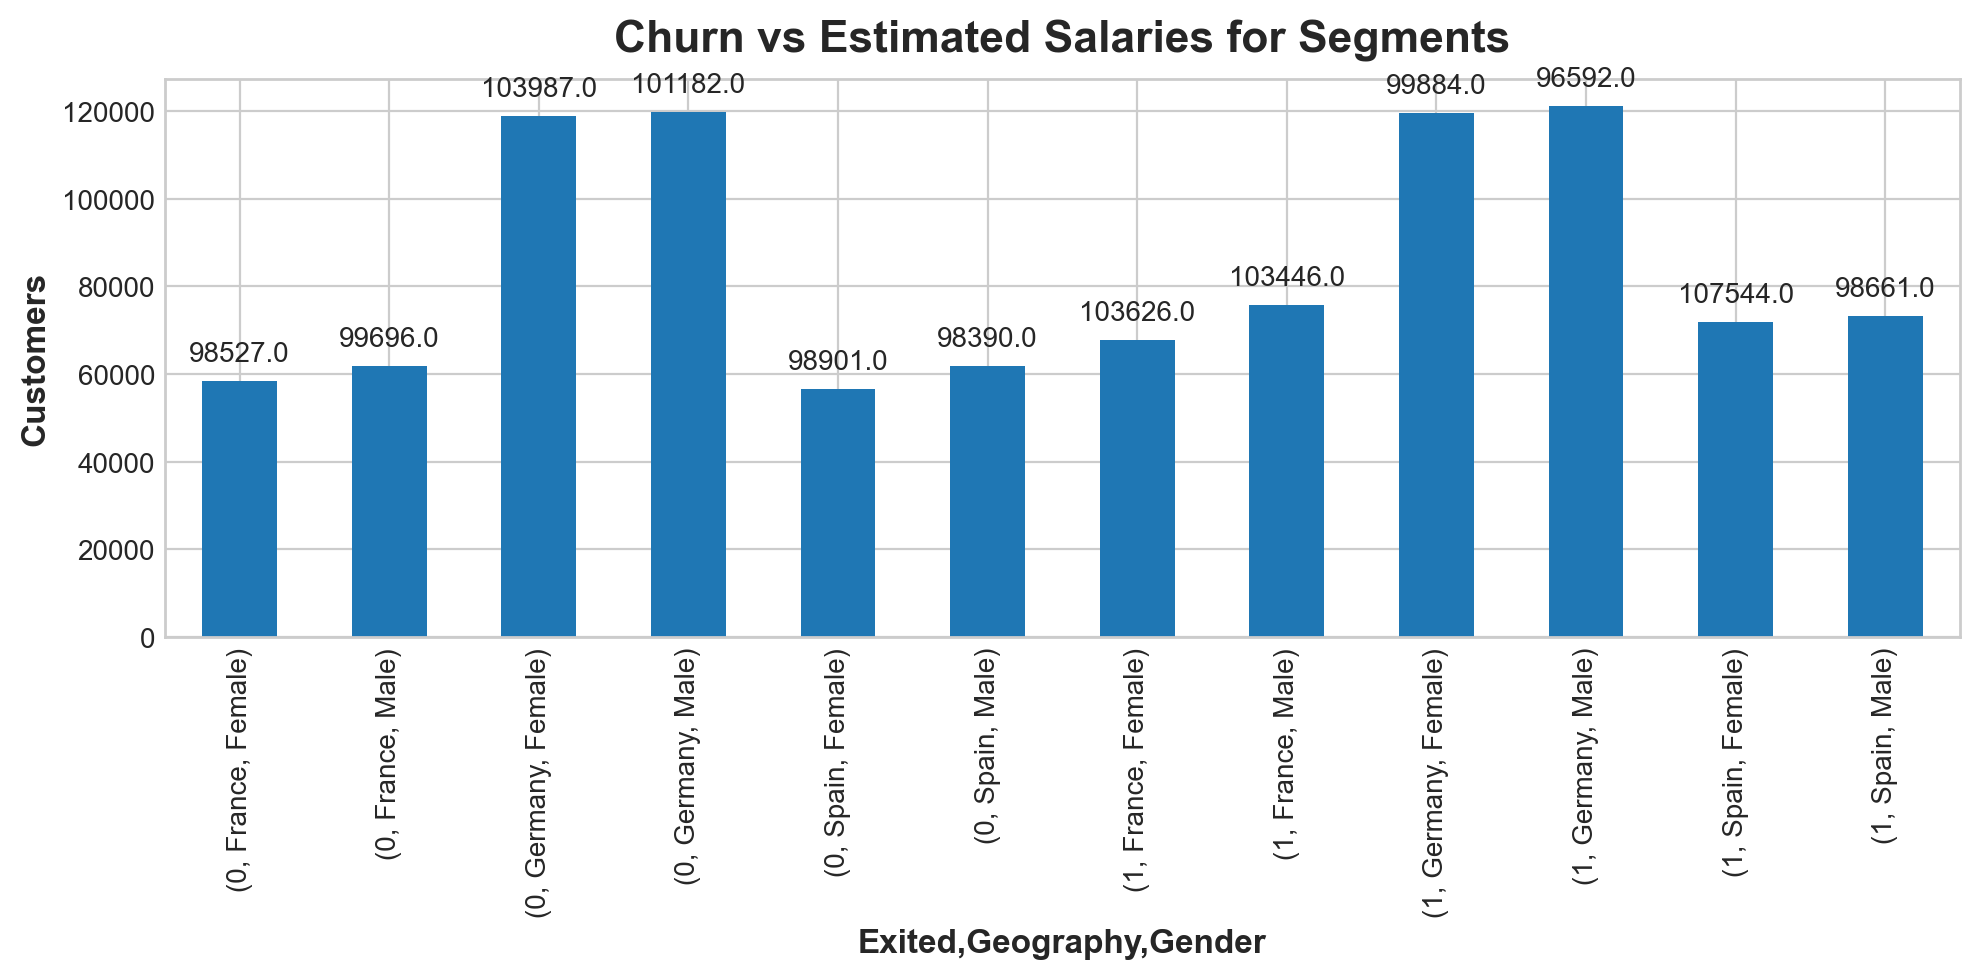

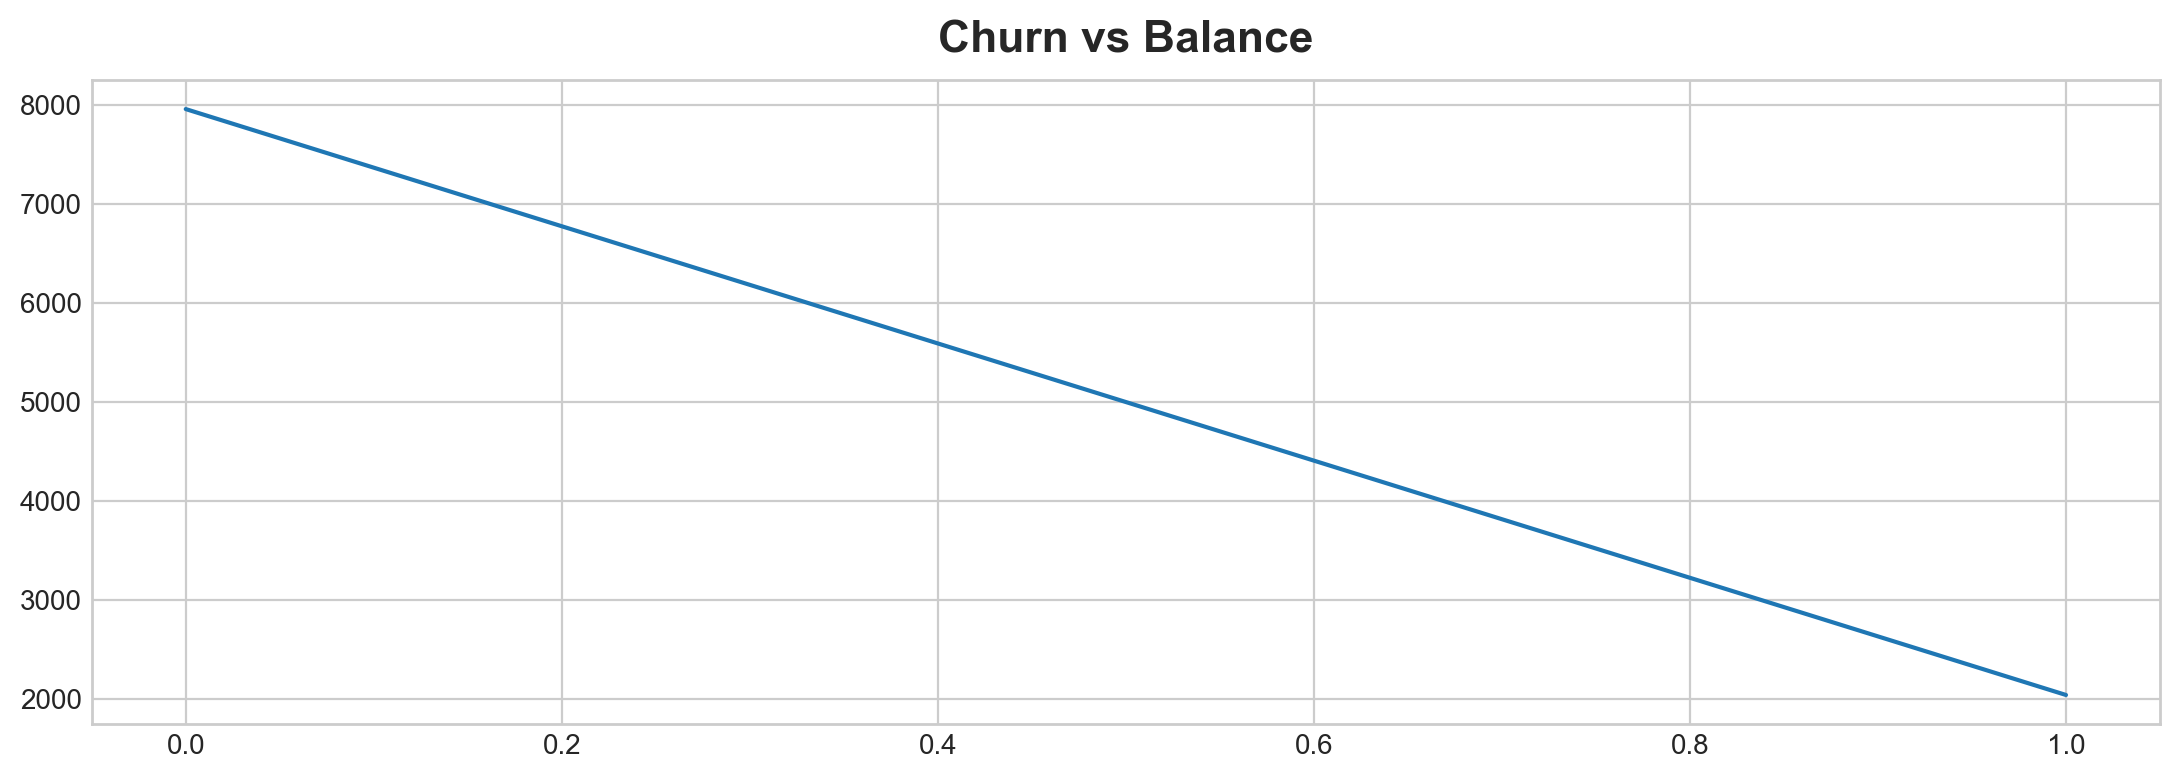

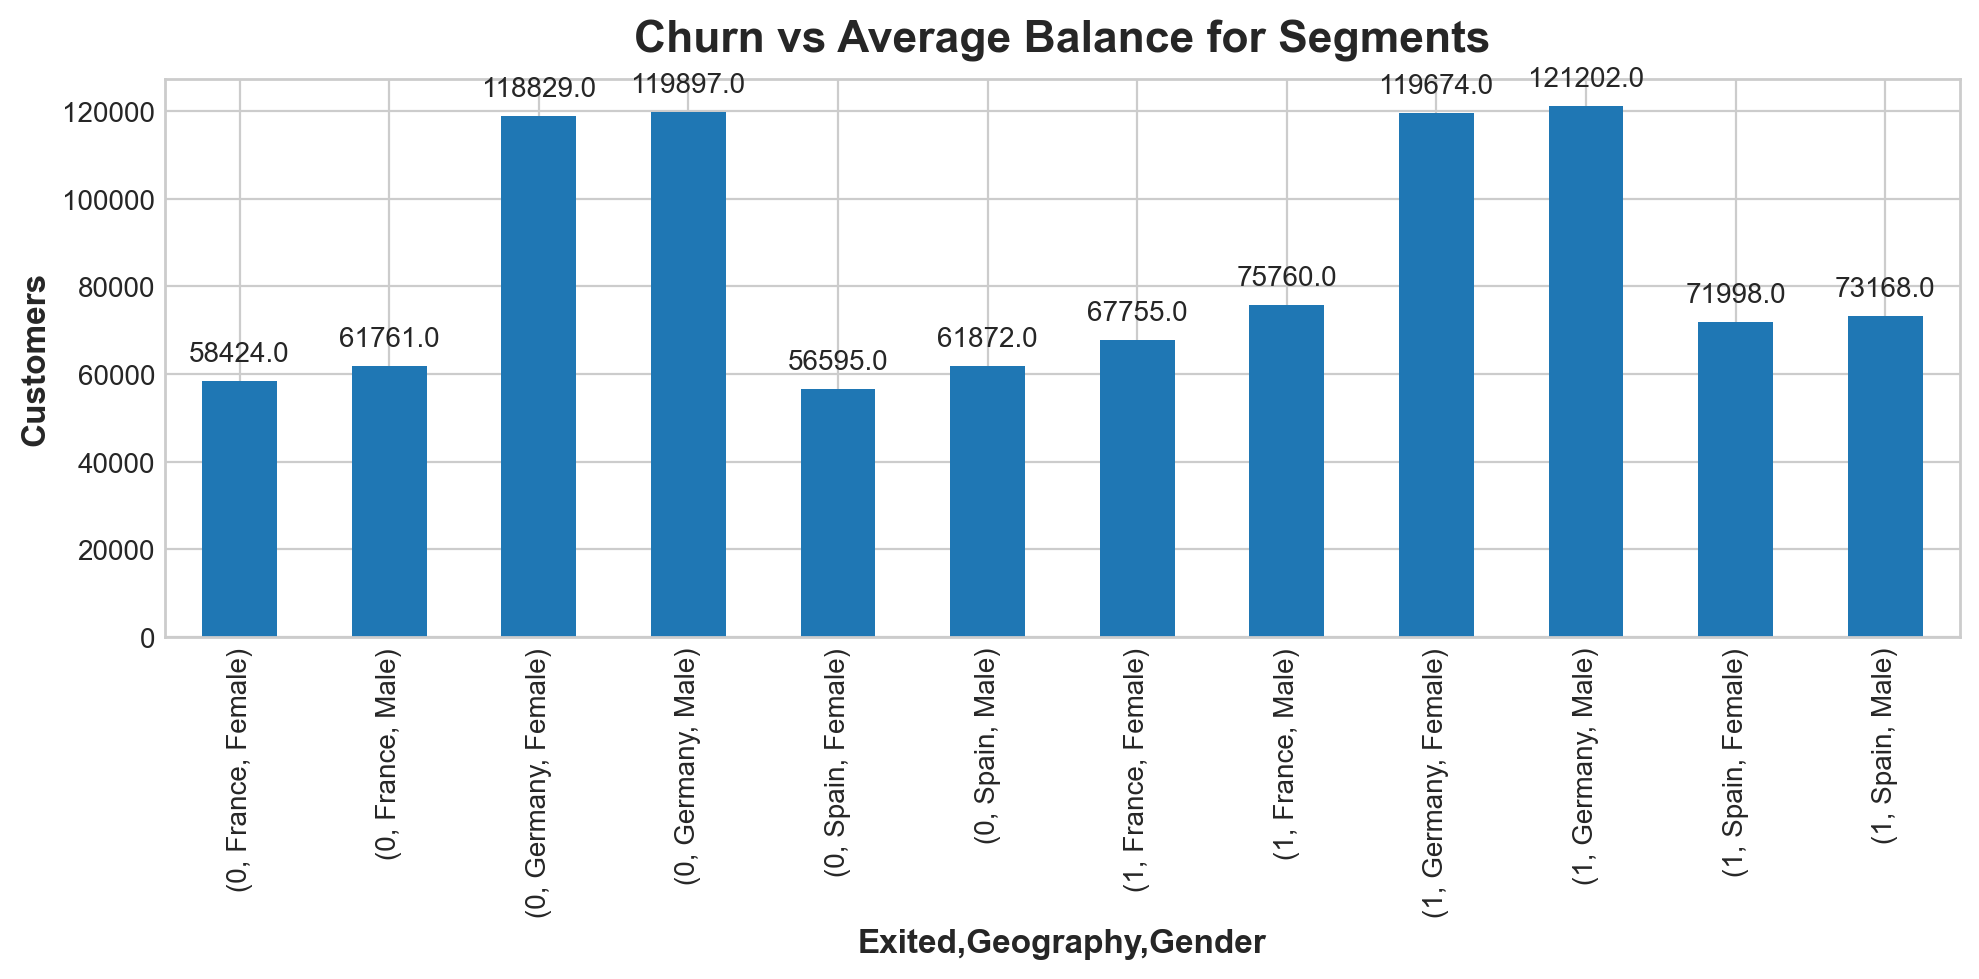

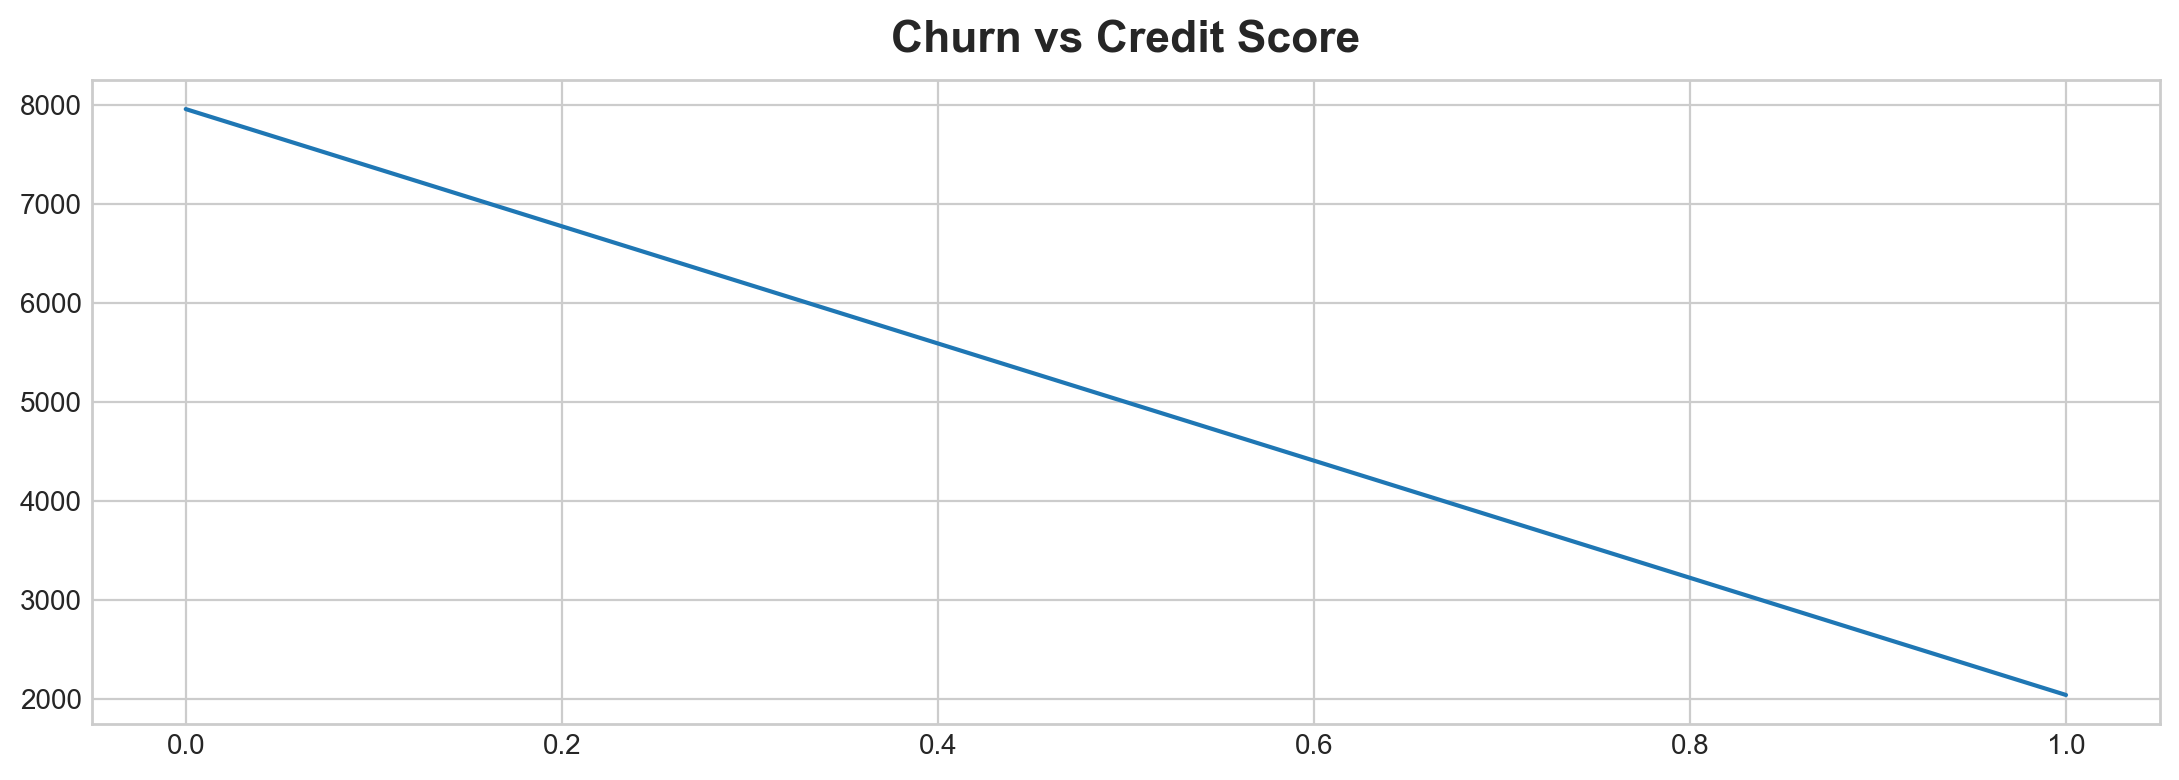

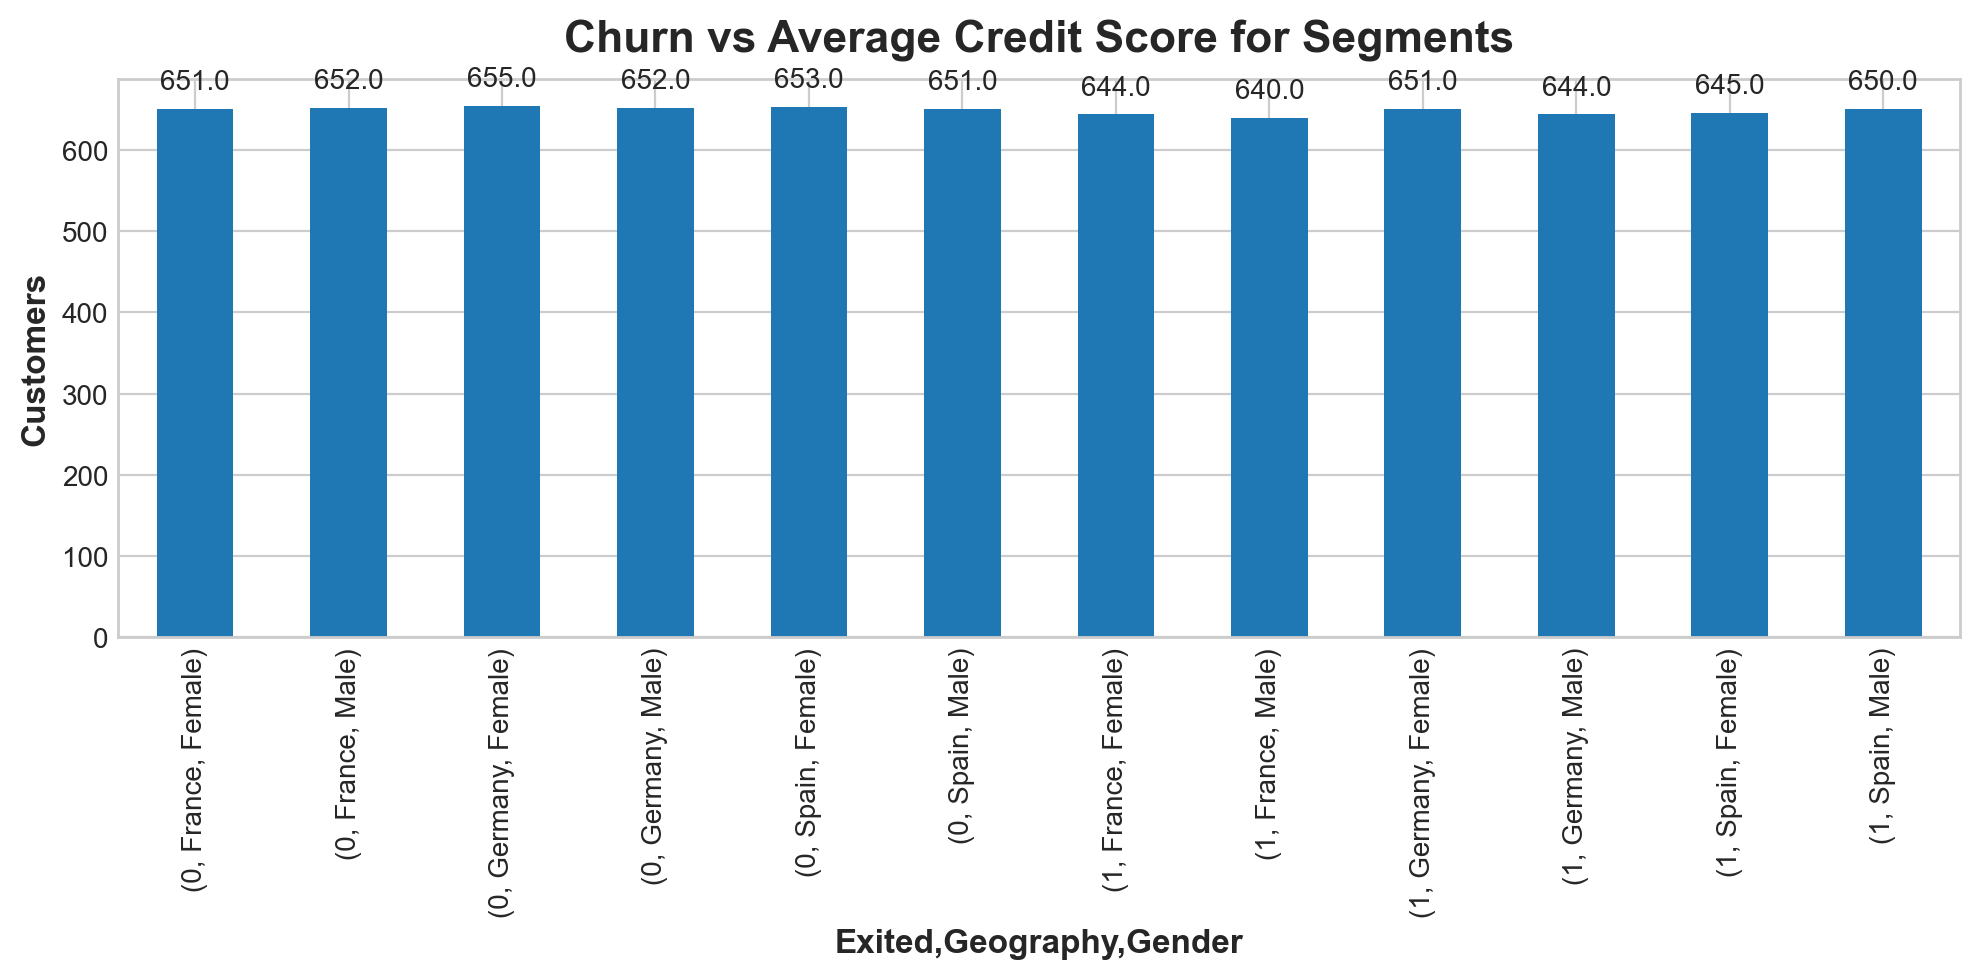

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Exited','Geography','Gender'])['Age'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(['Exited','Geography','Gender'])['Age'].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Churn Rate for Each Segments")
plt.show()

df_bank.sort_values('EstimatedSalary', ascending=False)['Exited'].value_counts().plot(title="Churn vs Estimated Salaries")

fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Exited','Geography','Gender'])['Balance'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(['Exited','Geography','Gender'])['EstimatedSalary'].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Churn vs Estimated Salaries for Segments")
plt.show()

df_bank.sort_values('Balance', ascending=False)['Exited'].value_counts().plot(title="Churn vs Balance")

fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Exited','Geography','Gender'])['Balance'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(['Exited','Geography','Gender'])['Balance'].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Churn vs Average Balance for Segments")
plt.show()

df_bank.sort_values('CreditScore', ascending=False)['Exited'].value_counts().plot(title="Churn vs Credit Score")

fig, ax = plt.subplots(figsize=(10,5))
df_bank.groupby(['Exited','Geography','Gender'])['CreditScore'].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(['Exited','Geography','Gender'])['CreditScore'].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Churn vs Average Credit Score for Segments")
plt.show()



### Those who Exited the bank have lower:
+ Average Balance
+ Average EstimatedSalary
+ Average Credit score
+ Their Age is above 44years

# Credit Score Analysis

In [143]:
# Average Credit Score for Gender and Geography
df_bank.groupby("Geography")[['Geography','CreditScore']].mean()

In [142]:
# Average Credit Score for Gender 
df_bank.groupby("Gender")[['Gender','CreditScore']].mean()

In [30]:
# Average Credit Score vs Churn
df_bank[['CreditScore','Exited']].groupby("Exited").mean()

CreditScore
Exited             
0        651.837855
1        645.414622

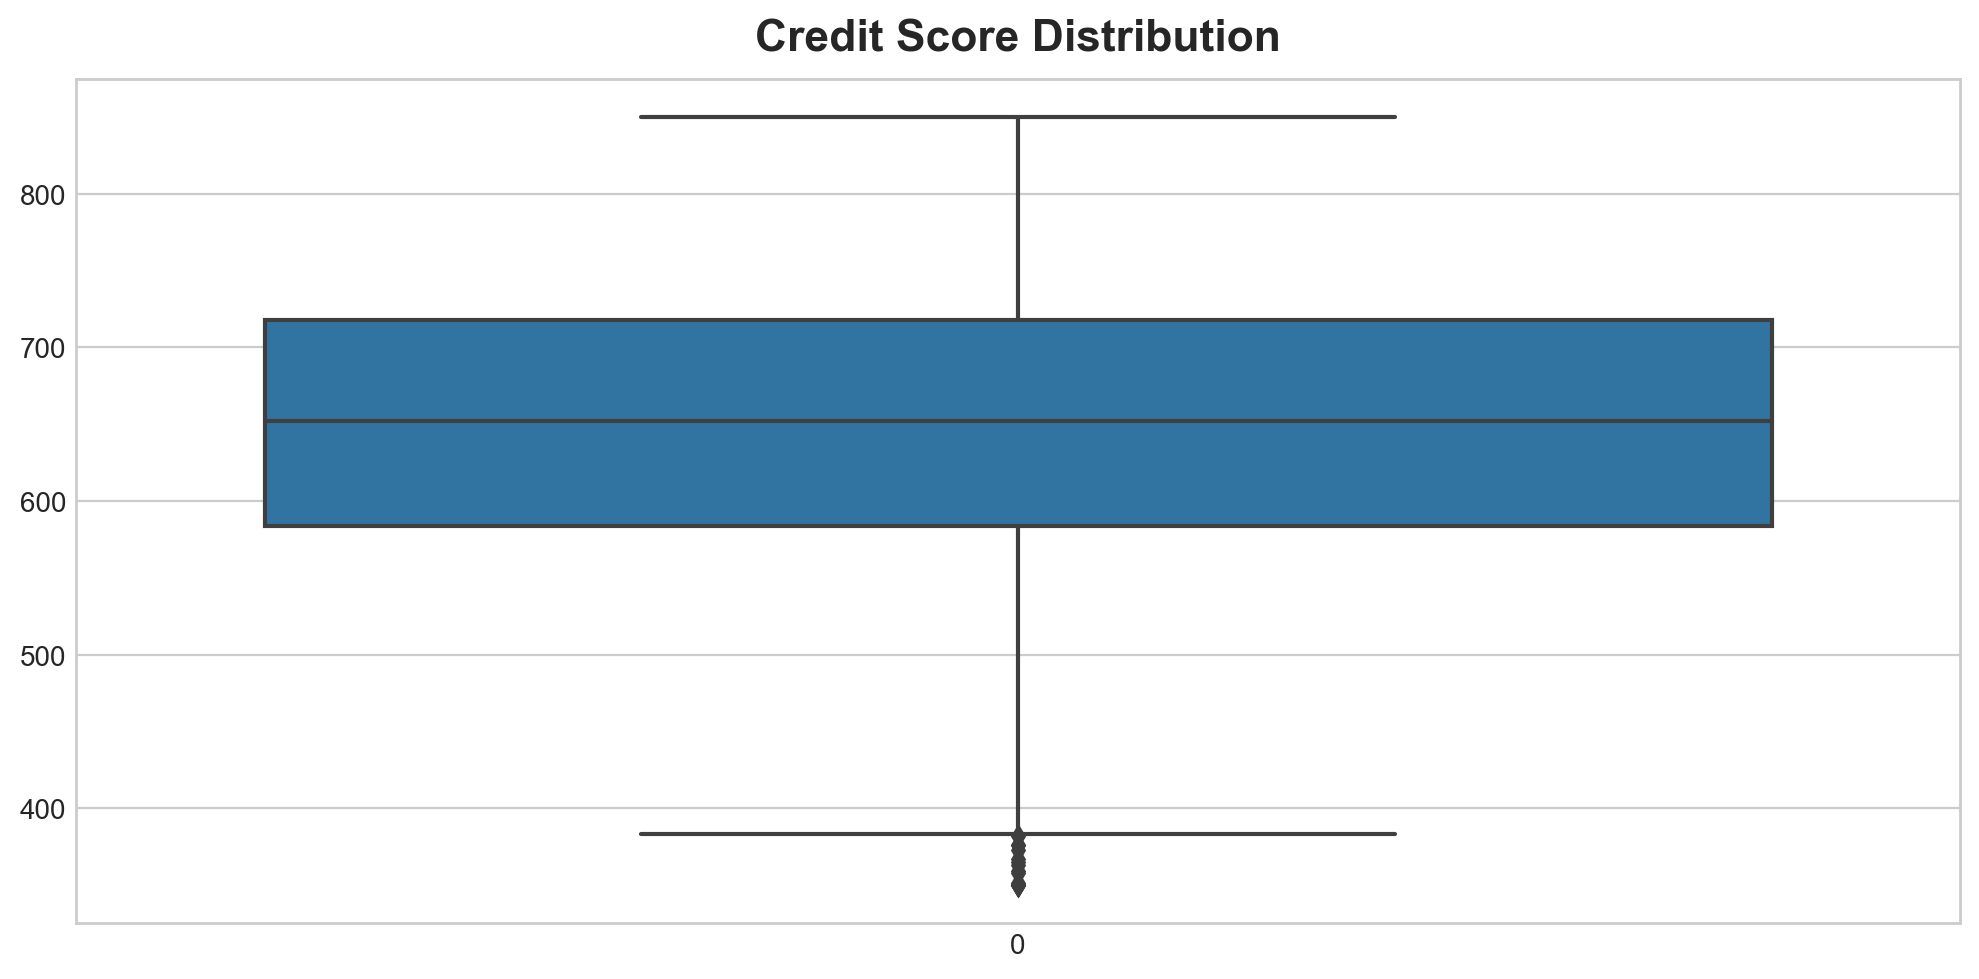

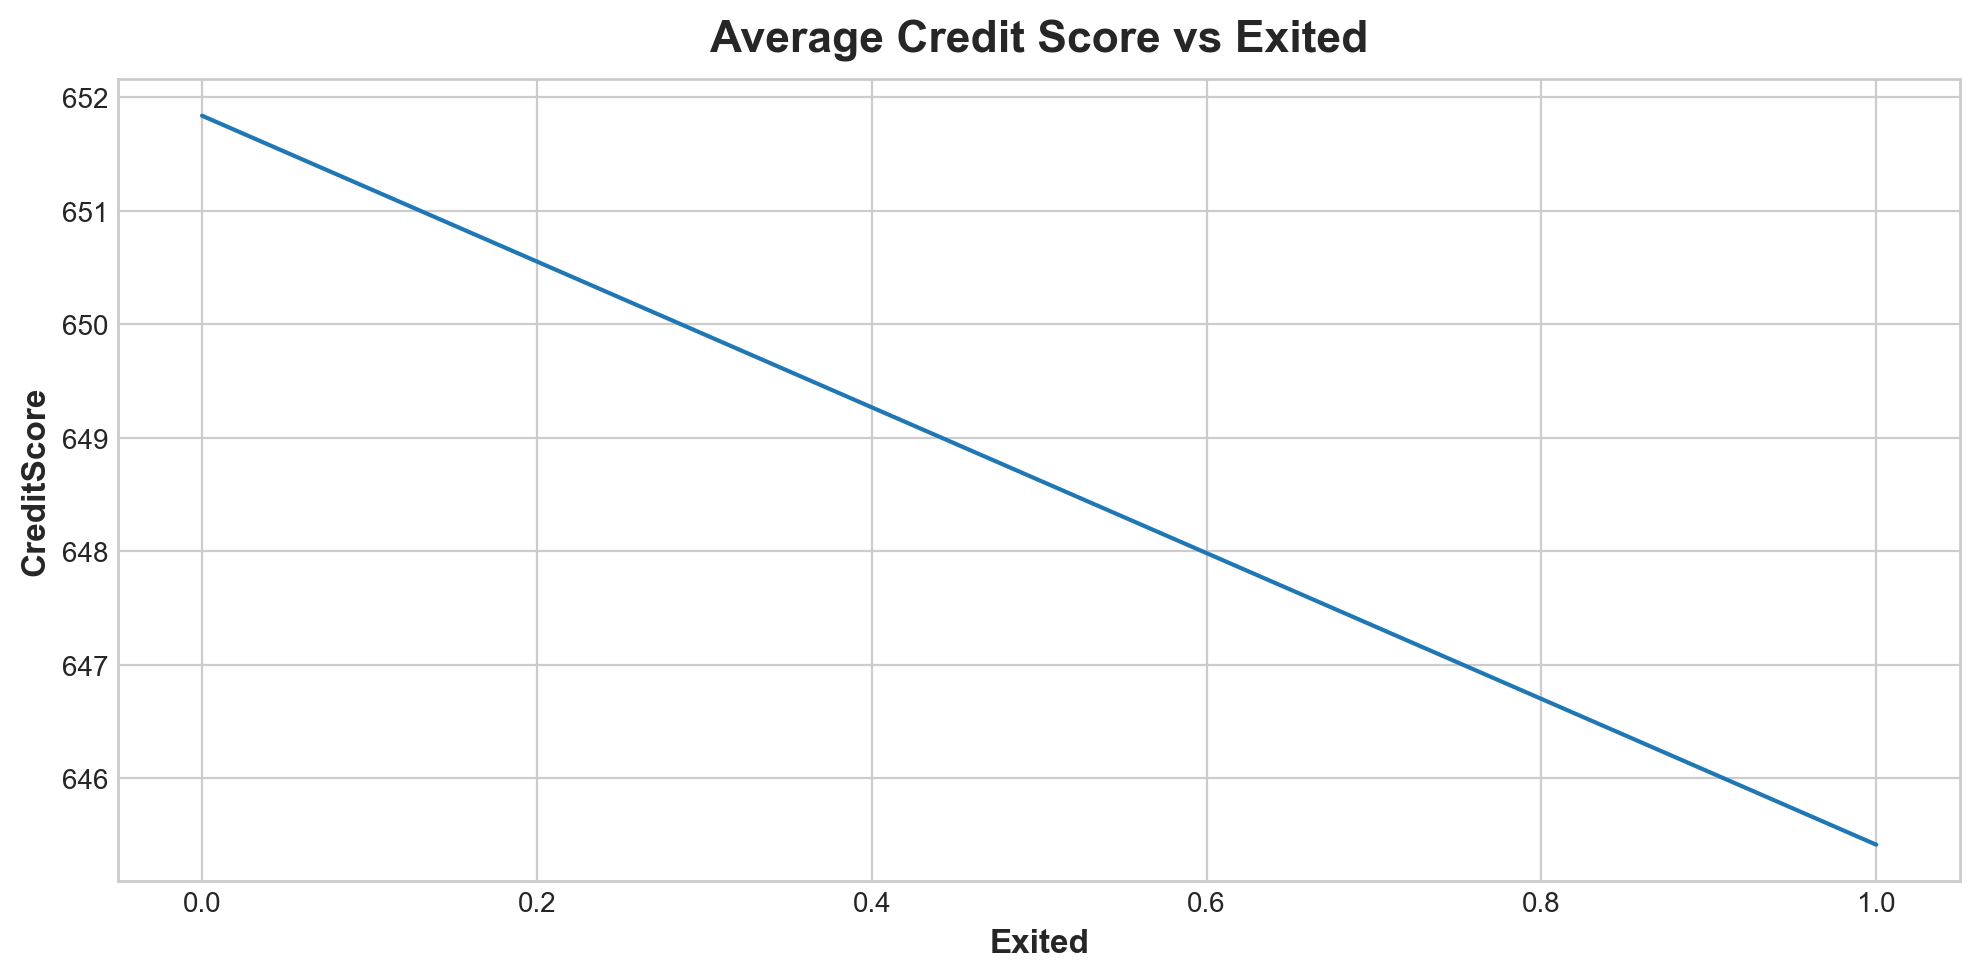

In [141]:
plt.figure(figsize=(10,5))
sns.boxplot(df_bank["CreditScore"])
plt.title('Credit Score Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(df_bank.groupby("Geography")[['Geography','CreditScore']].mean())
plt.title('Average Credit Score by Gender and Geography')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(df_bank.groupby("Gender")[['Gender','CreditScore']].mean())
plt.title('Average Credit Score by Gender')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(df_bank[['CreditScore','Exited']].groupby("Exited").mean(), x='Exited', y='CreditScore')
plt.title('Average Credit Score vs Exited')
plt.show()

### Credit Scores Analysis
+ The mean Credit score for all customers is around 650
+ The mean Credit score for Males: 650.276892 is lower than the mean credit score for Females: 650.831389
+ Across the three countries, Germany has the highest CS 651.453567, followed by Spain: 651.333872, and France: 649.668329
+ The mean credit score for those who left is lower than the mean credit score for those who stayed

# Balance and Tenure Analysis

In [32]:
df_bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [33]:
df_bank.sort_values("Tenure", ascending=False)[["Balance","Tenure"]]

Balance  Tenure
7565  105355.81      10
9302       0.00      10
376   117231.63      10
7596  137456.28      10
6827       0.00      10
...         ...     ...
5150  196853.62       0
1685  117356.19       0
1682   97925.11       0
8869  150219.41       0
6734       0.00       0

[10000 rows x 2 columns]

In [34]:
df_bank["Balance"].value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

In [35]:
zero_balance = df_bank[df_bank['Balance'] == 0][['Tenure','Balance','Geography','Gender','Exited']].sort_values("Tenure", ascending=False)
zero_balance

Tenure  Balance Geography  Gender  Exited
5152      10      0.0     Spain    Male       0
2509      10      0.0    France  Female       1
2368      10      0.0     Spain    Male       0
300       10      0.0    France  Female       0
8761      10      0.0     Spain    Male       1
...      ...      ...       ...     ...     ...
5769       0      0.0    France  Female       0
2038       0      0.0    France    Male       1
8478       0      0.0    France    Male       0
1897       0      0.0     Spain  Female       0
4241       0      0.0     Spain    Male       0

[3617 rows x 5 columns]

In [36]:
zero_balance['Tenure'].value_counts()

7     386
2     382
5     374
4     369
6     367
8     363
9     360
3     352
1     349
10    178
0     137
Name: Tenure, dtype: int64

In [37]:
df_bank[df_bank['Balance'] == 0].count()

RowNumber             3617
CustomerId            3617
Surname               3617
CreditScore           3617
Geography             3617
Gender                3617
Age                   3617
Tenure                3617
Balance               3617
NumOfProducts         3617
HasCrCard             3617
IsActiveMember        3617
EstimatedSalary       3617
Exited                3617
Complain              3617
Satisfaction Score    3617
Card Type             3617
Point Earned          3617
dtype: int64

In [38]:
# 500 of those with zero balance Exited
df_bank[df_bank['Balance'] == 0]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

In [39]:
df_bank[df_bank['Balance'] == 0][['Exited','Geography']].value_counts()

Exited  Geography
0       France       2081
        Spain        1036
1       France        337
        Spain         163
dtype: int64

In [40]:
df_bank[df_bank['Balance'] == 0][['Exited','Gender']].value_counts()

Exited  Gender
0       Male      1753
        Female    1364
1       Female     290
        Male       210
dtype: int64

In [41]:
df_bank['Balance'].count()

10000

In [42]:
3617/10000

0.3617

### Out of the 3617 people with zero balance
+ 500 Exited the bank: 337 from France and 163 from Spain

### Relationship between Tenure, Age, Gender, Geography, Balance

In [43]:
balance_tenure = df_bank.sort_values("Tenure", ascending=False)[["Gender","Geography","Balance","Tenure","Exited"]]
balance_tenure.head()

Gender Geography    Balance  Tenure  Exited
7565    Male    France  105355.81      10       1
9302    Male    France       0.00      10       0
376     Male   Germany  117231.63      10       1
7596    Male   Germany  137456.28      10       0
6827  Female    France       0.00      10       1

<Axes: xlabel='Geography', ylabel='Tenure'>

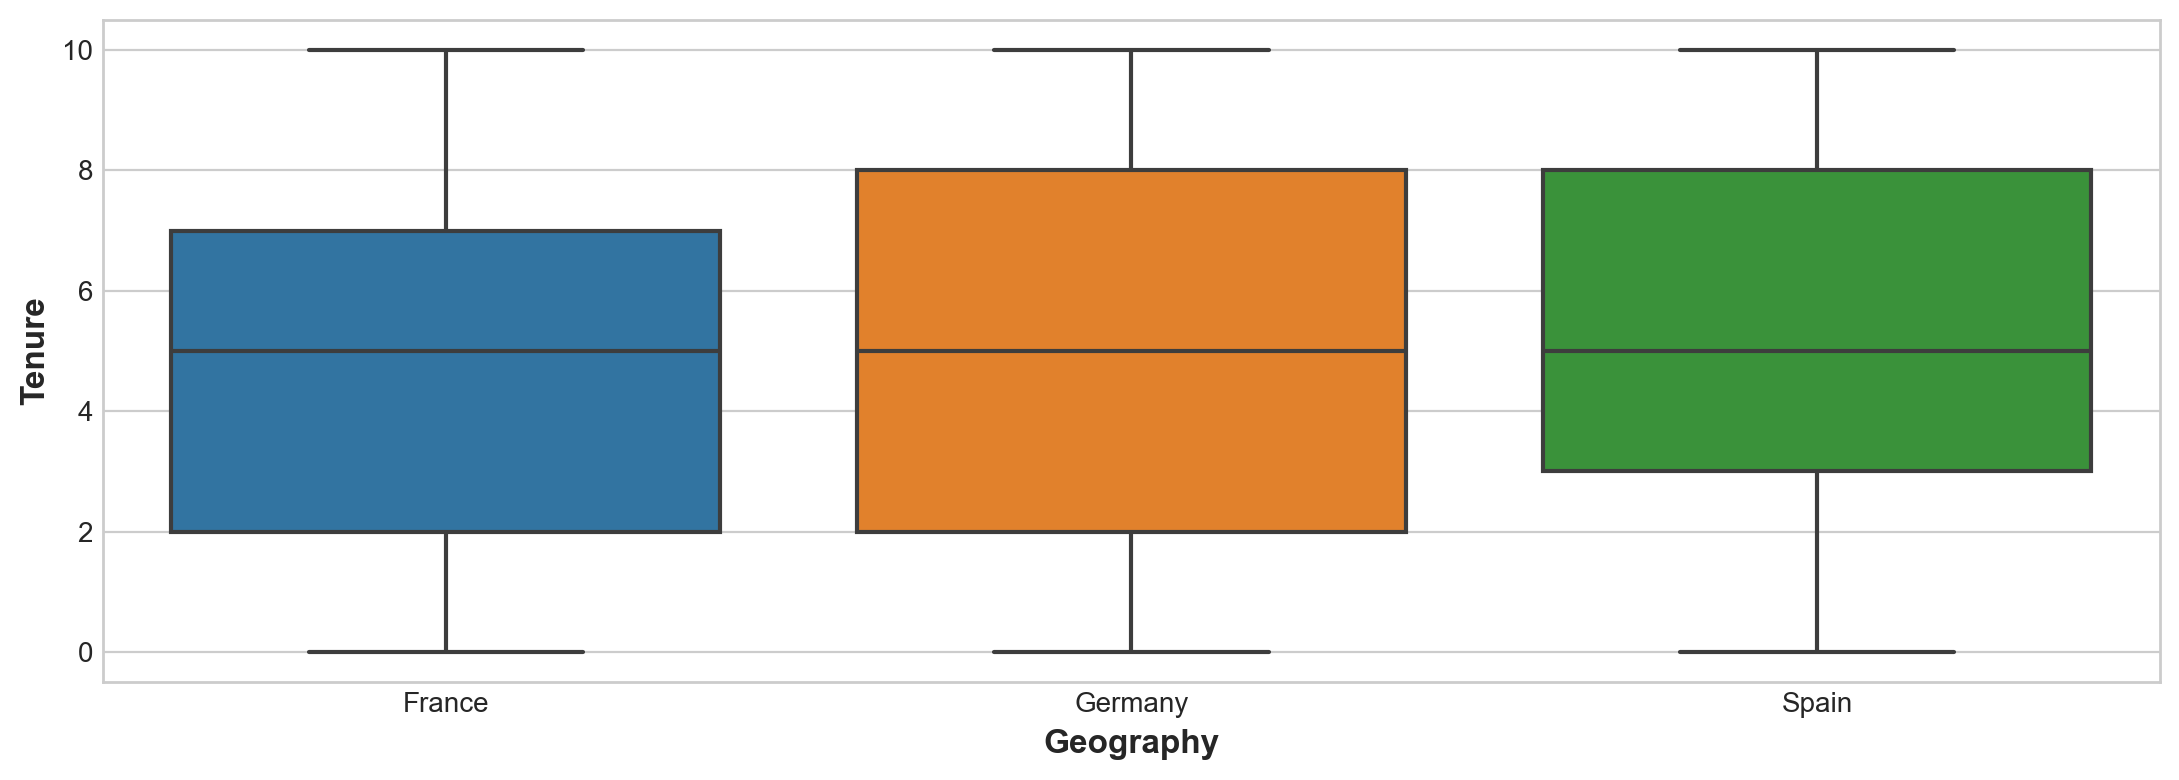

In [44]:
# Average Tenure is same across Geographies
sns.boxplot(balance_tenure, x="Geography",y="Tenure")

In [45]:
# Churn

In [46]:
balance_tenure.sort_values(by="Balance", ascending=False)[["Gender","Geography","Balance","Tenure","Exited"]]

Gender Geography    Balance  Tenure  Exited
2092    Male     Spain  250898.09       3       1
3280  Female    France  238387.56       3       1
8733    Male     Spain  222267.63       9       1
3588    Male     Spain  221532.80       3       0
6717  Female     Spain  216109.88       5       1
...      ...       ...        ...     ...     ...
2882    Male    France       0.00       3       0
8905    Male    France       0.00       3       0
4048  Female    France       0.00       7       0
7249    Male    France       0.00       7       0
6734  Female    France       0.00       0       1

[10000 rows x 5 columns]

In [47]:
# Total Churn
df_bank.groupby("Exited")["CustomerId"].count()

Exited
0    7962
1    2038
Name: CustomerId, dtype: int64

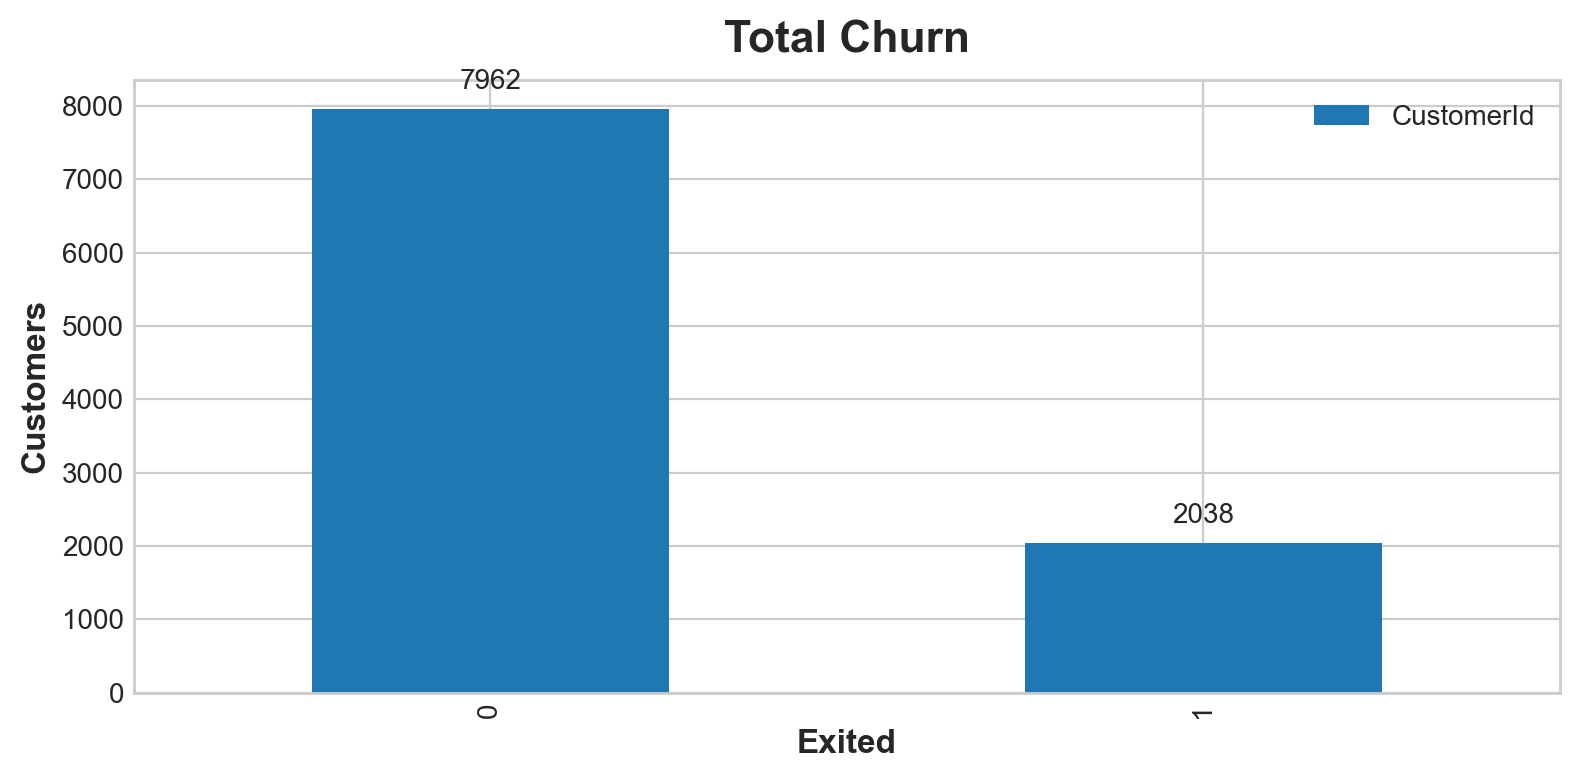

In [48]:
fig, ax = plt.subplots(figsize=(8,4))
df_bank.groupby("Exited")["CustomerId"].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("Exited")["CustomerId"].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Total Churn")
ax.legend()

In [49]:
df_bank.groupby("Exited")[["Exited","Gender"]].value_counts()

Exited  Gender
0       Male      4558
        Female    3404
1       Female    1139
        Male       899
dtype: int64

In [50]:
# df_bank.groupby(["Exited", "Gender"]).size().unstack()

[Text(0, 5, '4558'), Text(0, 5, '3404'), Text(0, 5, '1139'), Text(0, 5, '899')]

<Figure size 800x400 with 0 Axes>

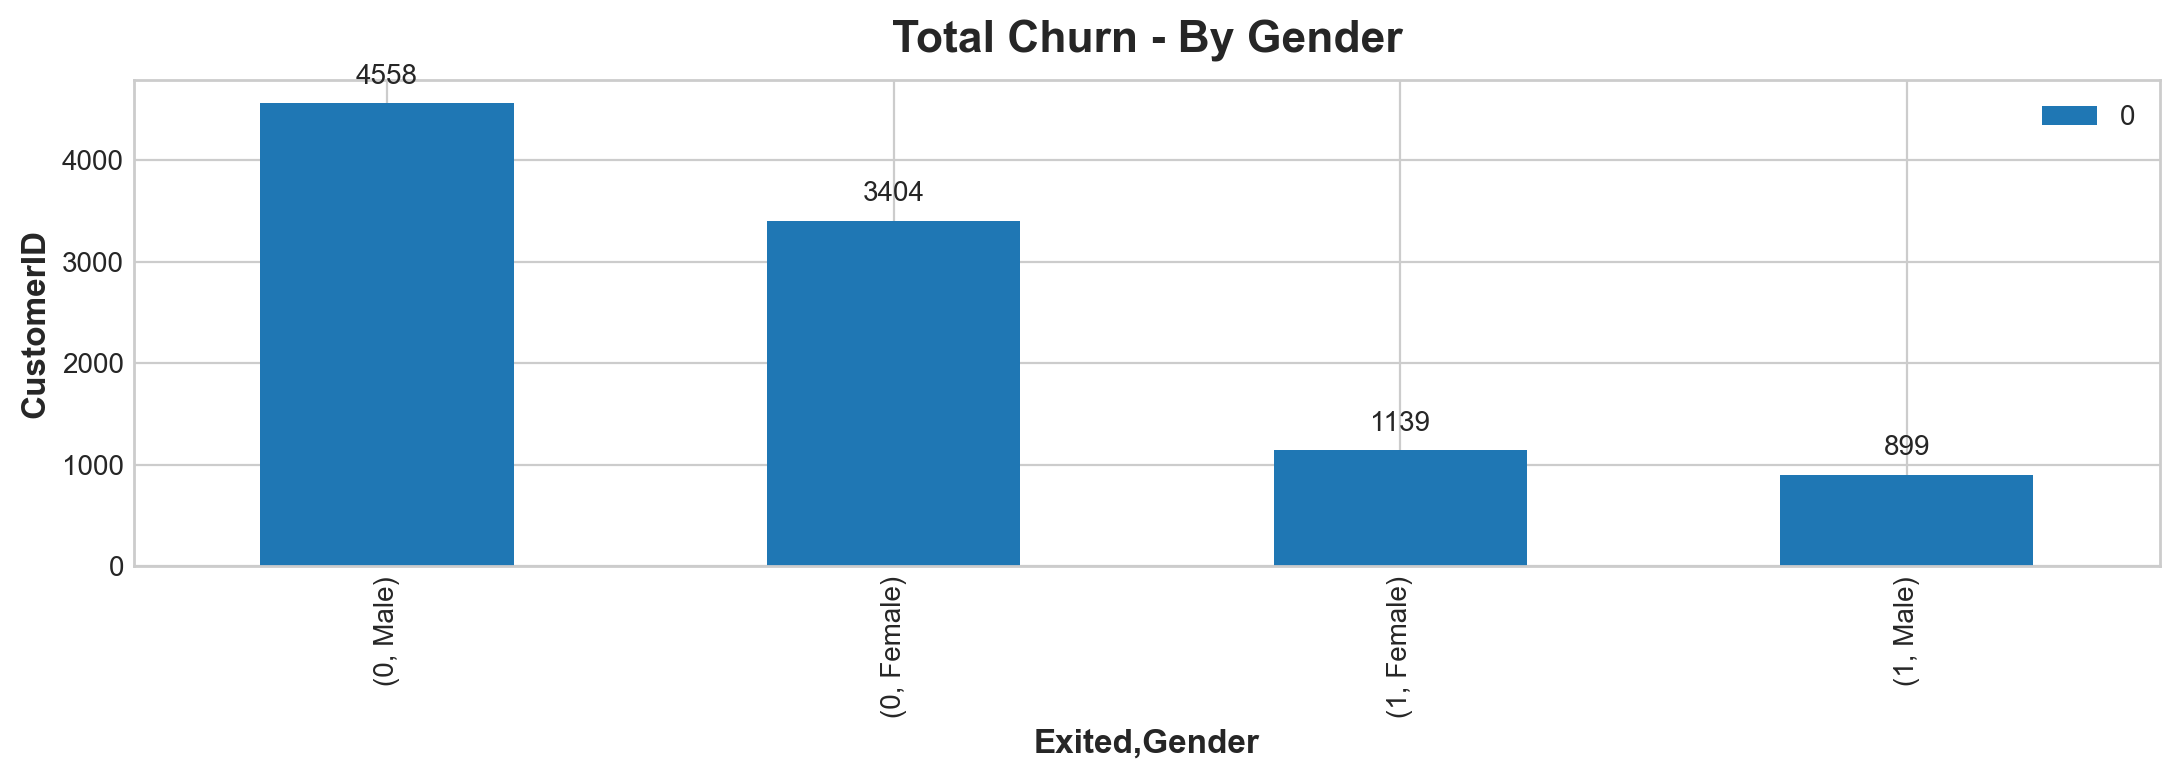

In [51]:
# Gender Churn

plt.figure(figsize=(8,4))
df_bank.groupby("Exited")[["Exited",
                           "Gender"]].value_counts().to_frame().plot(kind="bar", 
                                                                     ylabel="CustomerID", title="Total Churn - By Gender")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("Exited")[["Exited",
                           "Gender"]].value_counts(), label_type='edge', padding=5)



In [52]:
# out of the 2038 churn: Females are 1139, Males are 899

In [53]:
balance_tenure.Balance.sum()

764858892.8799999

In [54]:
# Balance for those who stayed
bal_0 = balance_tenure[balance_tenure["Exited"] ==0][["Balance"]].sum()

In [55]:
# Balance for those who Exited
bal_1 = balance_tenure[balance_tenure["Exited"] ==1][["Balance"]].sum()

In [56]:
total_b = bal_0 + bal_1
total_b

Balance    7.648589e+08
dtype: float64

In [57]:
df_bank.groupby("Exited")["Balance"].sum()


Exited
0    5.791778e+08
1    1.856811e+08
Name: Balance, dtype: float64

<Axes: xlabel='Exited', ylabel='Balance'>

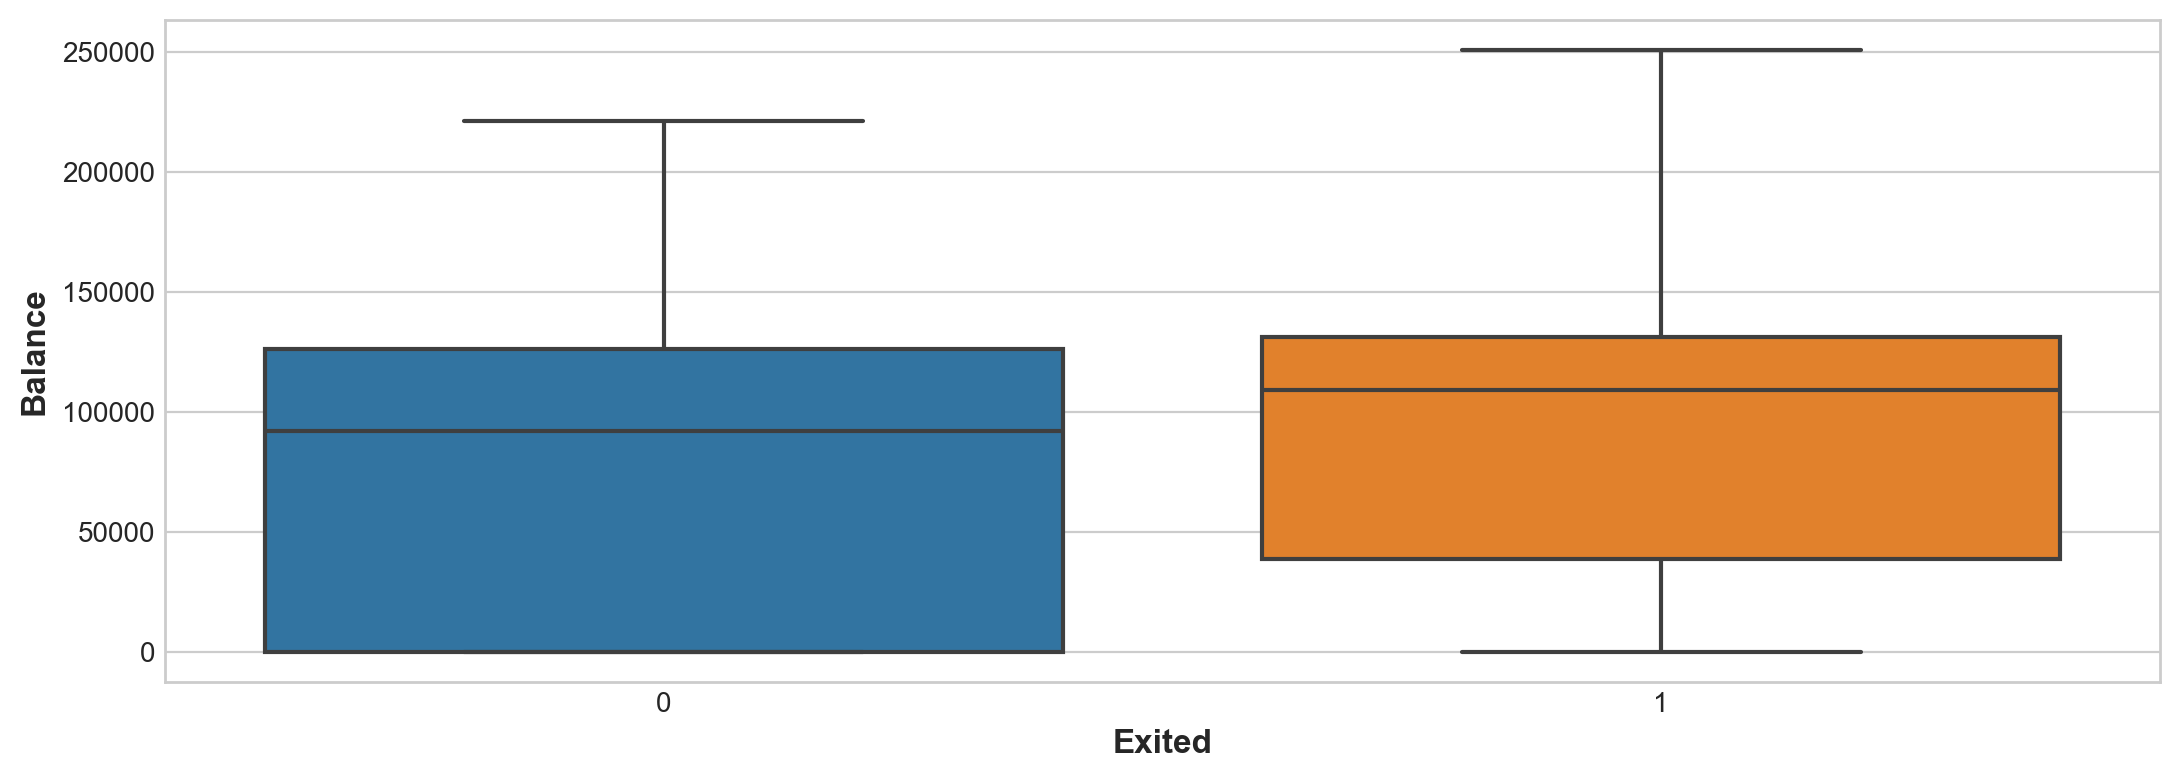

In [58]:
# The mean Balance
sns.boxplot(df_bank, x="Exited",y="Balance")

[Text(0, 5, '579177780.78'), Text(0, 5, '185681112.1')]

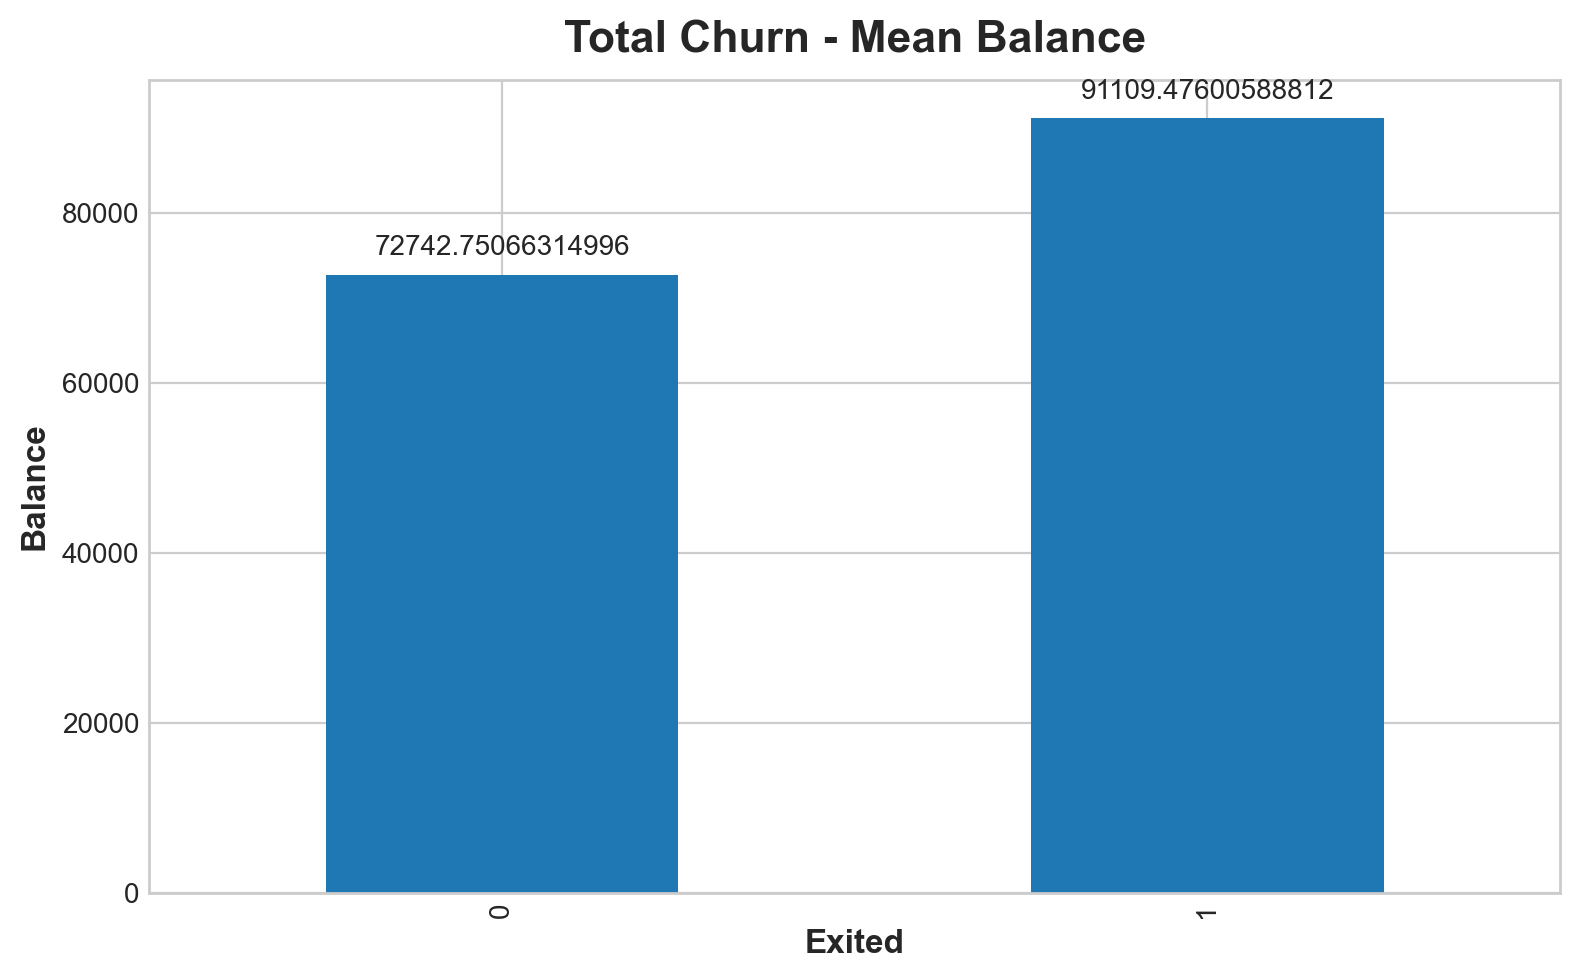

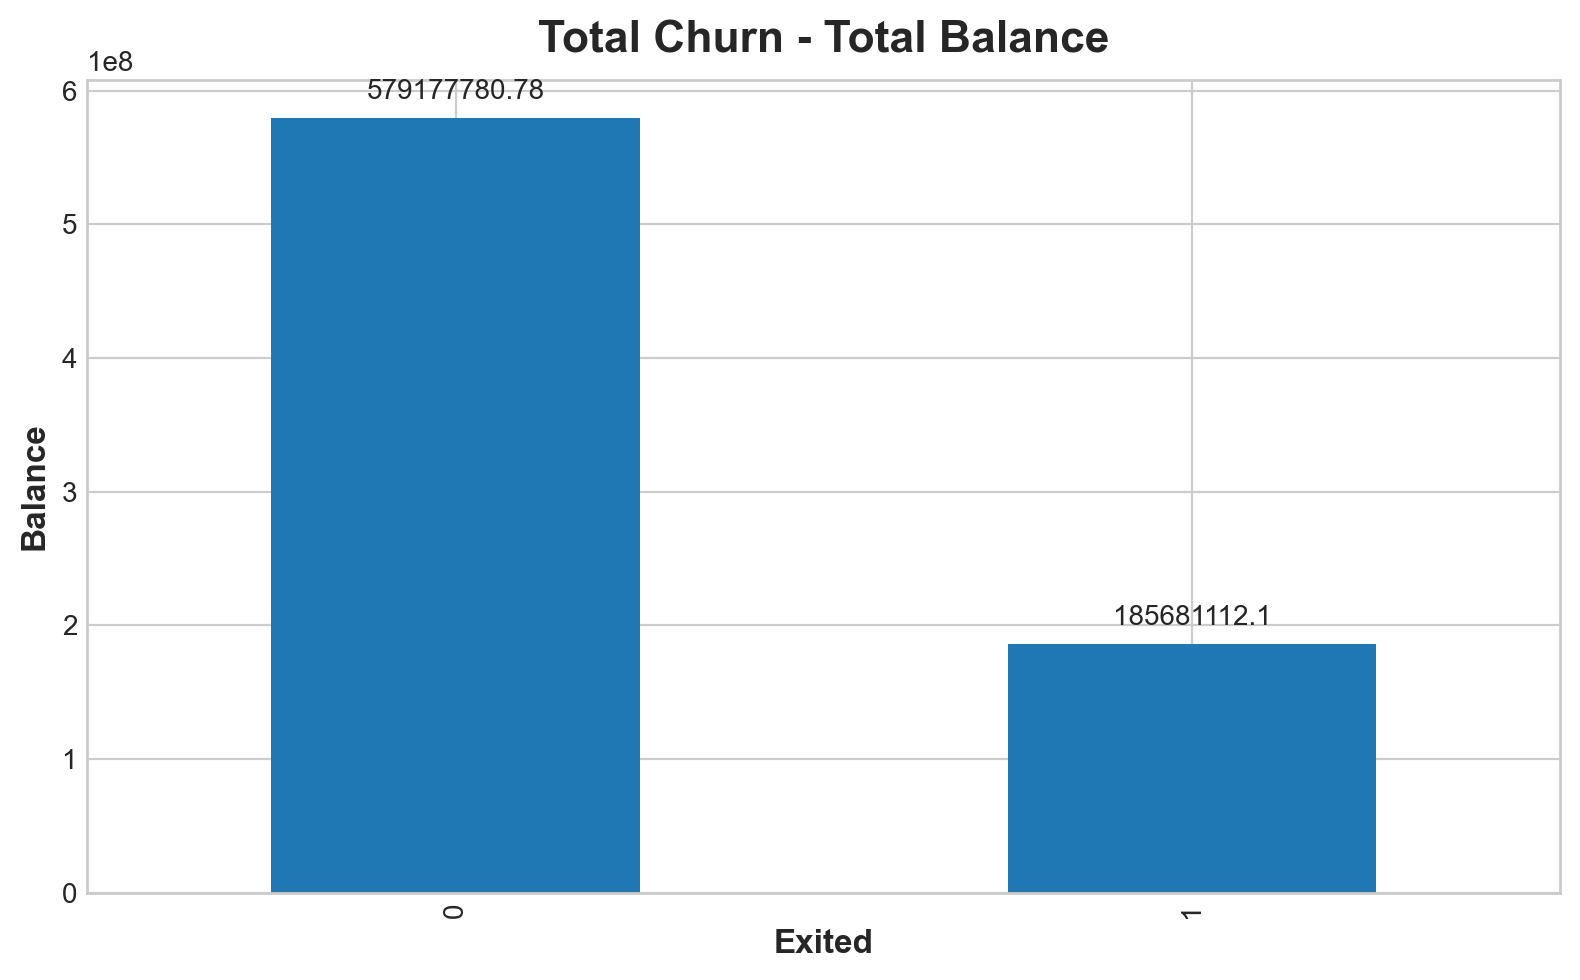

In [59]:
plt.figure(figsize=(8,5))
df_bank.groupby("Exited")["Balance"].mean().plot(kind="bar",ylabel="Balance", title="Total Churn - Mean Balance")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("Exited")["Balance"].mean(), label_type='edge', padding=5)

plt.figure(figsize=(8,5))
df_bank.groupby("Exited")["Balance"].sum().plot(kind="bar",ylabel="Balance", title="Total Churn - Total Balance")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("Exited")["Balance"].sum(), label_type='edge', padding=5)

In [60]:
# The balance for those who left constitute 24.28% of the total deposites
# The mean Balance is higher for those who left than for those who stayed: this may suggest losing some good customers as Mr Lo who has the biggest balance of $250898.09

In [61]:
# percentages of 0 & 1
bal_0/total_b * 100

Balance    75.723481
dtype: float64

In [62]:
# the Balance for those who churned is 24.28% of the total Balance
bal_1/total_b * 100

Balance    24.276519
dtype: float64

In [63]:
balance_tenure[balance_tenure["Exited"] ==0][["Balance"]].max()

Balance    221532.8
dtype: float64

In [64]:
balance_tenure.loc[balance_tenure["Exited"] ==1][["Balance"]].max()

Balance    250898.09
dtype: float64

In [65]:
df_bank.loc[df_bank["Balance"]==250898.09][['Surname','Geography','Tenure']]

Surname Geography  Tenure
2092      Lo     Spain       3

In [66]:
df_bank.groupby("Exited")["Tenure"].mean()

Exited
0    5.032781
1    4.934740
Name: Tenure, dtype: float64

In [67]:
df_bank.groupby("Exited")["Tenure"].value_counts()

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         770
        10        389
        0         318
1       1         232
        9         214
        3         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64

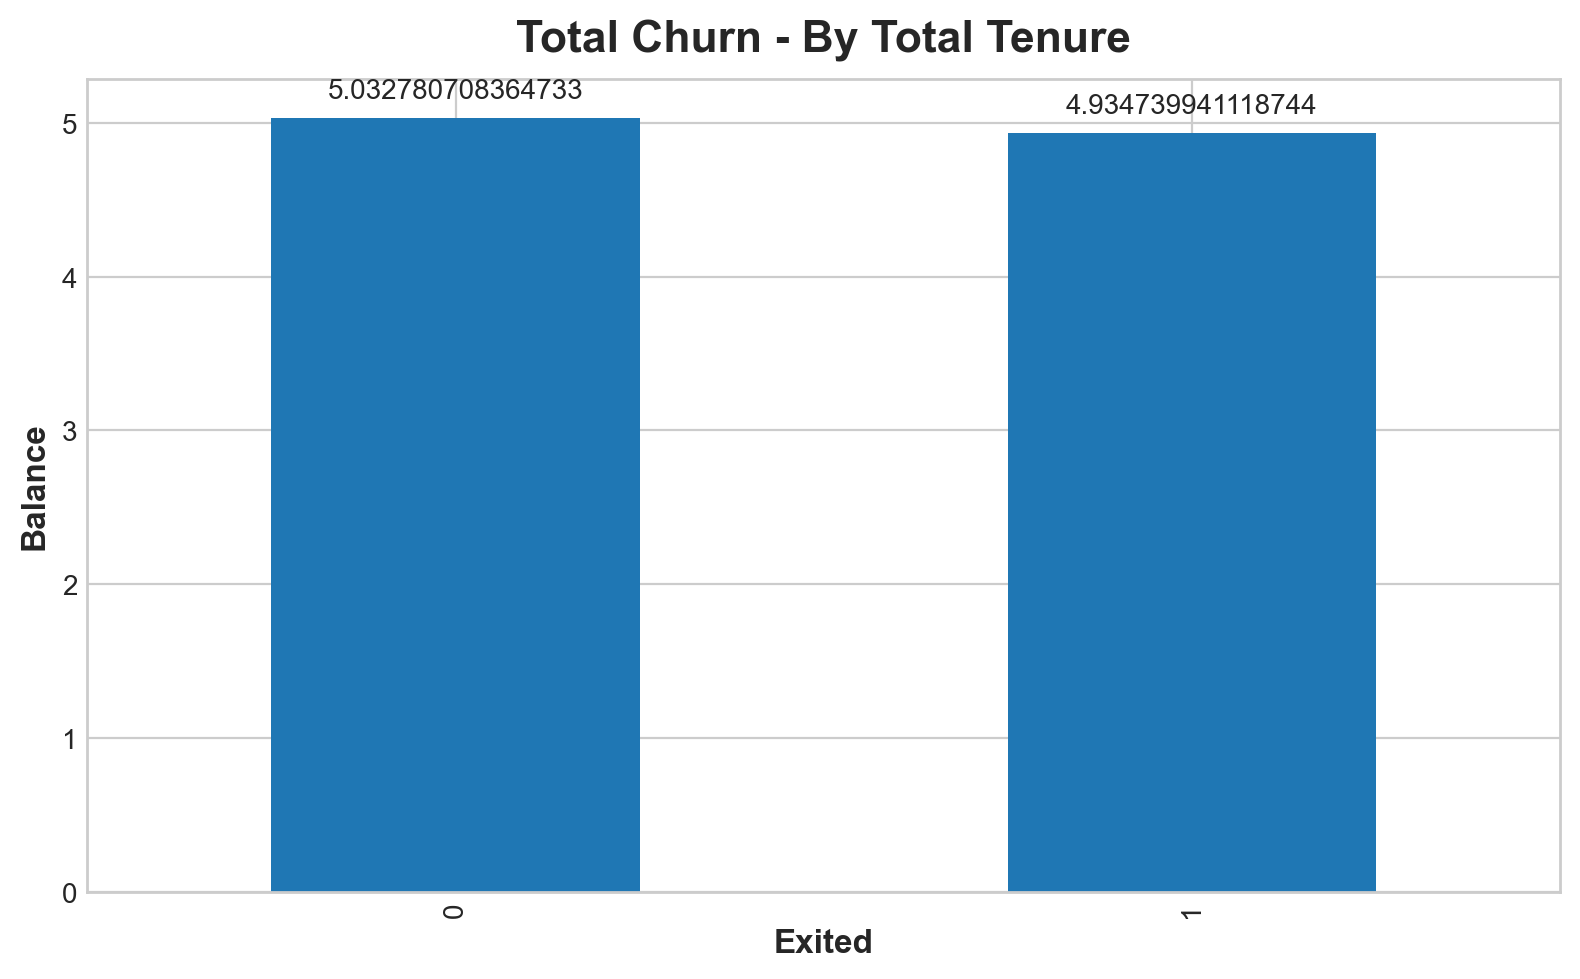

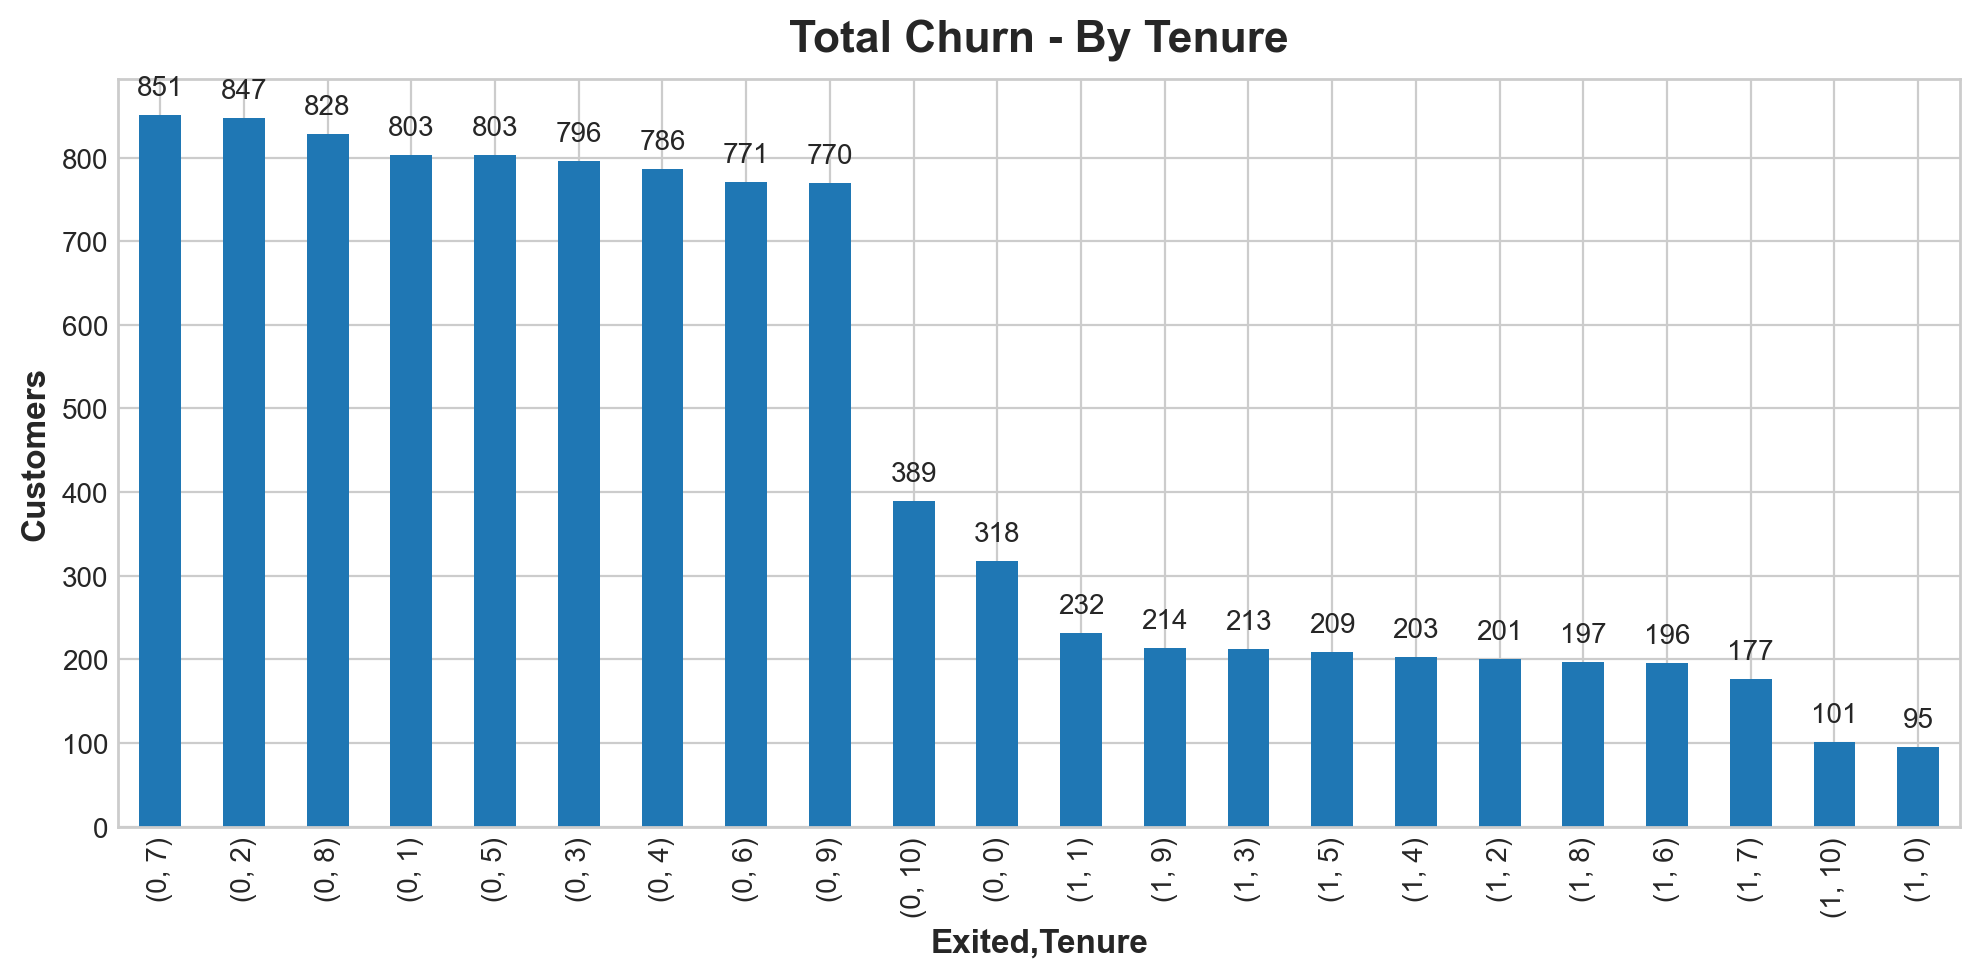

In [68]:
plt.figure(figsize=(8,5))
df_bank.groupby("Exited")["Tenure"].mean().plot(kind="bar",ylabel="Balance", title="Total Churn - By Total Tenure")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("Exited")["Tenure"].mean(), label_type='edge', padding=5)

plt.figure(figsize=(10,5))
df_bank.groupby("Exited")["Tenure"].value_counts().plot(kind="bar",ylabel="Customers", title="Total Churn - By Tenure")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("Exited")["Tenure"].value_counts(), label_type='edge', padding=5)
plt.show()

In [69]:
# the mean tenure of those who left is 5years

In [70]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_score(X, y):    
    X = X.copy()  
    # convert cat cols into int
    for colnames in X.select_dtypes(['object','category']):
        X[colnames], _ = X[colnames].factorize()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_score = mutual_info_regression(X,y, discrete_features=discrete_features, random_state=0)
    # convert to pandas series object and sort ascending order
    mi_score = pd.Series(mi_score, name='MI Scores', index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    # print(f'MI: {mi_score}')
    return mi_score

In [71]:
# X = df_bank.copy()
# y = X.pop("Exited")
# mi_score = make_mi_score(X,y)
# print(f'MI: {mi_score}')

In [72]:
# X.head()

### Balance and Tenure Analysis
+ Of the 2038 churn: Females are 1139, Males are 899
+ 3617 customers had zero balance
+ 500 zero balance customers Exited the bank: 337 from France and 163 from Spain
+ The balance for those who left constitute 24.28% of the total deposites
+ The mean Balance is higher for those who left than for those who stayed: this suggest losing high valued customers like Mr Lo from Spain who has been with the bank for 3years and has the biggest balance of $250,898.09
+ The mean tenure of those who left is 5years

In [73]:
df_bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

# Product Analysis

In [74]:
df_bank.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [75]:
df_bank[["CustomerId","NumOfProducts"]].sort_values("NumOfProducts", ascending=False)

CustomerId  NumOfProducts
2285    15783615              4
6750    15690546              4
4606    15784958              4
7729    15681007              4
1488    15625824              4
...          ...            ...
4362    15618695              1
4361    15592000              1
4359    15605425              1
4355    15593636              1
9999    15628319              1

[10000 rows x 2 columns]

<Axes: xlabel='CustomerId', ylabel='NumOfProducts'>

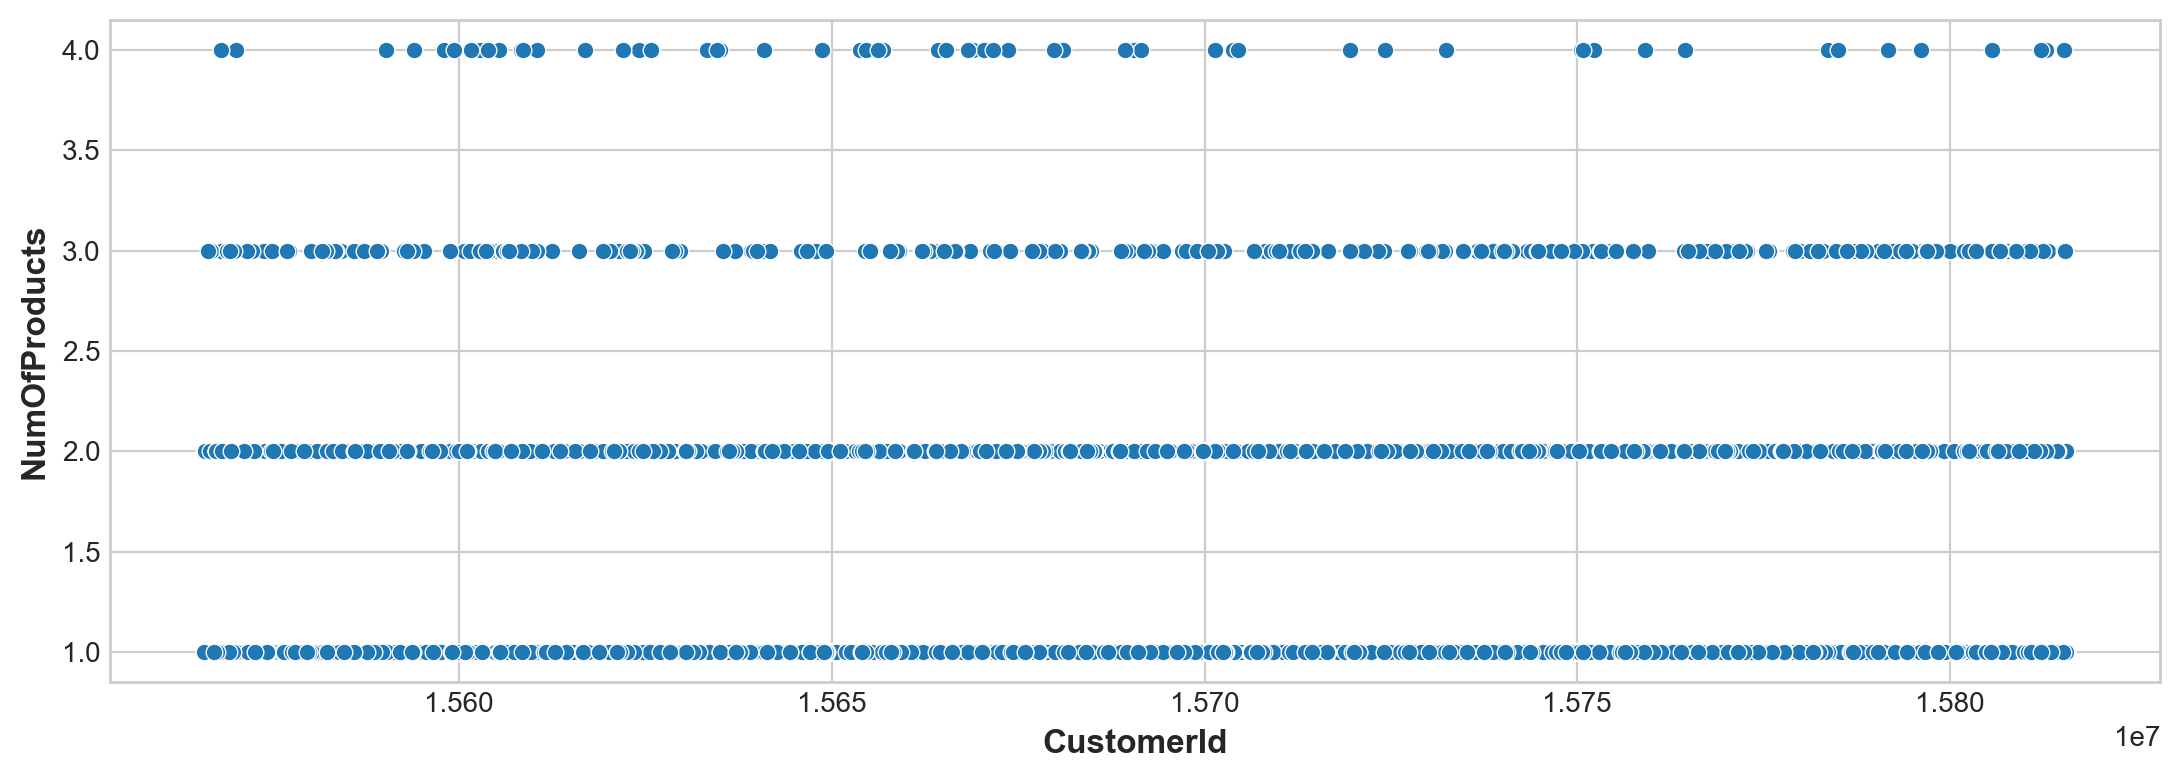

In [76]:
sns.scatterplot(df_bank[["CustomerId","NumOfProducts"]].sort_values("NumOfProducts", ascending=False), x="CustomerId",y="NumOfProducts")

In [77]:
df_bank[df_bank["NumOfProducts"]==4]["CustomerId"].count()

60

In [78]:
df_bank[df_bank["NumOfProducts"]==3]["CustomerId"].count()

266

In [79]:
df_bank[df_bank["NumOfProducts"]==2]["CustomerId"].count()

4590

In [80]:
df_bank[df_bank["NumOfProducts"]==1]["CustomerId"].count()

5084

In [81]:
df_bank.groupby("NumOfProducts")[["CustomerId"]].count()

CustomerId
NumOfProducts            
1                    5084
2                    4590
3                     266
4                      60

In [82]:
# The average number of Products per customer is 2
df_bank["NumOfProducts"].mean()

1.5302

In [83]:
df_bank.groupby("NumOfProducts")[["NumOfProducts","Exited"]].value_counts()

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4241
               1          349
3              1          220
               0           46
4              1           60
dtype: int64

<Figure size 1000x500 with 0 Axes>

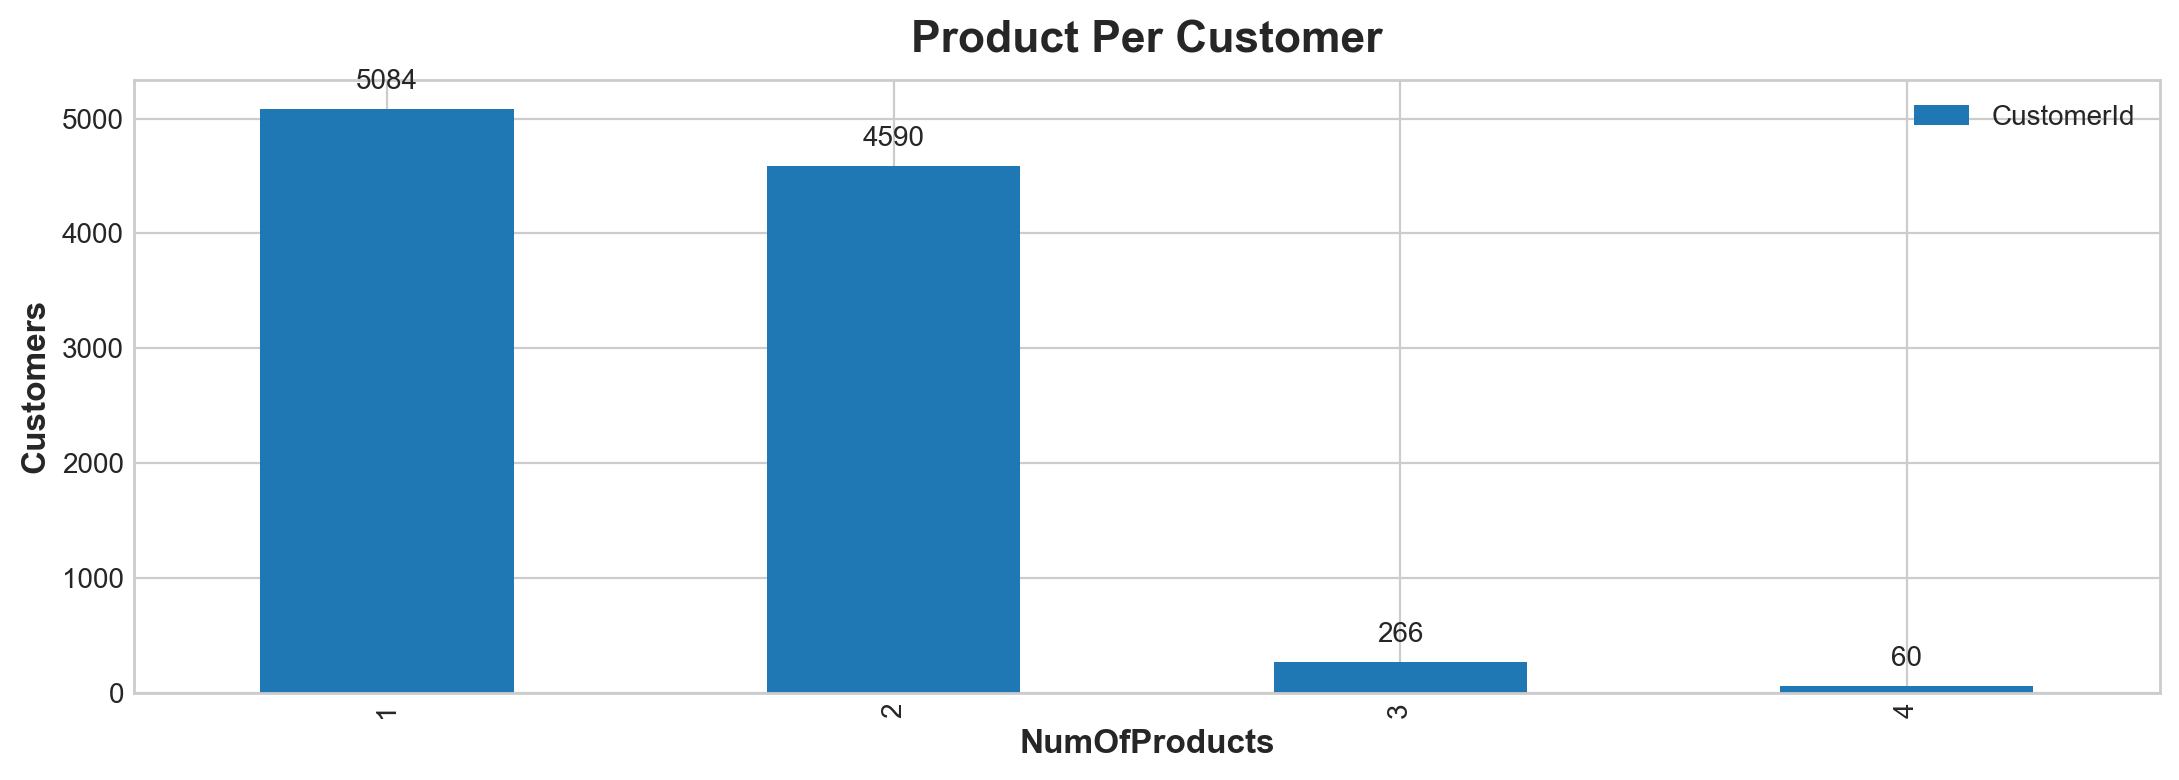

In [139]:
plt.figure(figsize=(10,5))
df_bank.groupby("NumOfProducts")[["CustomerId"]].count().plot(kind="bar", ylabel="Customers", title="Product Per Customer")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("NumOfProducts")["CustomerId"].count(), label_type='edge', padding=5)
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
df_bank.groupby("NumOfProducts")[["NumOfProducts","Exited"]].value_counts().plot(color="red")
df_bank.groupby("NumOfProducts")[["NumOfProducts","Exited"]].value_counts().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("NumOfProducts")["NumOfProducts","Exited"].value_counts(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Relationship between Number of Products and Churn")
plt.show()

+ The average number of Products per customer is 2
+ The number of products a customer subscribes shows a strong relationship with customers who Exited the bank.
+ It is possible products do not meet the needs of customers

### Distribution of Products (Card Type) and their Associated Earnings

In [85]:
df_bank["Card Type"].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [86]:
df_bank.groupby("Card Type")["Point Earned"].count()

Card Type
DIAMOND     2507
GOLD        2502
PLATINUM    2495
SILVER      2496
Name: Point Earned, dtype: int64

In [87]:
df_bank.groupby(["Card Type","Exited"])["Point Earned"].count()

Card Type  Exited
DIAMOND    0         1961
           1          546
GOLD       0         2020
           1          482
PLATINUM   0         1987
           1          508
SILVER     0         1994
           1          502
Name: Point Earned, dtype: int64

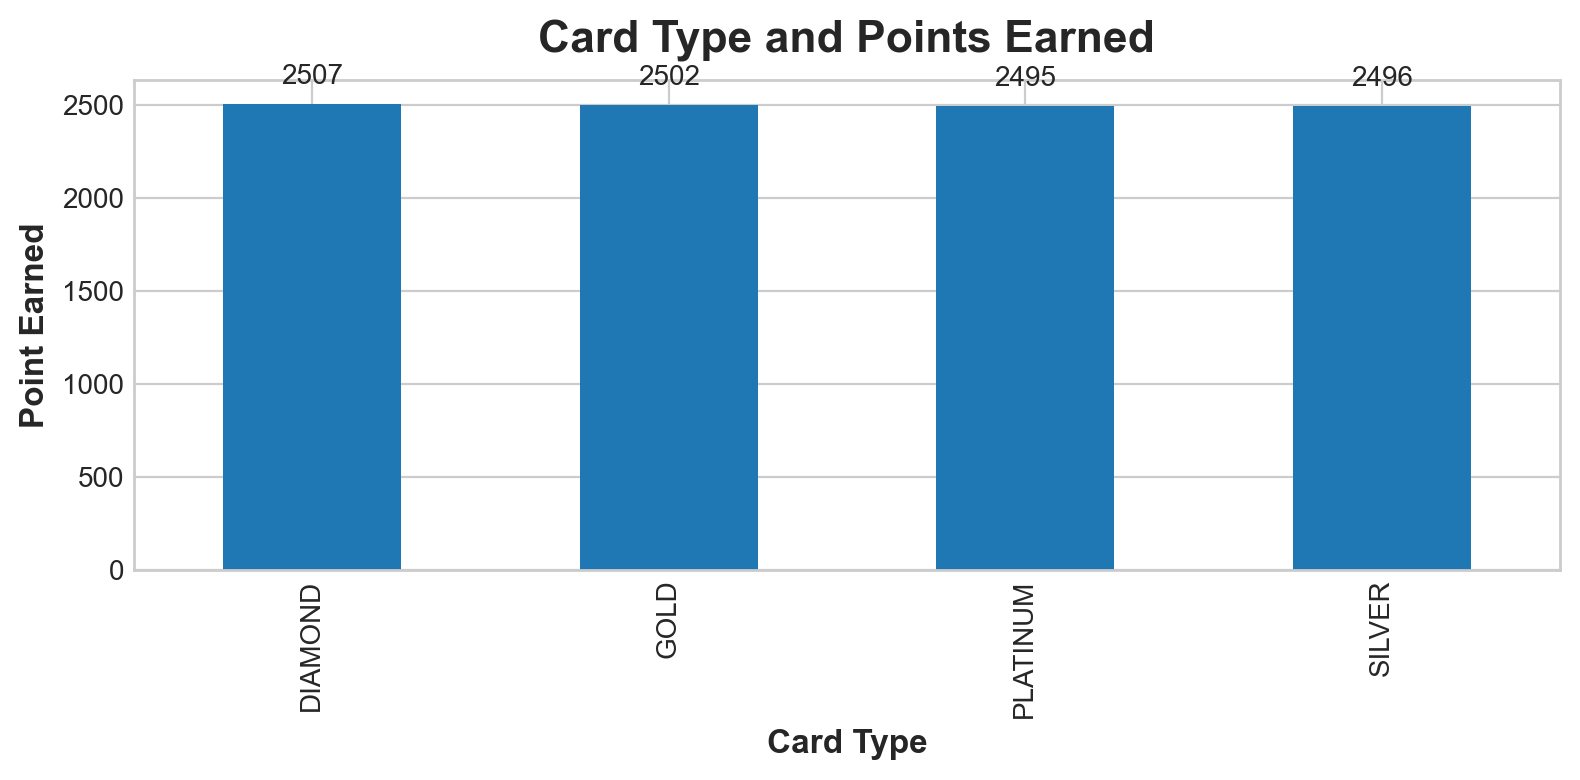

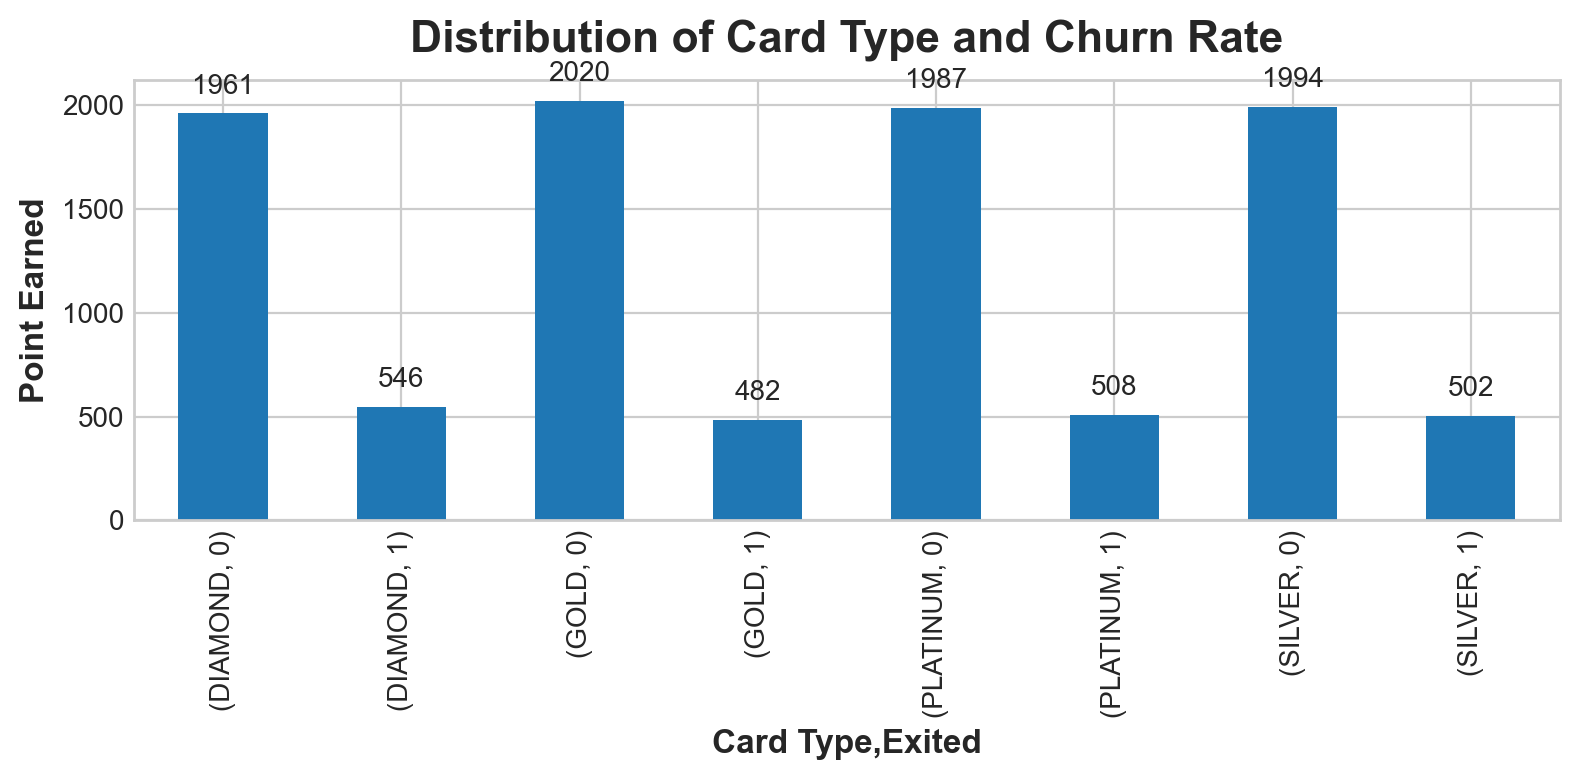

In [88]:
fig, ax = plt.subplots(figsize=(8,4))
df_bank.groupby("Card Type")["Point Earned"].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby("Card Type")["Point Earned"].count(), label_type='edge', padding=5)
ax.set_ylabel("Point Earned")
ax.set_title("Card Type and Points Earned")

fig, ax = plt.subplots(figsize=(8,4))
df_bank.groupby(["Card Type","Exited"])["Point Earned"].count().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(["Card Type","Exited"])["Point Earned"].count(), label_type='edge', padding=5)
ax.set_ylabel("Point Earned")
ax.set_title("Distribution of Card Type and Churn Rate")

plt.show()

### Product Analysis Report
+ The average number of Products per customer is 2
+ The number of products a customer subscribes shows a strong evidence why customers Exited the bank
+ It is possible products do not meet the needs of customers
+ For any card, Customers who Exited the bank had accumulated lower point than the countapart who stayed.

In [89]:
df_bank.groupby("Exited")[["Point Earned"]].sum()

Point Earned
Exited              
0            4833285
1            1231866

In [90]:
df_bank[df_bank["Card Type"]=="DIAMOND"][["Card Type",
                                          "Point Earned",
                                          "Exited"]].groupby(["Exited"])["Point Earned"].value_counts()

Exited  Point Earned
0       411             9
        520             8
        723             8
        231             7
        359             7
                       ..
1       991             1
        994             1
        995             1
        999             1
        1000            1
Name: Point Earned, Length: 1103, dtype: int64

In [91]:
df_bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

# Customer Behavior Analysis

In [92]:
df_bank["IsActiveMember"].unique()

array([1, 0], dtype=int64)

In [93]:
df_bank["HasCrCard"].unique()

array([1, 0], dtype=int64)

In [94]:
df_bank[df_bank["IsActiveMember"]==0].count()

RowNumber             4849
CustomerId            4849
Surname               4849
CreditScore           4849
Geography             4849
Gender                4849
Age                   4849
Tenure                4849
Balance               4849
NumOfProducts         4849
HasCrCard             4849
IsActiveMember        4849
EstimatedSalary       4849
Exited                4849
Complain              4849
Satisfaction Score    4849
Card Type             4849
Point Earned          4849
dtype: int64

In [95]:
df_bank.groupby(["IsActiveMember","HasCrCard"])[["HasCrCard"]].count()

HasCrCard
IsActiveMember HasCrCard           
0              0               1401
               1               3448
1              0               1544
               1               3607

In [96]:
1401+3448

4849

In [97]:
df_bank.groupby(["HasCrCard"])["Age"].mean()

HasCrCard
0    39.112054
1    38.842381
Name: Age, dtype: float64

In [98]:
df_bank[df_bank["IsActiveMember"]==0][["IsActiveMember",
                                       "HasCrCard"]].groupby(["IsActiveMember","HasCrCard"])[["HasCrCard"]].count()

HasCrCard
IsActiveMember HasCrCard           
0              0               1401
               1               3448

In [99]:
df_bank[df_bank["IsActiveMember"]==1][["IsActiveMember",
                                       "HasCrCard"]].groupby(["IsActiveMember","HasCrCard"])[["HasCrCard"]].count()

HasCrCard
IsActiveMember HasCrCard           
1              0               1544
               1               3607

In [100]:
# Dormant and churned
df_bank.groupby(["IsActiveMember","HasCrCard","Exited"])[["Exited"]].count()

Exited
IsActiveMember HasCrCard Exited        
0              0         0         1041
                         1          360
               1         0         2505
                         1          943
1              0         0         1291
                         1          253
               1         0         3125
                         1          482

<Figure size 1000x500 with 0 Axes>

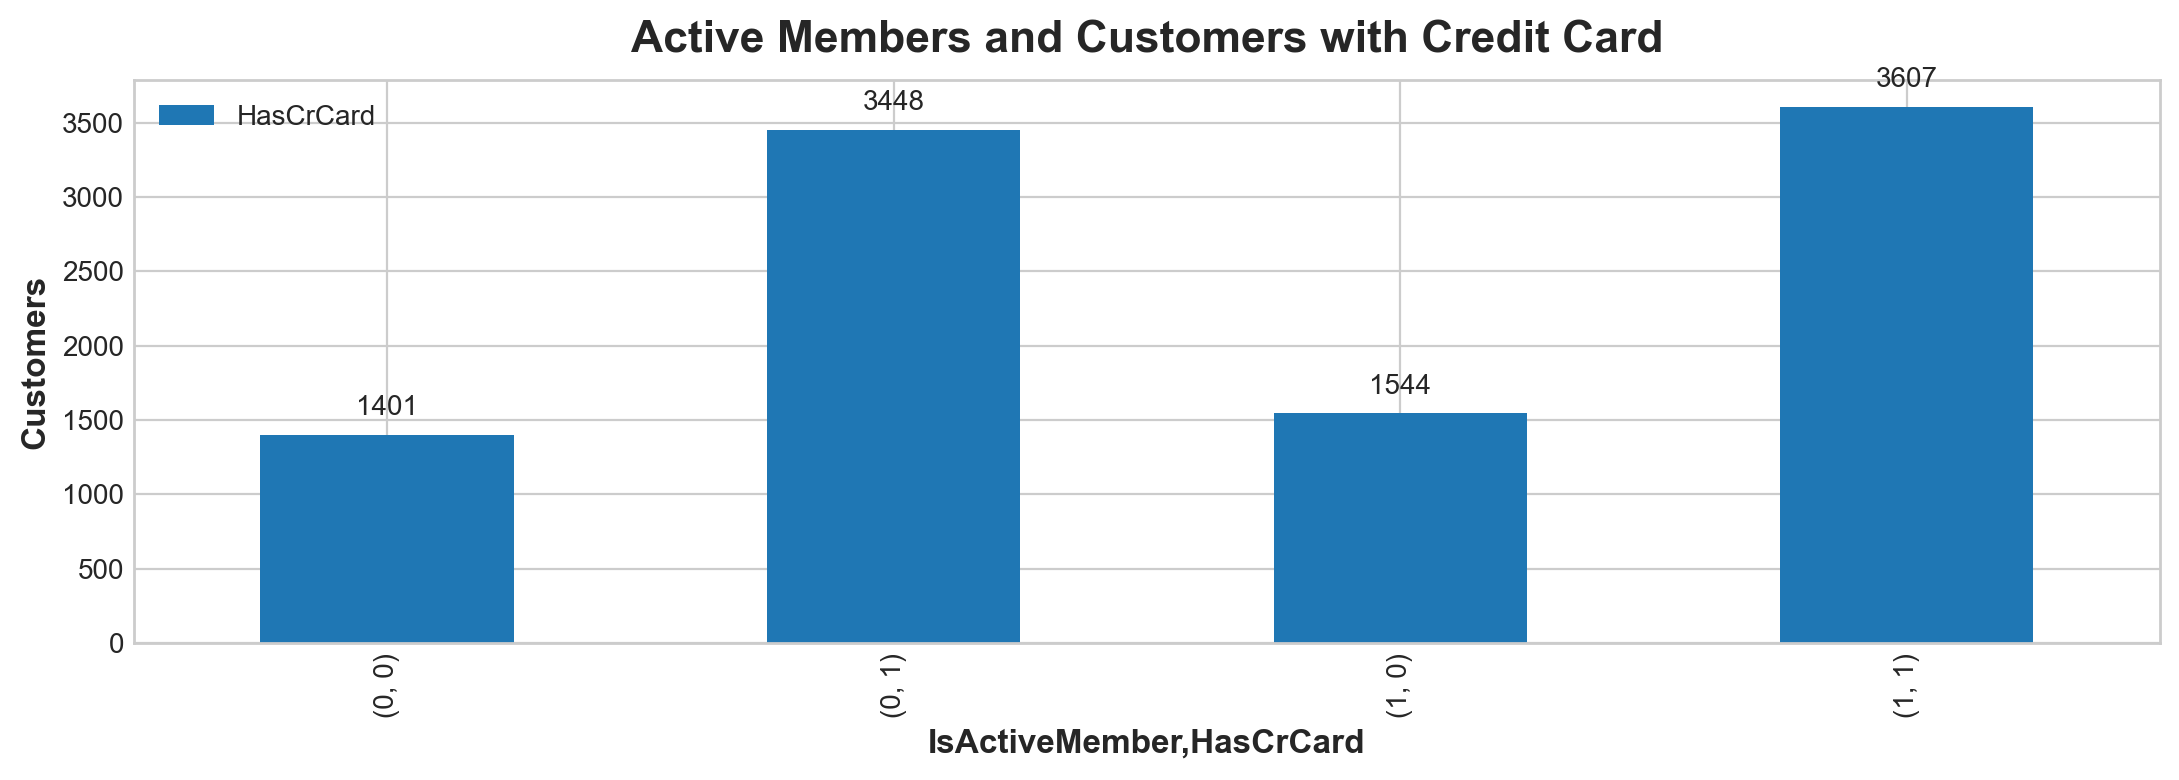

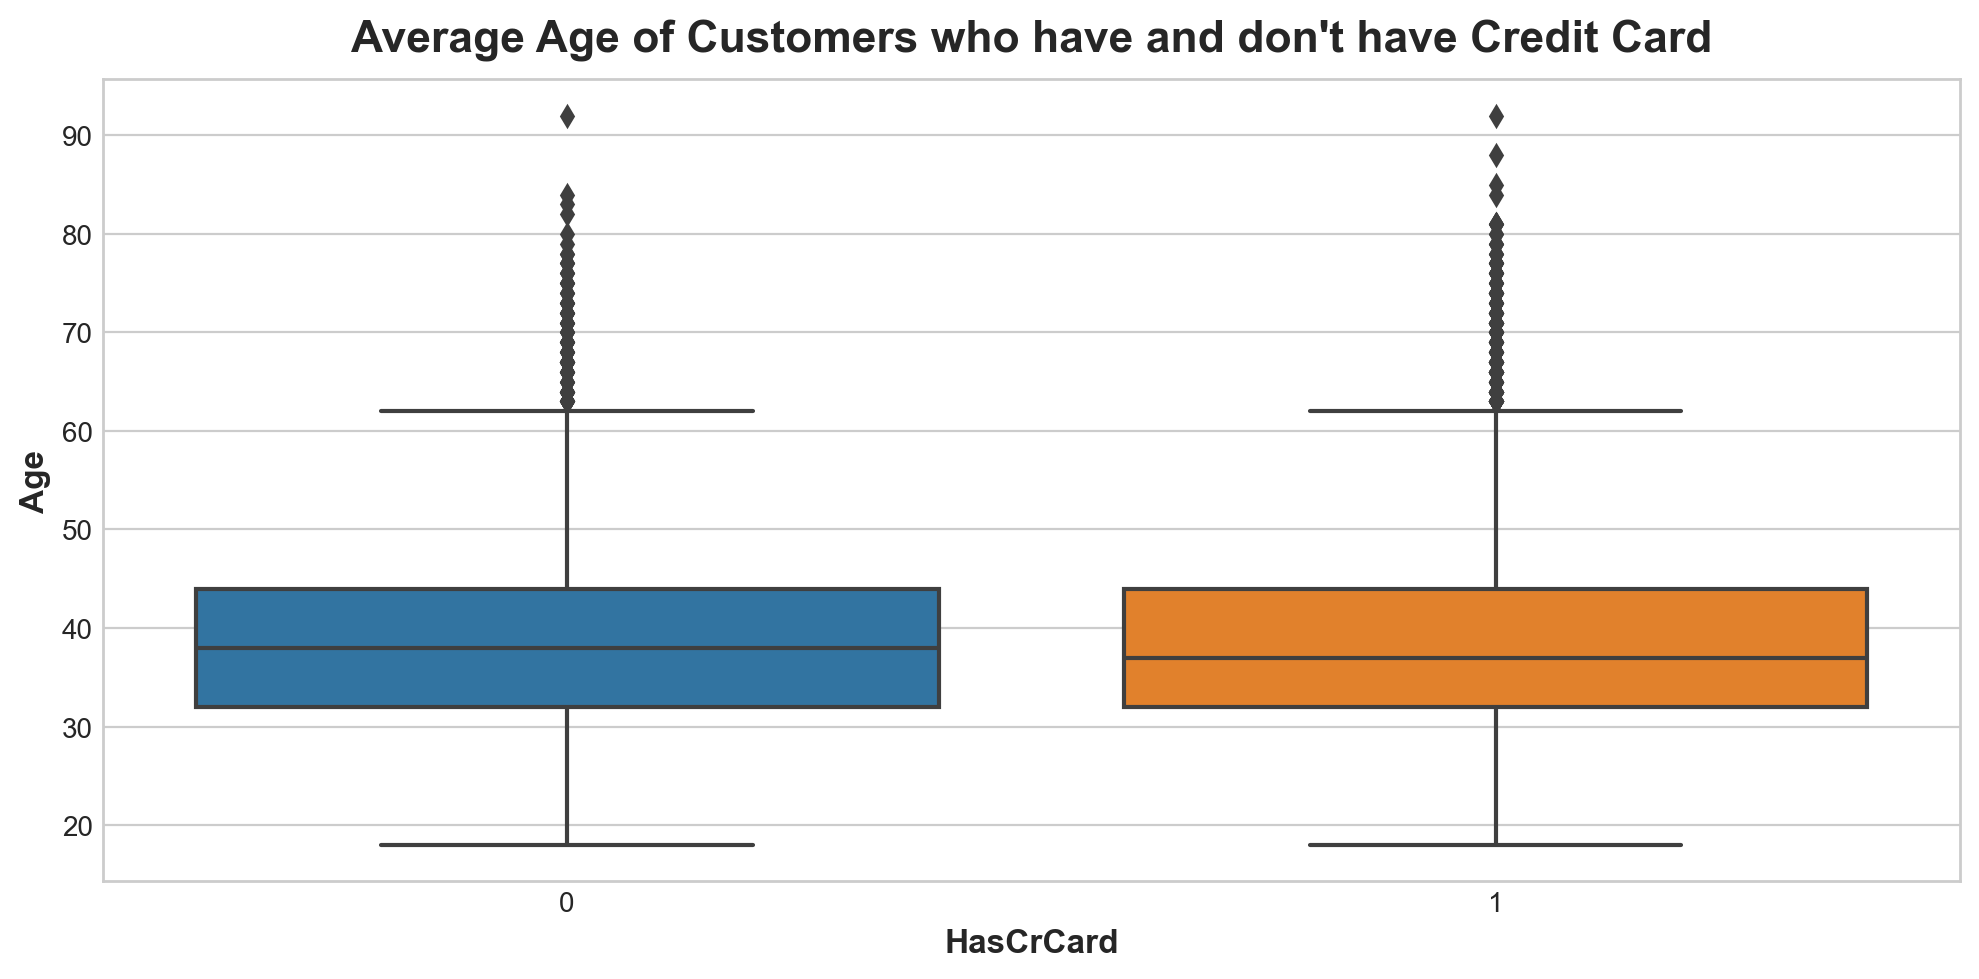

<Figure size 1000x500 with 0 Axes>

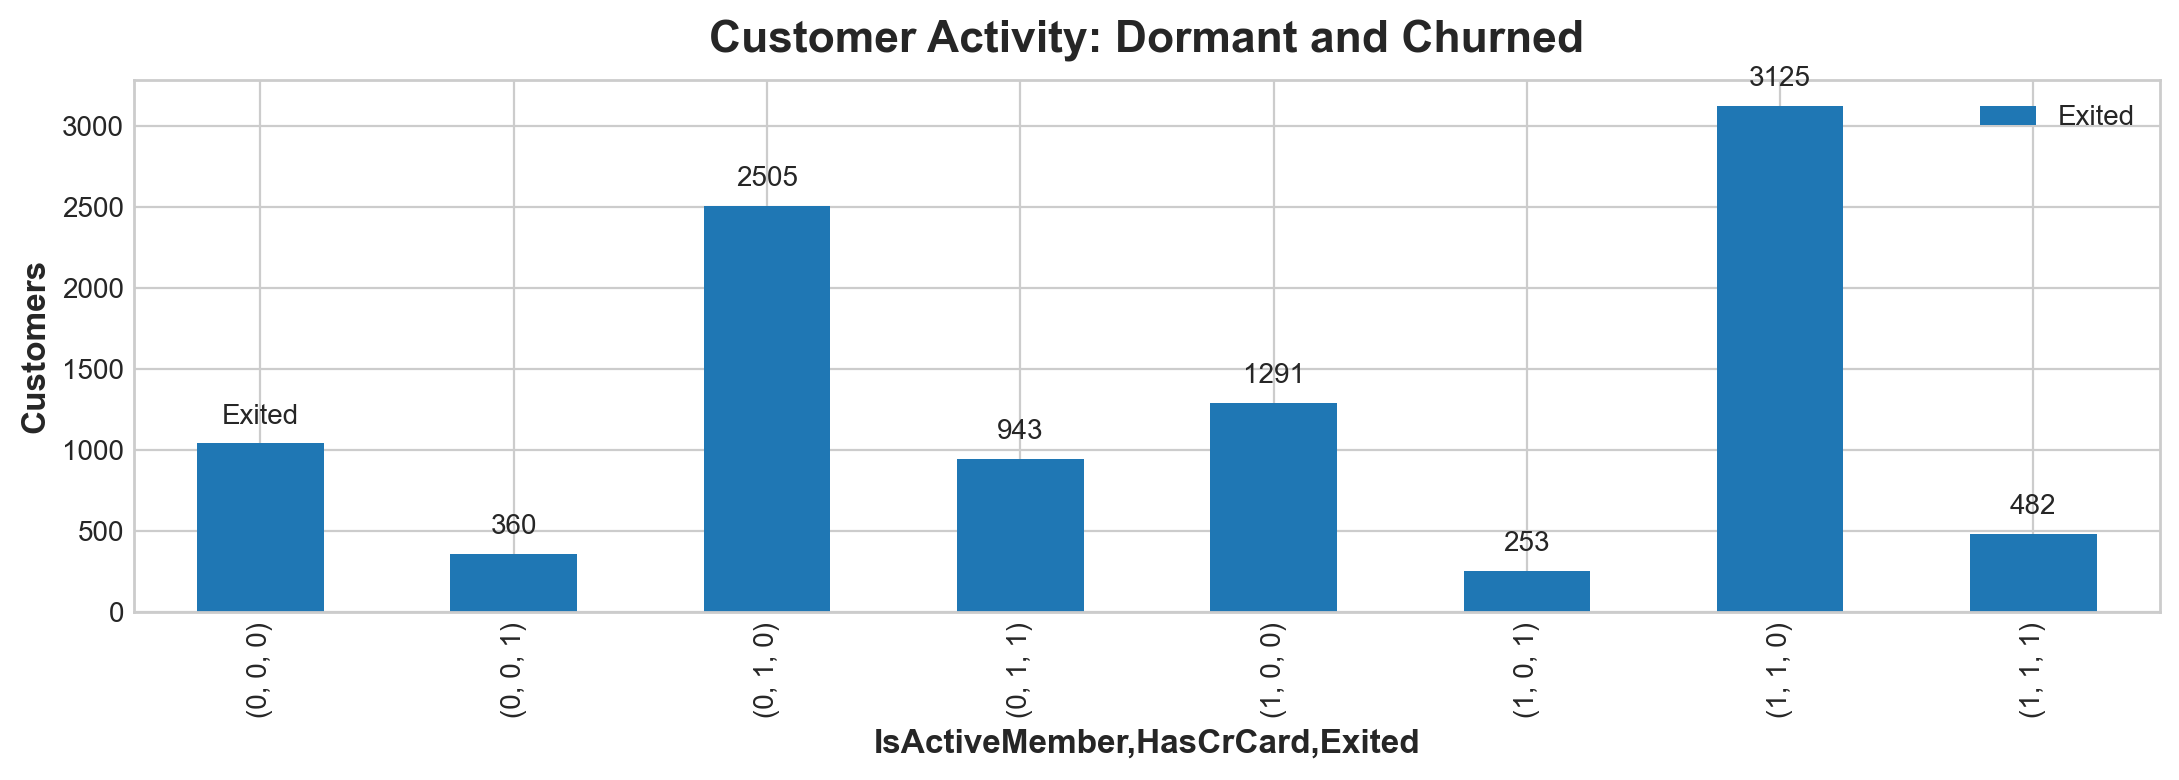

In [101]:
plt.figure(figsize=(10,5))
df_bank.groupby(["IsActiveMember","HasCrCard"])[["HasCrCard"]].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(["IsActiveMember","HasCrCard"])["HasCrCard"].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Active Members and Customers with Credit Card")

plt.figure(figsize=(10,5))
sns.boxplot(df_bank[["HasCrCard","Age"]], x='HasCrCard',y='Age')
ax = plt.gca()
ax.set_title("Average Age of Customers who have and don't have Credit Card")

plt.figure(figsize=(10,5))
df_bank.groupby(["IsActiveMember","HasCrCard","Exited"])[["Exited"]].count().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(["IsActiveMember","HasCrCard","Exited"])[["Exited"]].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Customer Activity: Dormant and Churned")

plt.show()

### Some customers of the bank are
+ not active, don't have card, and havent left: Still with the bank
+ not active, don't have card and have left: actually left the bank
+ not active, have card and haven't left: Still with the bank
+ not active, have card and have left: actually left the bank
### There are also
+ active, don't have card and haven't left: Still with the bank
+ active, don't have card and have left: actually left the bank
+ active, have card and havn't left: Still with the bank
+ active, have card and have left: actually left the bank
### The question remains, why are customers with cards still leaving the bank?

In [102]:
# have card and left
# don't have card and left

In [103]:
df_bank.groupby(["HasCrCard","Exited"])["Exited"].count()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5630
           1         1425
Name: Exited, dtype: int64

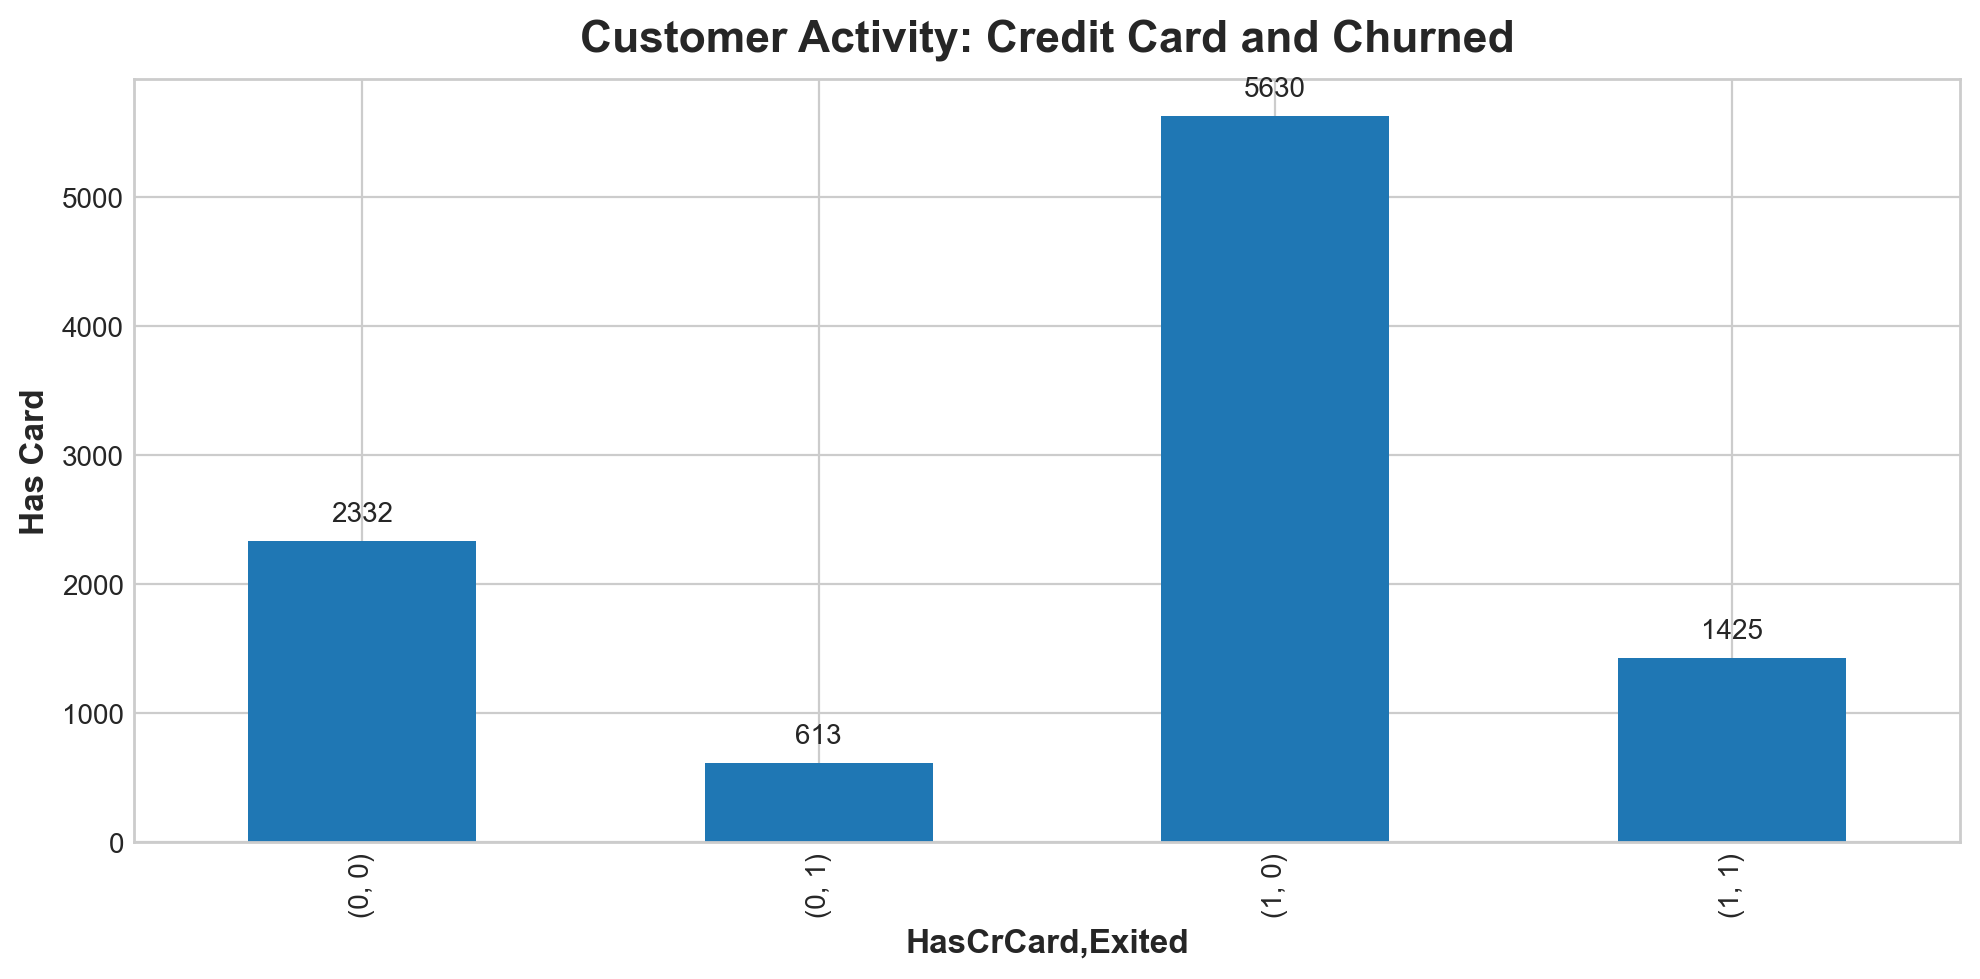

In [104]:
plt.figure(figsize=(10,5))
df_bank.groupby(["HasCrCard","Exited"])["Exited"].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(["HasCrCard","Exited"])["Exited"].count(), label_type='edge', padding=5)
ax.set_ylabel("Has Card")
ax.set_title("Customer Activity: Credit Card and Churned")

plt.show()

In [105]:
# have card
5630 + 1425

7055

In [106]:
# 20% totalling 1425 of those who have card have left
1425/7055

0.20198440822111977

In [107]:
# don't have Card
2332 + 613

2945

In [108]:
# 26% totalling 613 of those who don't have card have left
613/2332

0.26286449399656947

In [109]:

1425 + 613

2038

In [110]:
# Put together, 20.38% have left the bank
2038/10000

0.2038

## Why do we have more Card holders Exiting the bank than non card holders?
+ 20% totalling 1425 of the 7055 who have card have left
+ 26% totalling 613 of the 2332 who don't have card have left

## Lets Analyse Satisfaction Score for the Customers

In [111]:
df_bank['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [112]:
df_bank.groupby('Satisfaction Score')[['CustomerId']].count()

CustomerId
Satisfaction Score            
1                         1932
2                         2014
3                         2042
4                         2008
5                         2004

In [113]:
df_bank.groupby(['Satisfaction Score','Exited'])[['CustomerId']].count()

CustomerId
Satisfaction Score Exited            
1                  0             1545
                   1              387
2                  0             1575
                   1              439
3                  0             1641
                   1              401
4                  0             1594
                   1              414
5                  0             1607
                   1              397

<Figure size 1000x500 with 0 Axes>

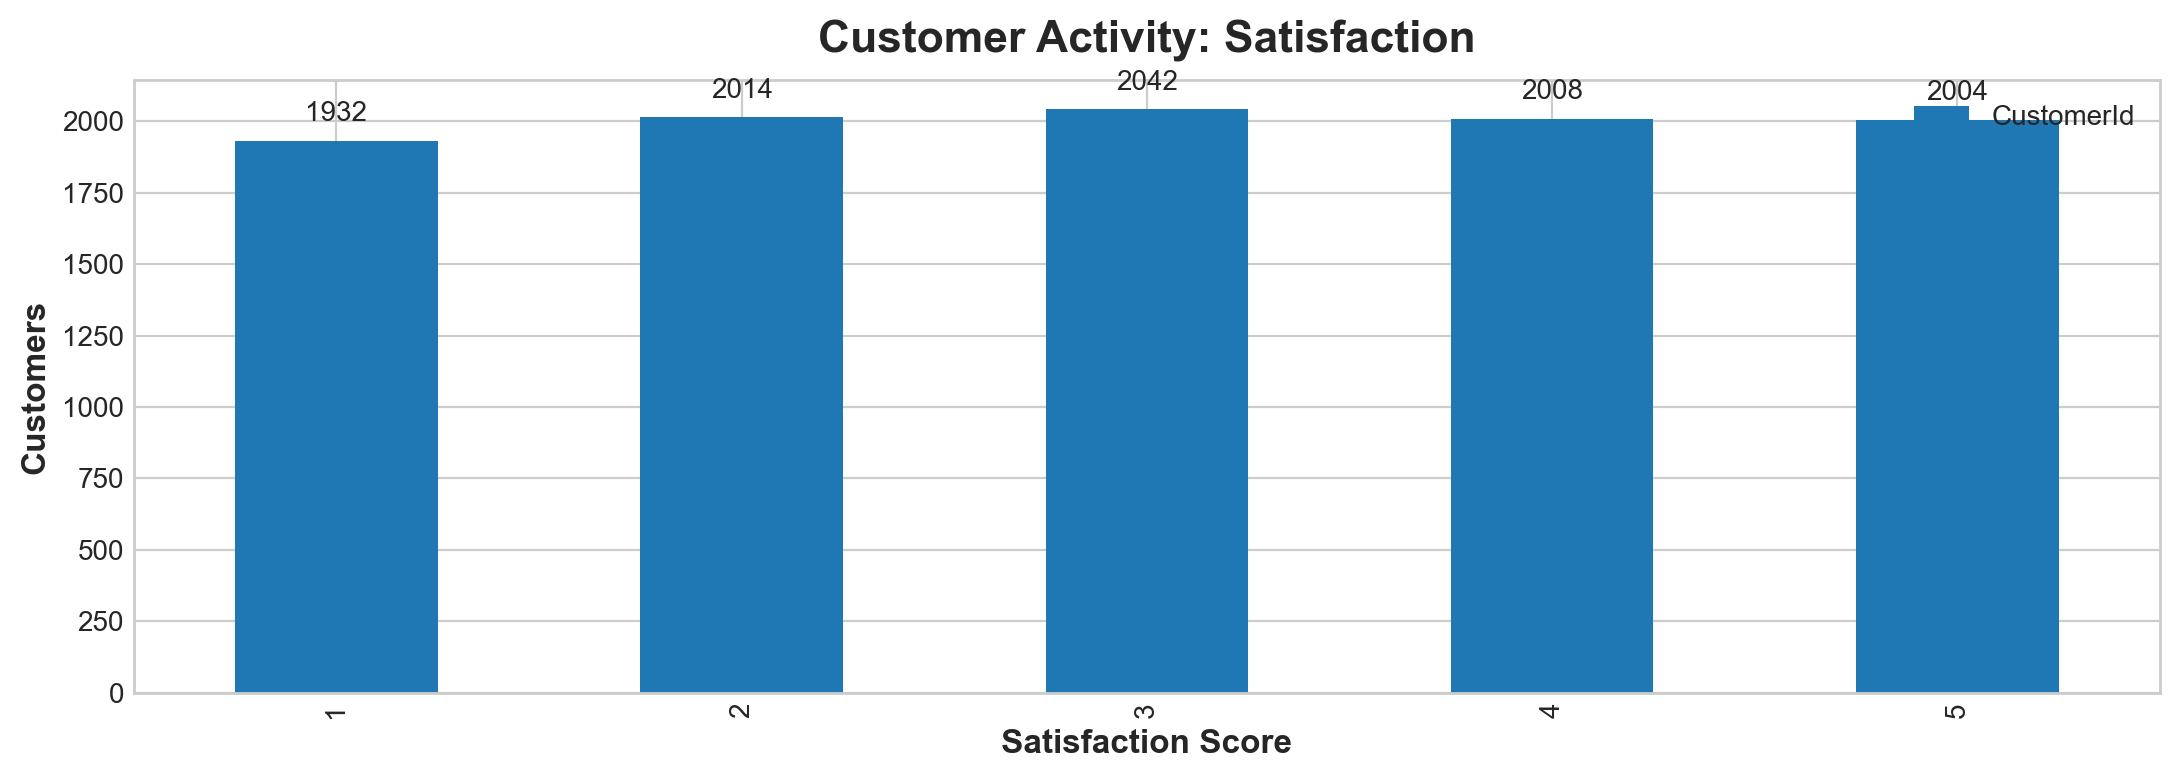

<Figure size 1000x500 with 0 Axes>

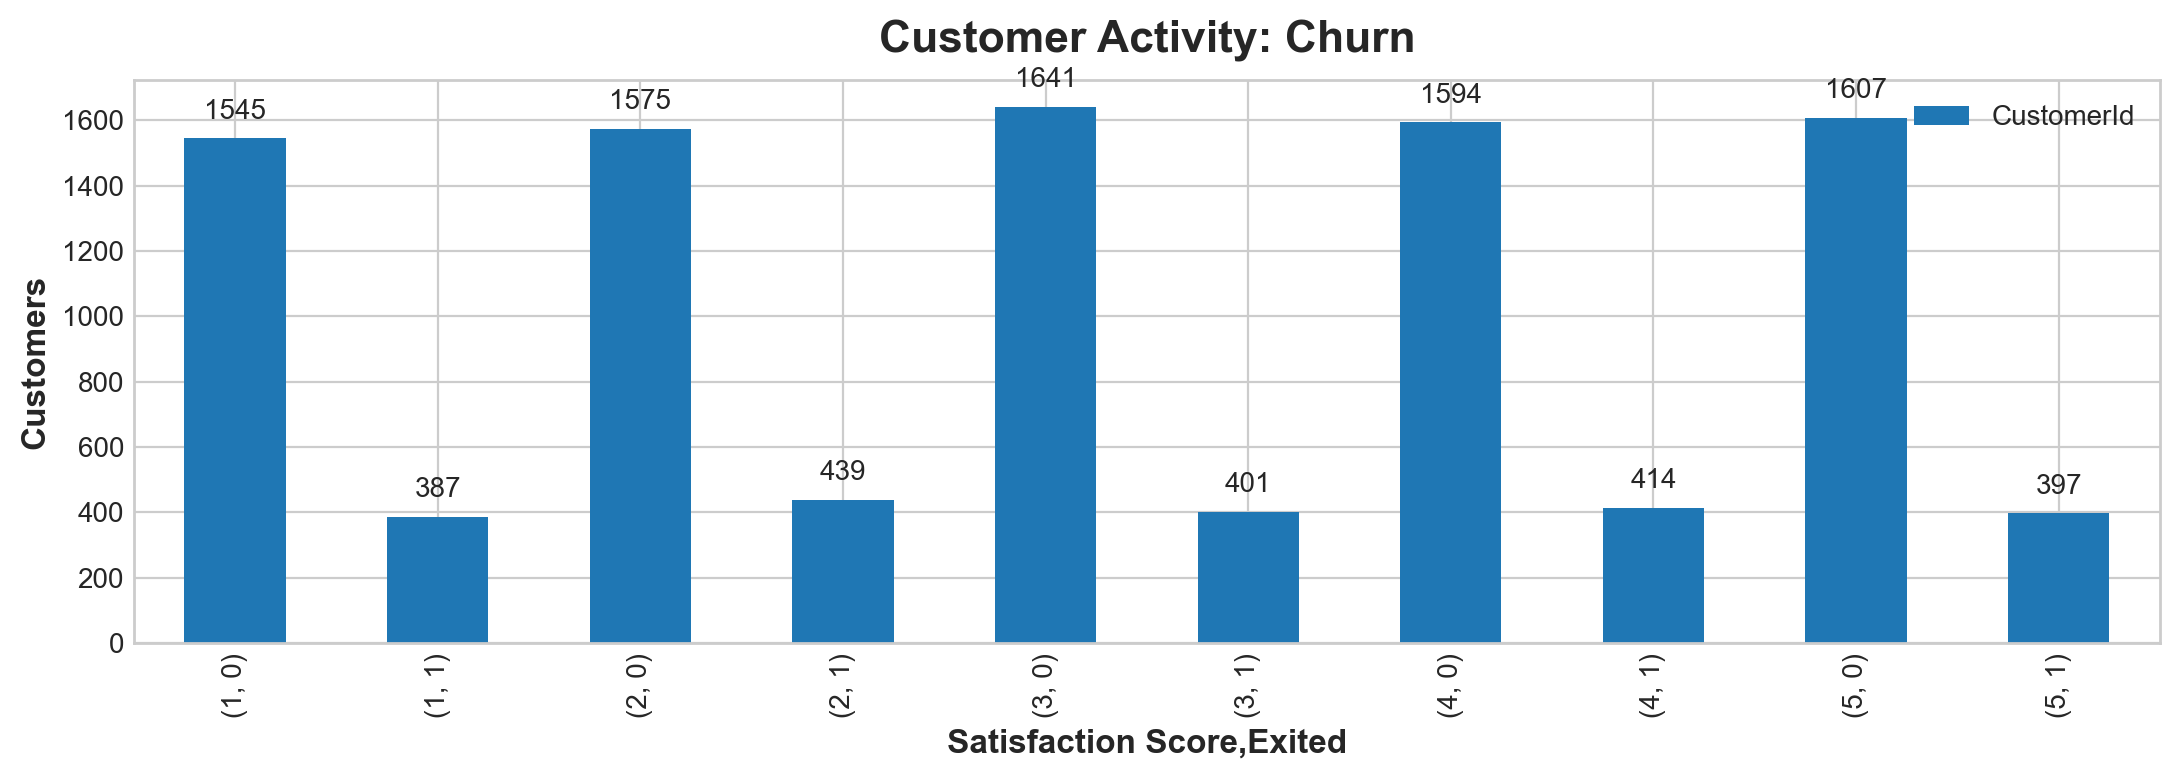

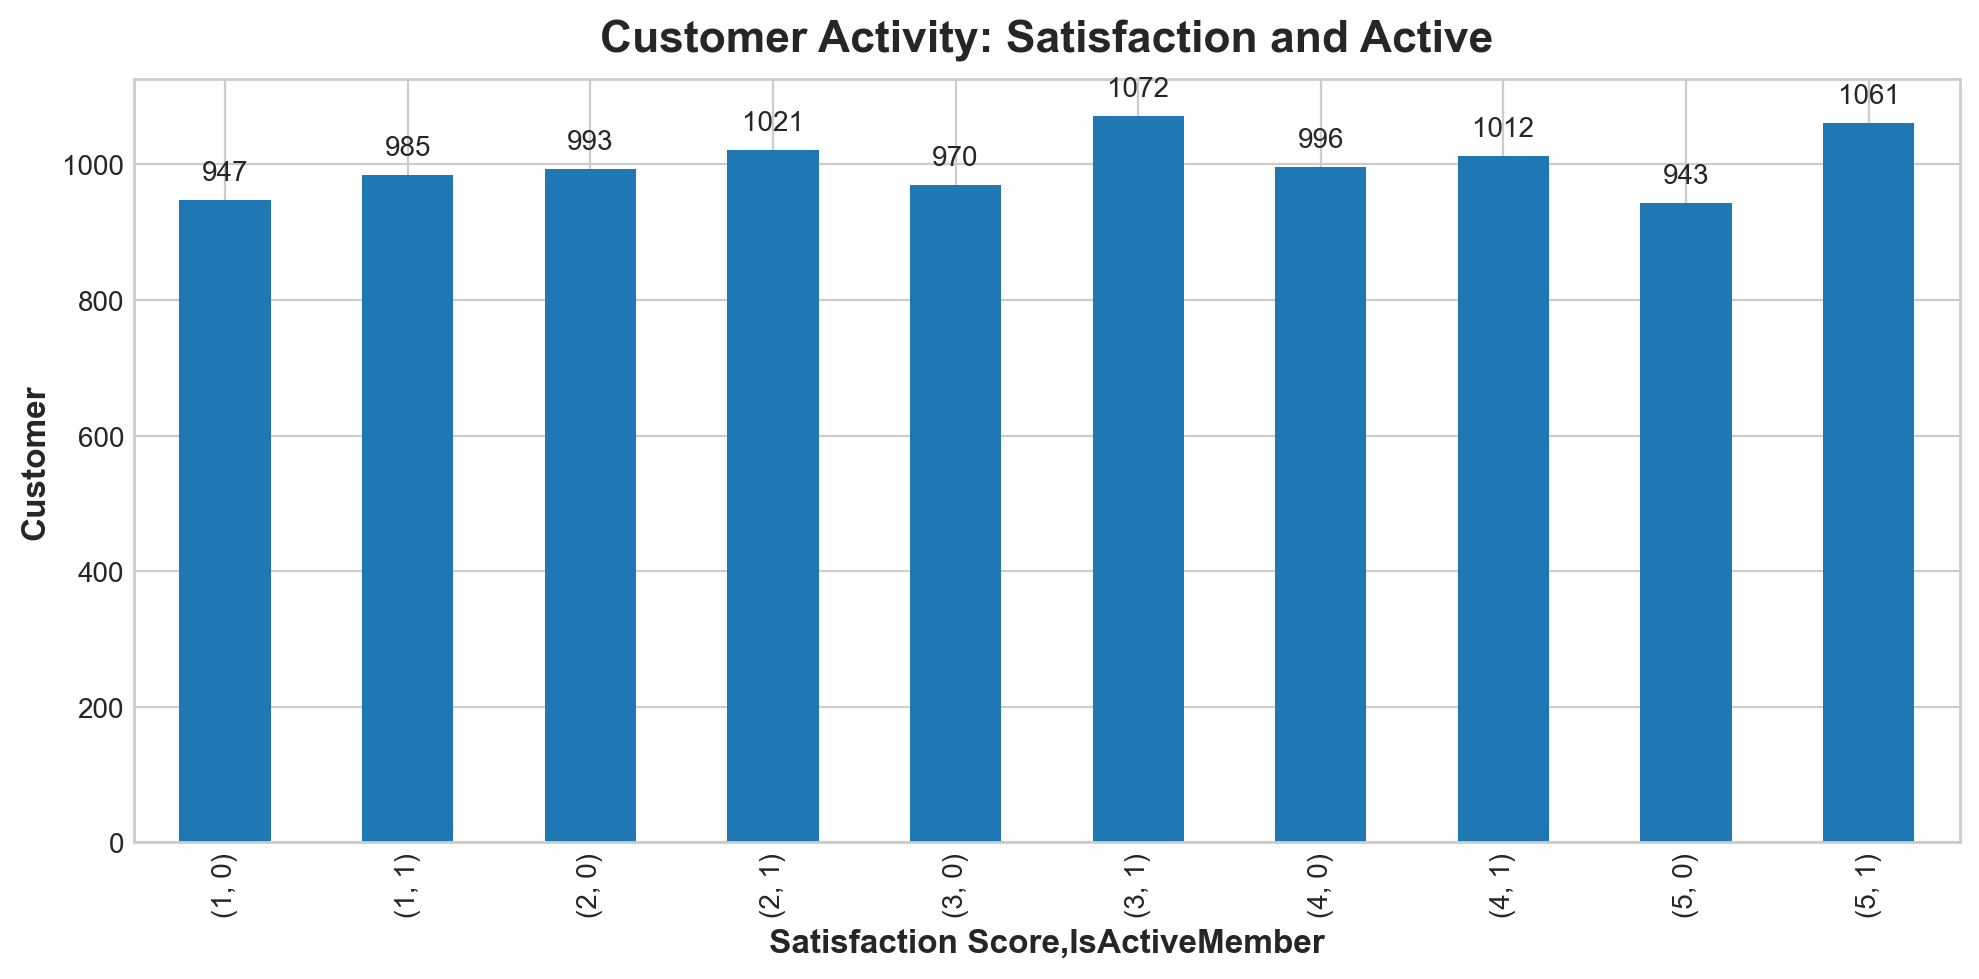

In [114]:
plt.figure(figsize=(10,5))
df_bank.groupby('Satisfaction Score')[['CustomerId']].count().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby('Satisfaction Score')['CustomerId'].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Customer Activity: Satisfaction")

plt.figure(figsize=(10,5))
df_bank.groupby(['Satisfaction Score','Exited'])[['CustomerId']].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(['Satisfaction Score','Exited'])['CustomerId'].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Customer Activity: Churn")

plt.figure(figsize=(10,5))
df_bank.groupby(['Satisfaction Score','IsActiveMember'])['CustomerId'].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(['Satisfaction Score','IsActiveMember'])['CustomerId'].count(), label_type='edge', padding=5)
ax.set_ylabel("Customer")
ax.set_title("Customer Activity: Satisfaction and Active")

plt.show()

#### It appears, in every category almost half of the people who are satisfied have inactive accounts
+ Satisfaction may not tell us why customers are Exiting, but
+ Active status may tell us who are exiting the bank

In [115]:
df_bank.groupby(['IsActiveMember','Exited'])[['CustomerId']].count()

CustomerId
IsActiveMember Exited            
0              0             3546
               1             1303
1              0             4416
               1              735

Text(0.5, 1.0, 'Customer Activity and Churn')

<Figure size 1000x500 with 0 Axes>

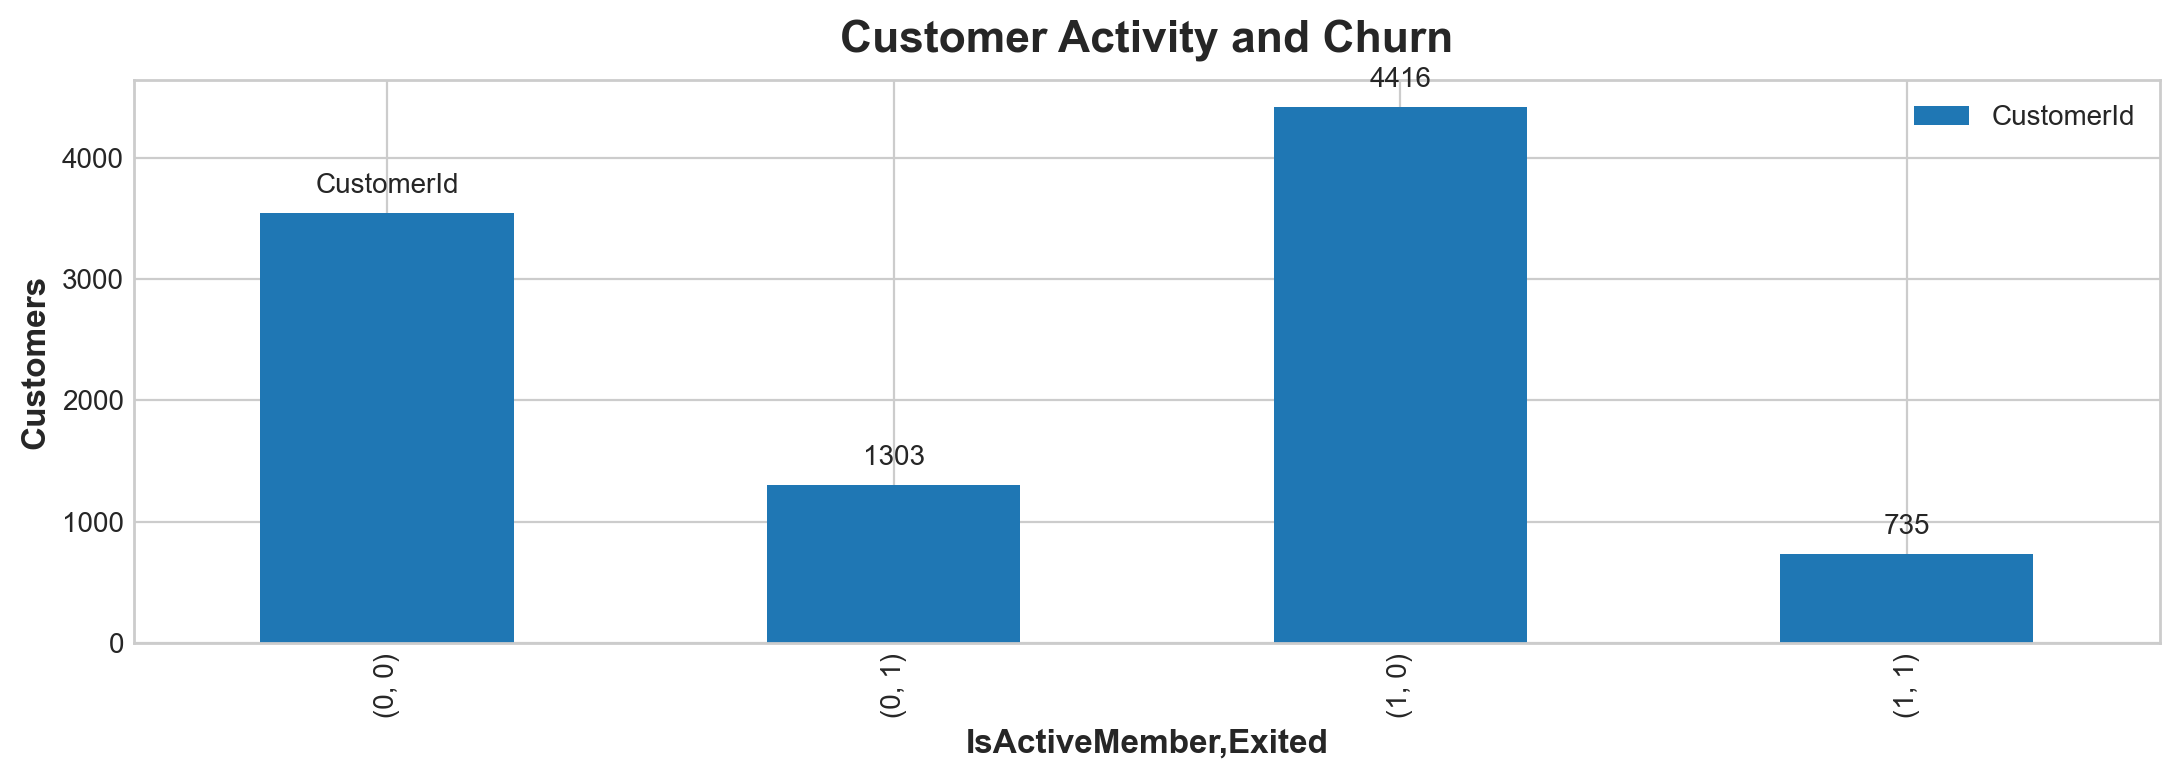

In [116]:
plt.figure(figsize=(10,5))
df_bank.groupby(['IsActiveMember','Exited'])[['CustomerId']].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(['IsActiveMember','Exited'])[['CustomerId']].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Customer Activity and Churn")

In [117]:
df_bank.groupby(['IsActiveMember','HasCrCard','Exited'])[['CustomerId']].count()

CustomerId
IsActiveMember HasCrCard Exited            
0              0         0             1041
                         1              360
               1         0             2505
                         1              943
1              0         0             1291
                         1              253
               1         0             3125
                         1              482

In [118]:
# 943 of the card holders who Exited are inactive
# 2505+943+3125+482
# 943+482
# 1425/7055

### Card Holders Statistics
+ Total Card holders: 7055
+ 20.2% (1425) Exited: 943 inactive, 482 active
#### How is inactive account linked to card holders who Exit the bank?

### Lets analyse customer complains

In [119]:
df_bank['Complain'].unique()

array([1, 0], dtype=int64)

In [120]:
df_bank.groupby('Complain')[['CustomerId']].count()

CustomerId
Complain            
0               7956
1               2044

In [121]:
df_bank.groupby(['Complain','Exited'])[['CustomerId']].count()

CustomerId
Complain Exited            
0        0             7952
         1                4
1        0               10
         1             2034

<Figure size 1000x500 with 0 Axes>

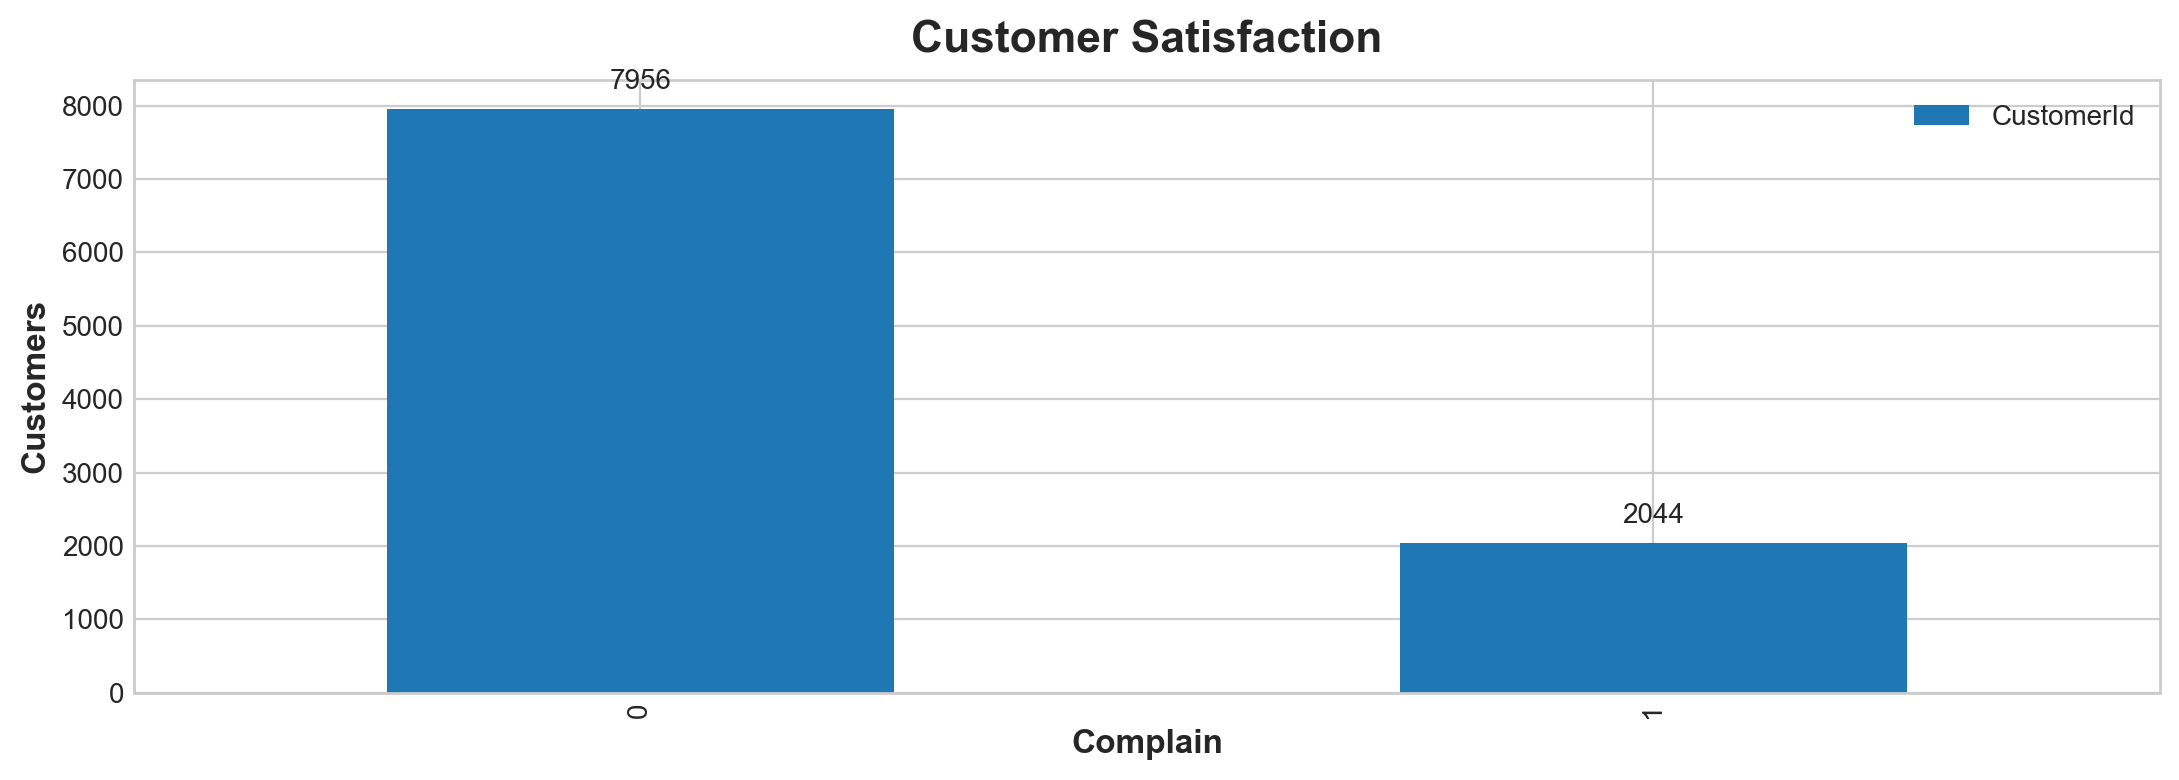

<Figure size 1000x500 with 0 Axes>

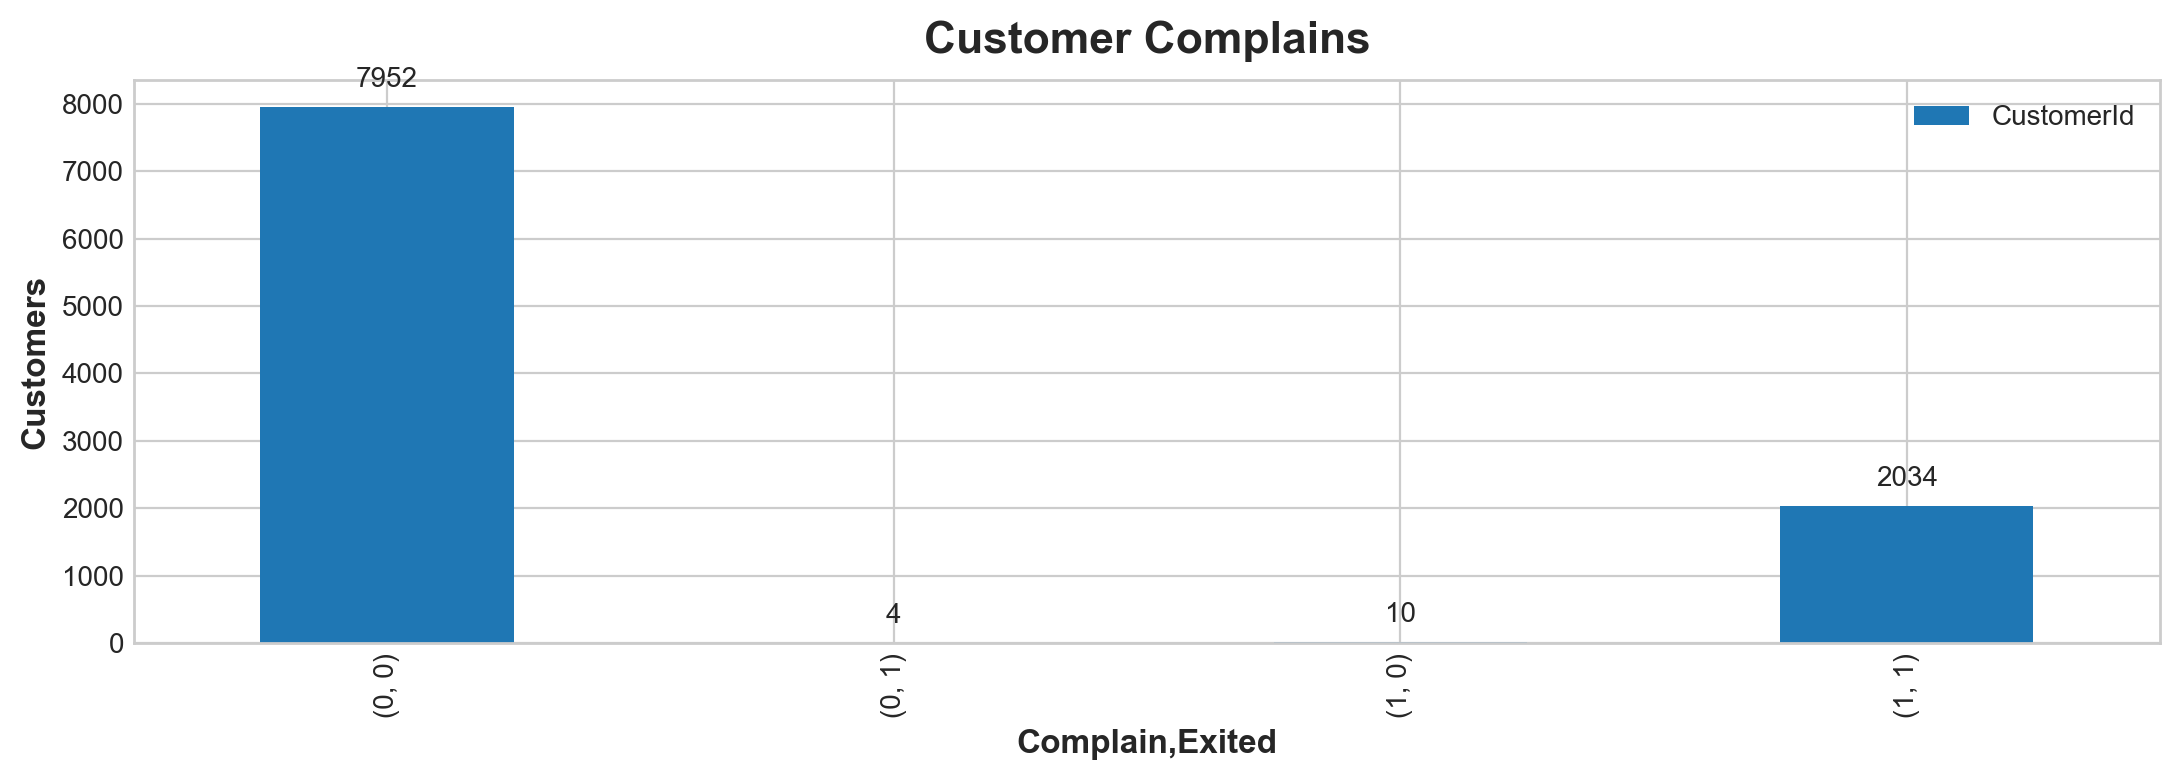

In [122]:
plt.figure(figsize=(10,5))
df_bank.groupby('Complain')[['CustomerId']].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby('Complain')['CustomerId'].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Customer Satisfaction")

plt.figure(figsize=(10,5))
df_bank.groupby(['Complain','Exited'])[['CustomerId']].count().plot(kind="bar")
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=df_bank.groupby(['Complain','Exited'])['CustomerId'].count(), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Customer Complains")

plt.show()

In [123]:
2034/2044

0.9951076320939335

In [124]:
df_bank.groupby(['Complain','HasCrCard'])[['CustomerId']].count()

CustomerId
Complain HasCrCard            
0        0                2330
         1                5626
1        0                 615
         1                1429

### 99% being 2034 people who complained eventually left the bank
#### They include 
+ 1429 card holders: account inactive
+ 615 non card holders

In [125]:
df_bank[df_bank["Exited"]==1].count()

RowNumber             2038
CustomerId            2038
Surname               2038
CreditScore           2038
Geography             2038
Gender                2038
Age                   2038
Tenure                2038
Balance               2038
NumOfProducts         2038
HasCrCard             2038
IsActiveMember        2038
EstimatedSalary       2038
Exited                2038
Complain              2038
Satisfaction Score    2038
Card Type             2038
Point Earned          2038
dtype: int64

In [126]:
2038/10000

0.2038

### Now it has been established that 
+ 20.38% totalling 2,038 customers left the bank after they had complained

In [127]:
# df_bank.groupby(['Complain','Satisfaction Score'])[['CustomerId']].count()

# Salary Analysis

In [128]:
df_bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [129]:
df_bank['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [130]:
df_bank.groupby("Gender")[["EstimatedSalary"]].mean()

EstimatedSalary
Gender                 
Female    100601.541382
Male       99664.576931

In [131]:
df_bank.groupby("Geography")[["EstimatedSalary"]].mean()

EstimatedSalary
Geography                 
France        99899.180814
Germany      101113.435102
Spain         99440.572281

In [132]:
df_bank.groupby(["Geography",'Gender'])[["EstimatedSalary"]].mean()

EstimatedSalary
Geography Gender                 
France    Female     99564.252755
          Male      100174.252495
Germany   Female    102446.424124
          Male       99905.033959
Spain     Female    100734.107475
          Male       98425.687680

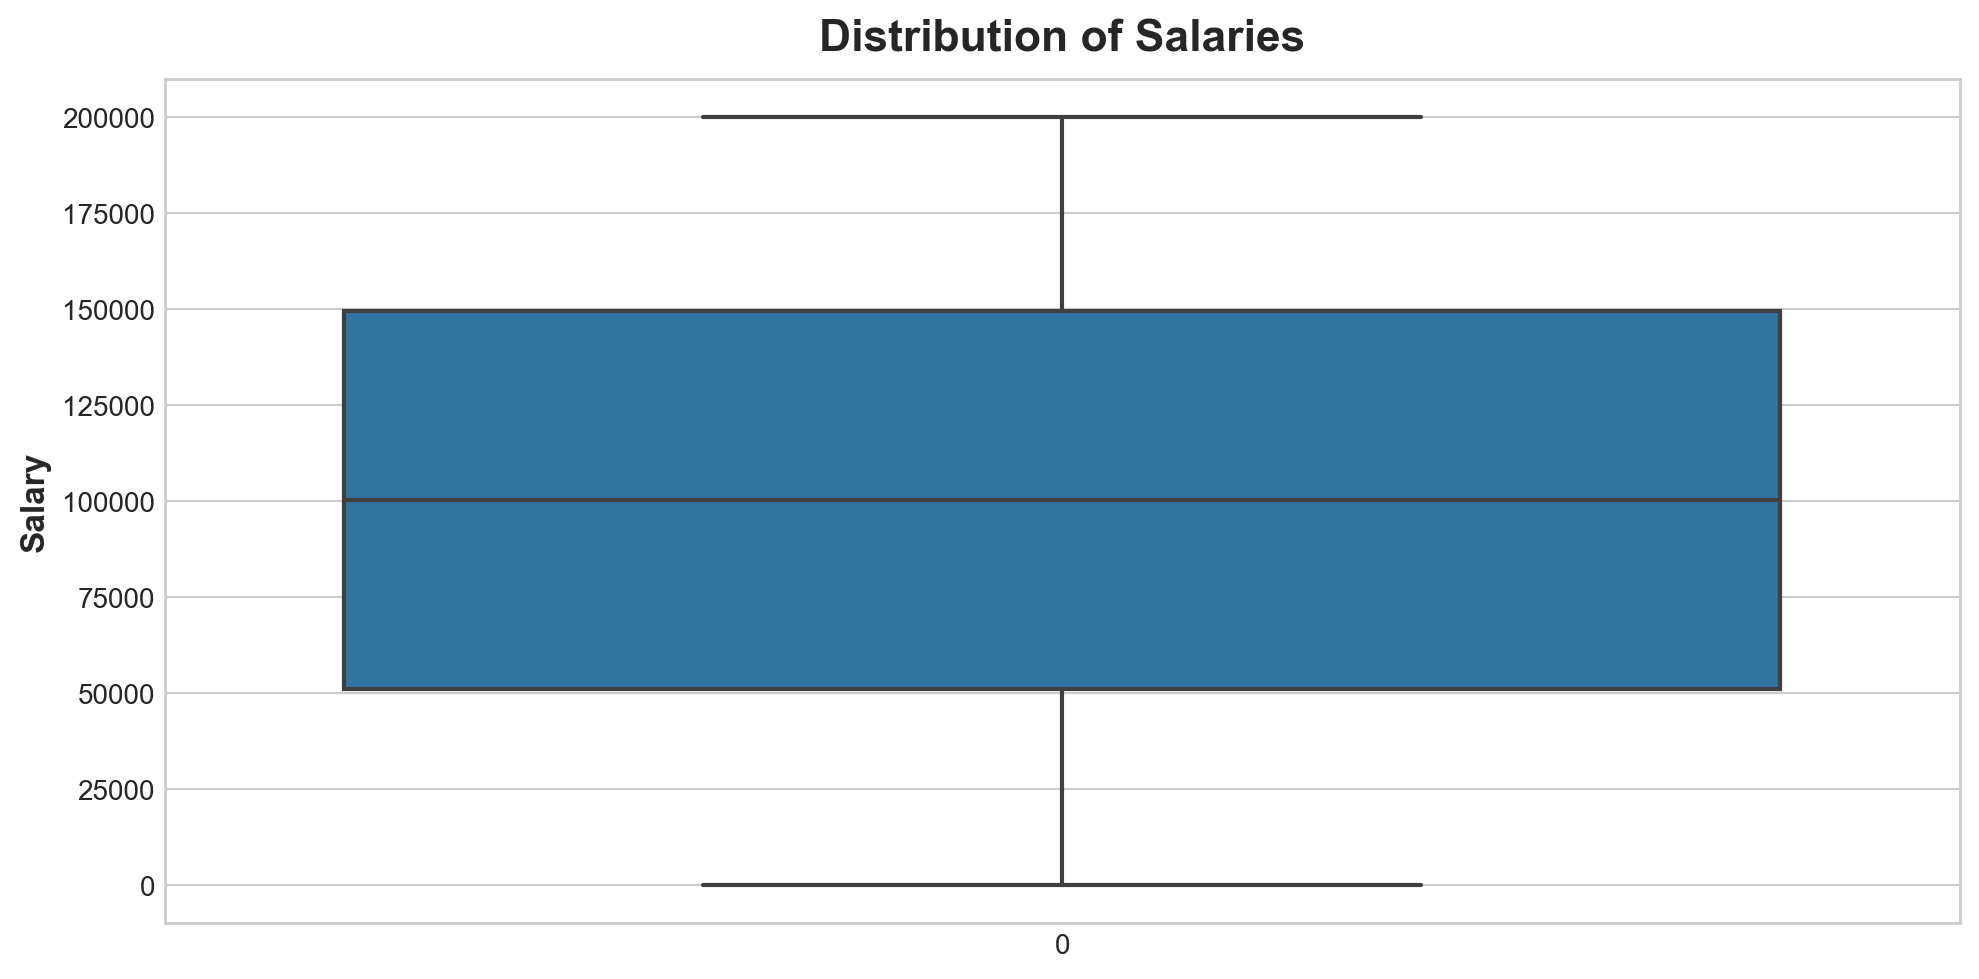

<Figure size 1000x500 with 0 Axes>

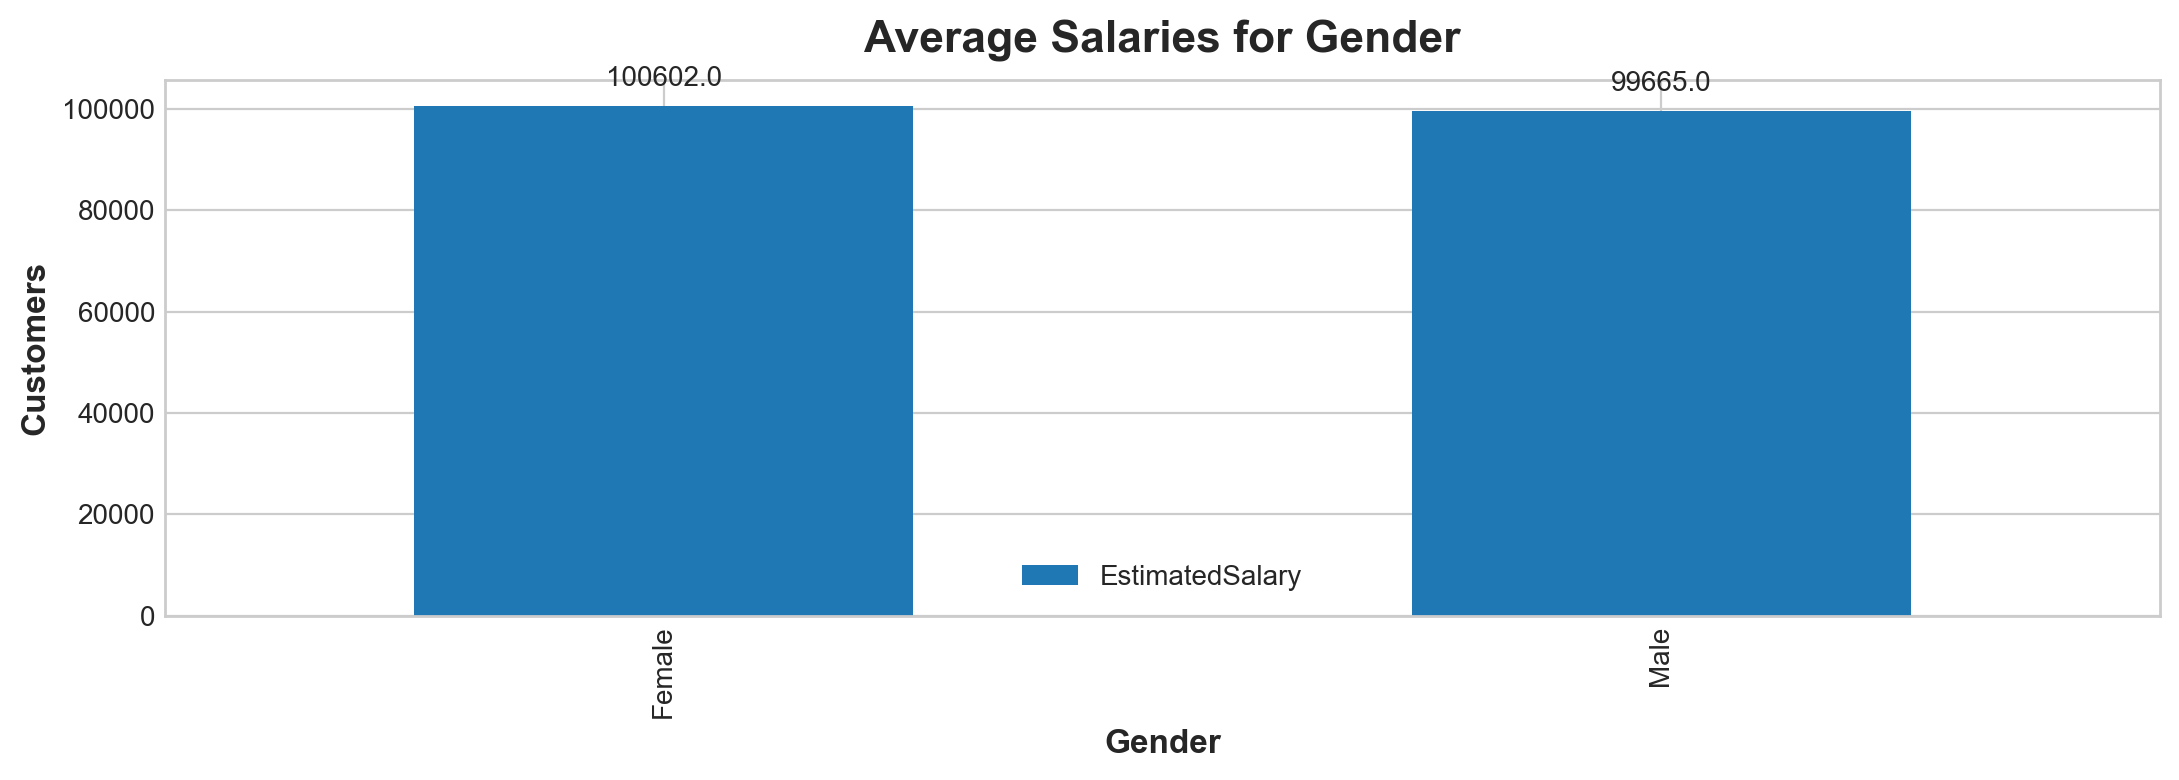

<Figure size 1000x500 with 0 Axes>

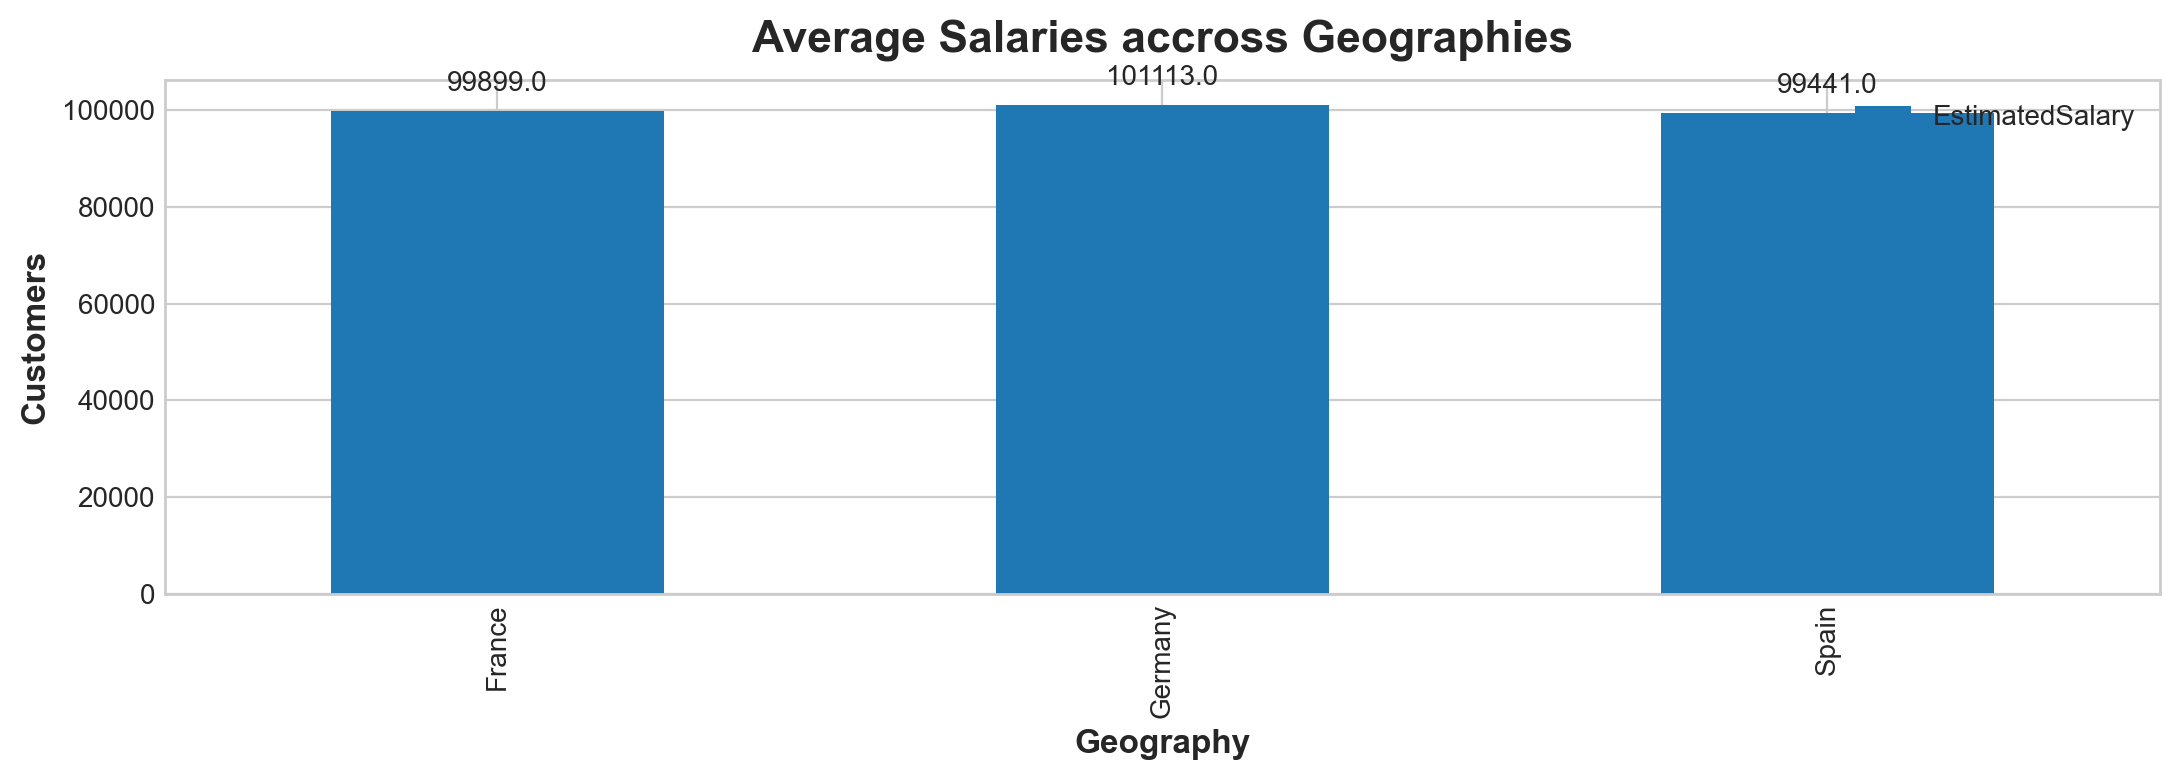

<Figure size 1000x500 with 0 Axes>

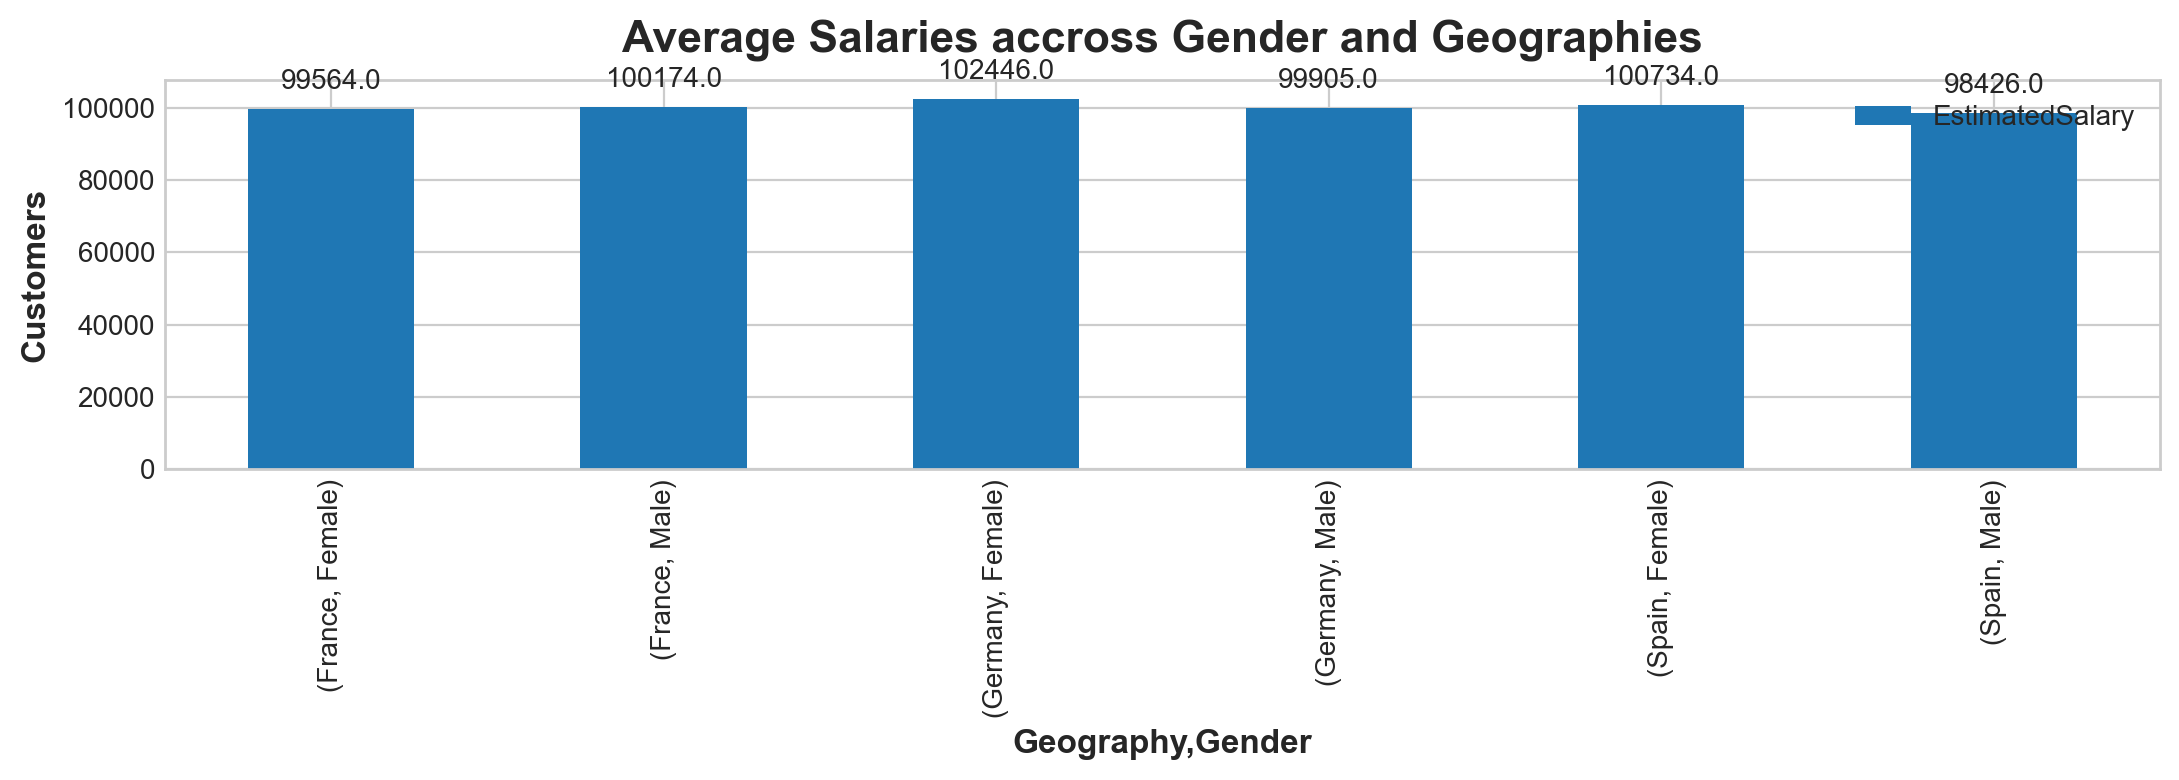

In [133]:
plt.figure(figsize=(10,5))
sns.boxplot(df_bank['EstimatedSalary'])
ax = plt.gca()
ax.set_ylabel("Salary")
ax.set_title("Distribution of Salaries")

plt.figure(figsize=(10,5))
df_bank.groupby("Gender")[["EstimatedSalary"]].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby("Gender")["EstimatedSalary"].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Average Salaries for Gender")

plt.figure(figsize=(10,5))
df_bank.groupby("Geography")[["EstimatedSalary"]].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby("Geography")["EstimatedSalary"].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Average Salaries accross Geographies")

plt.figure(figsize=(10,5))
df_bank.groupby(["Geography",'Gender'])[["EstimatedSalary"]].mean().plot(kind='bar')
ax = plt.gca()
ax.bar_label(ax.containers[0], labels=round(df_bank.groupby(["Geography",'Gender'])["EstimatedSalary"].mean(),0), label_type='edge', padding=5)
ax.set_ylabel("Customers")
ax.set_title("Average Salaries accross Gender and Geographies")
plt.show()

In [134]:
df_bank.groupby("Exited")[["EstimatedSalary"]].mean()

EstimatedSalary
Exited                 
0          99726.853141
1         101509.908783

In [135]:
df_bank.groupby(["Exited","Complain"])[["EstimatedSalary"]].mean()

EstimatedSalary
Exited Complain                 
0      0            99726.161686
       1           100276.698000
1      0            99520.432500
       1           101513.821224

<Axes: xlabel='Exited,Complain'>

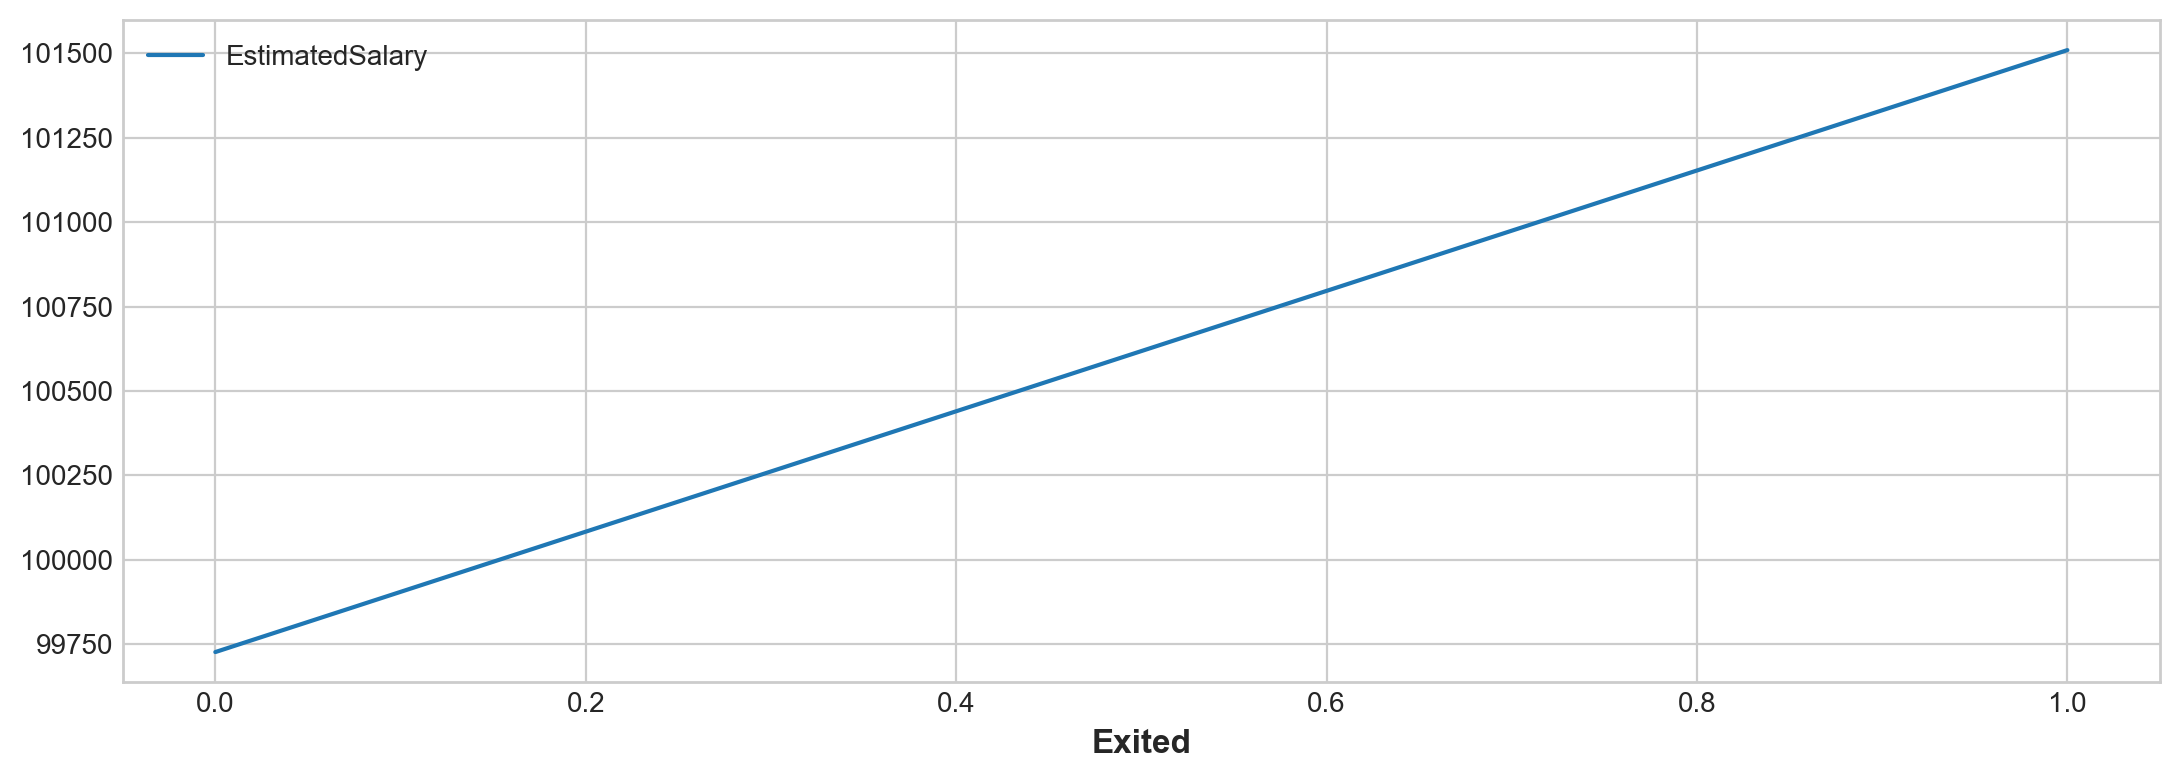

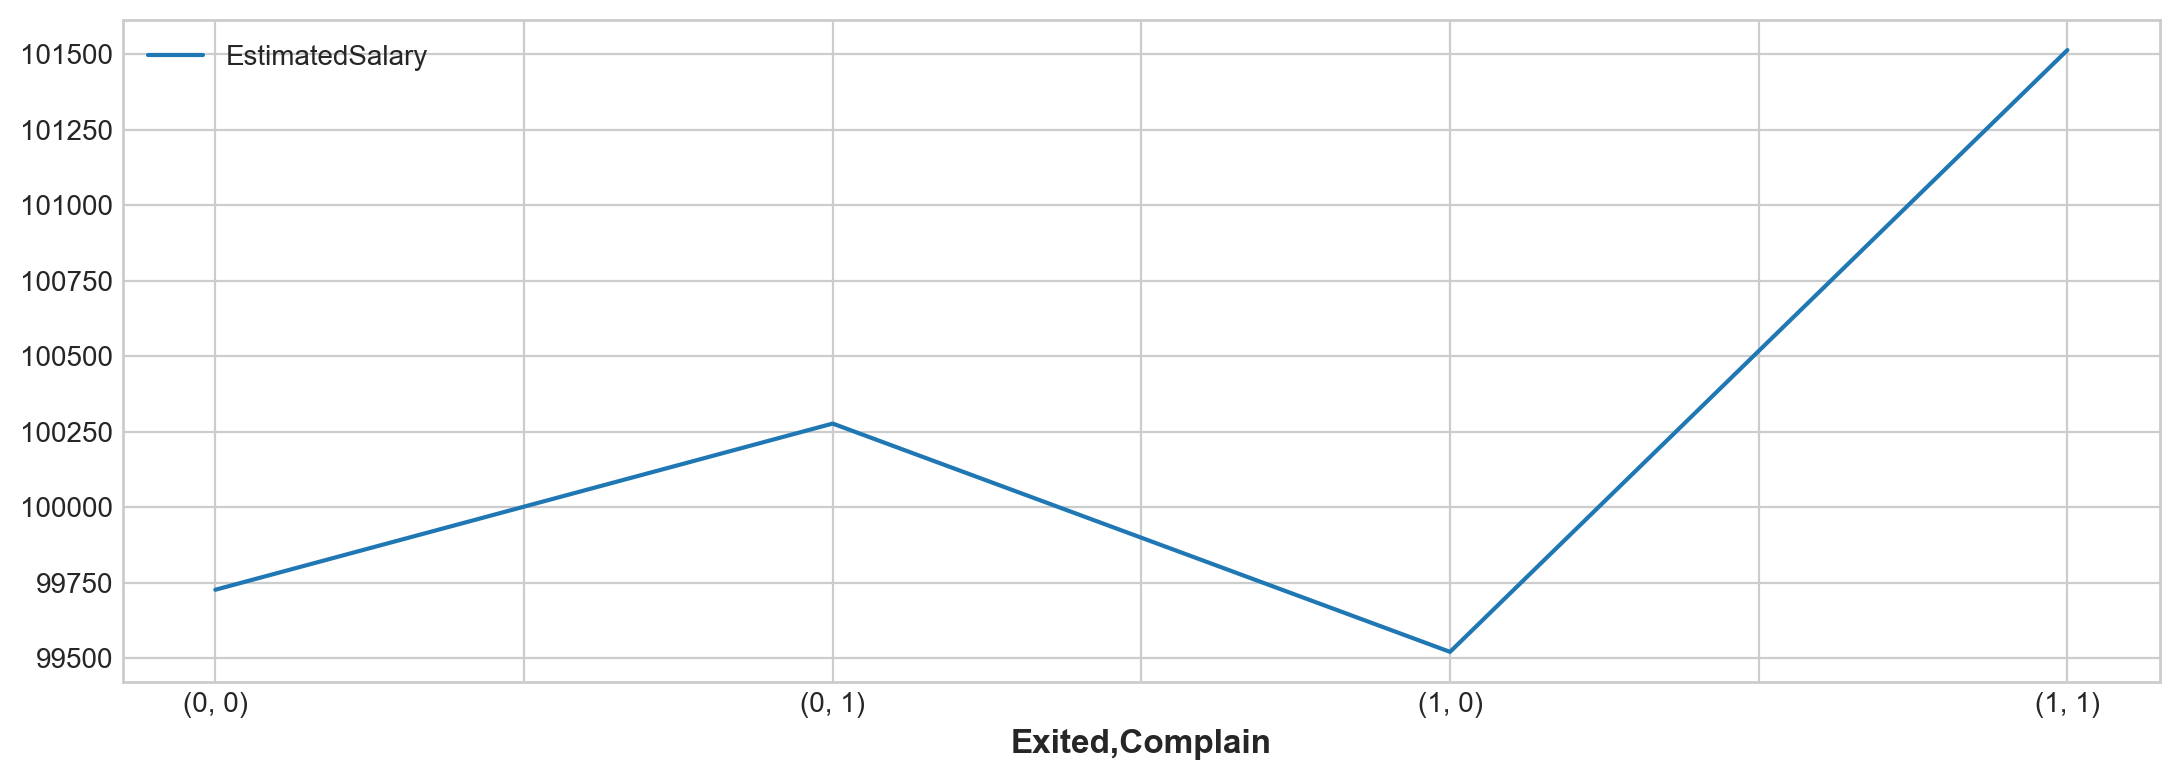

In [136]:
df_bank.groupby("Exited")[["EstimatedSalary"]].mean().plot(kind='line')
df_bank.groupby(["Exited","Complain"])[["EstimatedSalary"]].mean().plot(kind='line')

In [137]:
df_bank[["Satisfaction Score","EstimatedSalary"]]

Satisfaction Score  EstimatedSalary
0                      2        101348.88
1                      3        112542.58
2                      3        113931.57
3                      5         93826.63
4                      5         79084.10
...                  ...              ...
9995                   1         96270.64
9996                   5        101699.77
9997                   3         42085.58
9998                   2         92888.52
9999                   3         38190.78

[10000 rows x 2 columns]

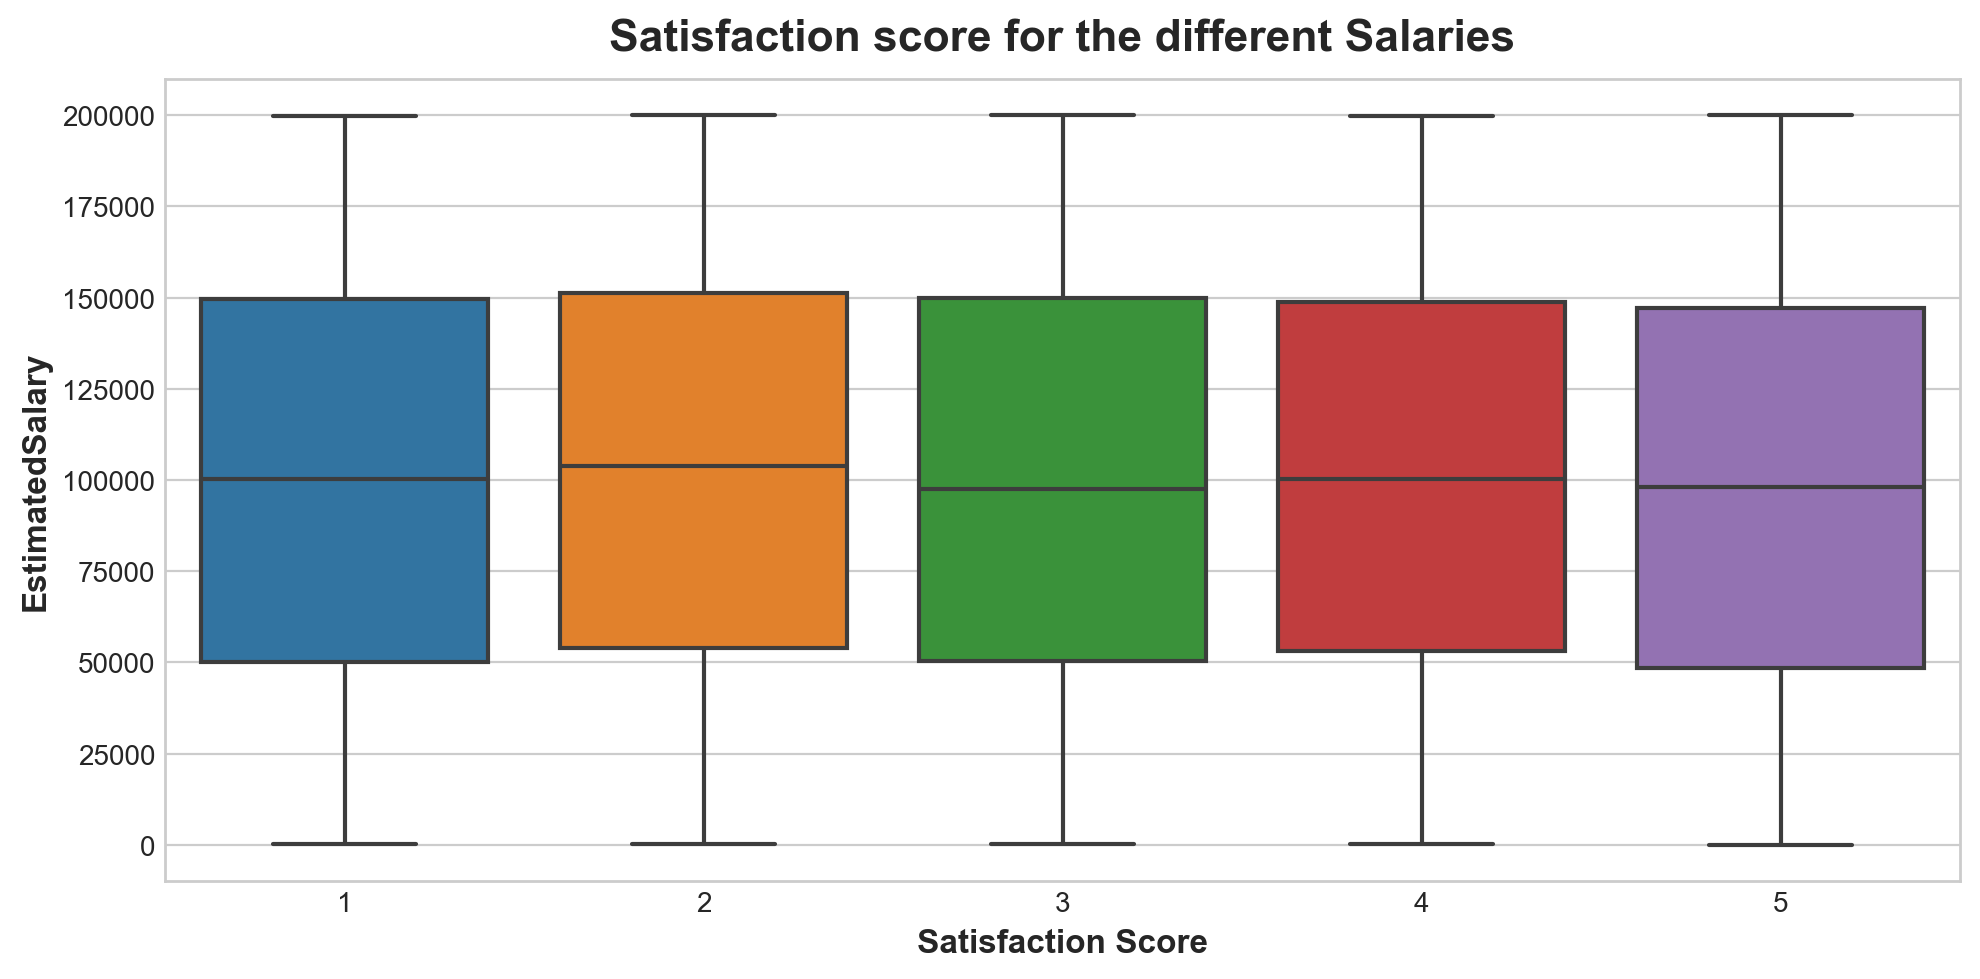

In [138]:
plt.figure(figsize=(10,5))
sns.boxplot(df_bank[["Satisfaction Score","EstimatedSalary"]],x='Satisfaction Score',y='EstimatedSalary')
ax = plt.gca()
# ax.bar_label(ax.containers[0], labels=round(df_bank["Satisfaction Score","EstimatedSalary"],0), label_type='edge', padding=5)
# ax.set_ylabel("Estimated Salary")
ax.set_title("Satisfaction score for the different Salaries")
plt.show()

### The average Salaries appears higher for customers who Exited the bank than those who stayed.
+ Perhaps this is strong evidence to the Bank ignoring the complains of high valued customers